

# NHS Appointment Analysis

## Goal

1. - Analyse data to understand trends in the utilization of healthcare services

2. - Break down services by type, context, and national categories.

3. - Explore changes over time and seasonal variations.

4. - Investigate the reasons behind missed appointments.

5. - Identify patterns and possible correlations with patient demographics or service settings

6. - Examine Twitter data to identify trending hashtags.

7. - Assess if social media data can provide insights or feedback on healthcare services.

8. - Evaluate the adequacy of staff and capacity in healthcare networks.

9. - Assess the utilization of resources and capacity in relation to the population

## Setup

### Importing the necessary libraries

In [3]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import calendar
import seaborn as sns
import matplotlib.pyplot as plt



# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

### Writing re-usable functions

In [4]:
#Defining a function to veiw and sense-check dataframe.

def view_sense_check_dataframe(df):
    """
    Perform a veiw, sense check on the given DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - None (prints sense check results)
    """
    # Display information about the DataFrame
    print("\nDataFrame Info:")
    print(df.info())

    # Display the first few rows
    print("Head of the DataFrame:")
    print(df.head())

    # Display the last few rows
    print("\nTail of the DataFrame:")
    print(df.tail())

    # Checking for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Checking for duplicates
    print("\nDuplicate Rows:")
    print(df[df.duplicated()])
    
    # Checking for duplicates and printing the count
    print("\nCount of Duplicates:")
    print(df.duplicated().sum())
    
    # Display basic statistics
    print("\nDataFrame Describe:")
    print(df.describe())


<h3 style=color:green>Comments</h3>

>  This will significantly streamline the repetitive task, resulting in increased efficiency and a reduction in the overall code length.

###  Importing and sense-checking 'actual_duration.csv'

In [5]:
# Import 'actual_duration.csv' as ad.
ad = pd.read_csv('actual_duration.csv')

In [6]:
# Veiwing and sense checking ad using a function
view_sense_check_dataframe(ad)


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB
None
Head of the DataFrame:
  sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L

## Review of the metadata and descriptive statistics (Actual duration)

**Key Note**
- The values in the column `count_of_appointments` exhibit a "wide range of values".
- Indicating that the number of appointments varies significantly from one data point to another.
- The "significant variability" suggests this column may be an important factor to consider in decision-making processes
- The provided DataFrame, named 'actual_duration.csv,' contains a total of 137,793 entries and comprises 8 columns.

**Data Types:**
   - `int64` (1 column, 'count_of_appointments')
   - `object` (7 columns, including codes and dates)
   
**Column Information:**
1. `sub_icb_location_code`
2. `sub_icb_location_ons_code`
3. `sub_icb_location_name`
4. `icb_ons_code`
5. `region_ons_code`
6. `appointment_date`
7. `actual_duration`
8. `count_of_appointments`

**Memory Usage:**
- The DataFrame consumes approximately 8.4+ megabytes of memory.

**Statistics on 'count_of_appointments':**
- Count: 137,793
- Mean: 1,219.08
- Standard Deviation: 1,546.90
- Minimum: 1
- 25th Percentile: 194
- Median (50th Percentile): 696
- 75th Percentile: 1,621
- Maximum: 15,400


<h2 style=color:green>Comments</h2>
    
> - Considering the removal of the outliers for this analyis
> - Reveiwing the column names for consistency and Readability

### Importing and sense-checking 'appointments_regional.csv'.

In [7]:
# Import 'appointments_regional.csv' as ar.
ar = pd.read_csv('appointments_regional.csv')

In [8]:
# Veiwing and sense checking ad using the 'view_sense_check_dataframe()' function
view_sense_check_dataframe(ar)


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB
None
Head of the DataFrame:
  icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended     

## Review of the metadata and descriptive statistics (Appointments_regional)

**Key Note**
- The 'count_of_appointments' column exhibits a wide range of values with a significant level of variability. 
- The maximum value of 211,265 suggests that there are appointments with extremely high counts
- The data types of the columns indicate data that may require conversion for analytical purposes.
- The provided DataFrame is named, and it contains 596,821 rows and 7 columns.

**Column Information:**
1. `icb_ons_code`
2. `appointment_month`
3. `appointment_status`
4. `hcp_type`
5. `appointment_mode`
6. `time_between_book_and_appointment`
7. `count_of_appointments`

**Data Types:**
- The data types within the DataFrame are primarily of two types:
   - `int64` (1 column, 'count_of_appointments')
   - `object` (6 columns, likely indicating textual or categorical data).

**Memory Usage:**
- The DataFrame consumes approximately 31.9+ megabytes of memory.

**Statistics on 'count_of_appointments':**
- Count: 596,821
- Mean: 1,244.60
- Standard Deviation: 5,856.89
- Minimum: 1
- 25th Percentile: 7
- Median (50th Percentile): 47
- 75th Percentile: 308
- Maximum: 211,265

<h2 style=color:green>Comments</h2>
    
> - Considering the removal of the outliers for this analyis
> - Reveiwing the column names for consistency and Readability

### Importing and sense-checking 'national_categories.xlsx'

In [9]:
# Import 'national_categories.xlsx' as nc.
nc = pd.read_excel('national_categories.xlsx')

In [10]:
# Veiwing and sense checking ad using the 'view_sense_check_dataframe()' function
view_sense_check_dataframe(nc)


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB
None
Head of the DataFrame:
  appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-0

## Review of metadata and descriptive statistics (national_categories)

**Key Notes**
- The DataFrame consists of 817,394 rows and 8 columns.
- The 'count_of_appointments' column exhibits a wide range of values with significant variability.
- The presence of date/time data in the 'appointment_date' column is noteworthy for time-based analysis.

**Column Information:**
1. `appointment_date`
2. `icb_ons_code`
3. `sub_icb_location_name`
4. `service_setting`
5. `context_type`
6. `national_category`
7. `count_of_appointments`
8. `appointment_month`

**Data Types:**
- `datetime64[ns]` (1 column, 'appointment_date')
- `int64` (1 column, 'count_of_appointments')
- `object` (6 columns, likely indicating textual or categorical data).

**Memory Usage:**
- The DataFrame consumes approximately 49.9+ megabytes of memory.

**Statistics on 'count_of_appointments':**
- Count: 817,394
- Mean: 362.18
- Standard Deviation: 1084.58
- Minimum: 1
- 25th Percentile: 7
- Median (50th Percentile): 25
- 75th Percentile: 128
- Maximum: 16,590

  

<h2 style=color:green>Comments</h2>
    
> - Considering the removal of the outliers for this analyis
> - Reveiwing the column names for consistency and Readability

# Questions & Observations

<h2 style="color:black">1. How many locations are there in the data set?</h2>

In [11]:
# Counting the number of distinct values in the 'sub_icb_location_name' column from nc and ad DataFrame
nc_location_distinct_count = nc['sub_icb_location_name'].nunique()
ad_location_distinct_count = ad['sub_icb_location_name'].nunique()

# Displaying the results
print(f'''Number of Locations recorded in DataFrame nc: {nc_location_distinct_count} 
Number of Locations recorded in DataFrame ad: {ad_location_distinct_count}''')

Number of Locations recorded in DataFrame nc: 106 
Number of Locations recorded in DataFrame ad: 106


<h2 style="color:green">Observations</h2>

> The total location after cross-checking both the nc and ad data set is 106

<h2 style="color:black">2. What are the five locations with the highest number of records?</h2>

In [12]:
# Grouping the DataFrame by 'sub_icb_location_name' and summing the 'count_of_appointments' for each location
ad_location_counts = ad.groupby('sub_icb_location_name')['count_of_appointments'].sum()
nc_location_counts = nc.groupby('sub_icb_location_name')['count_of_appointments'].sum()

# Sorting the locations by record count in descending order and selecting the top five
ad_top_locations = ad_location_counts.sort_values(ascending=False).head(5)
nc_top_locations = nc_location_counts.sort_values(ascending=False).head(5)


# Displaying the top five locations
print('Top five locations for ad')
print(ad_top_locations)

print('Top five locations for nc')
print(nc_top_locations)

Top five locations for ad
sub_icb_location_name
NHS North West London ICB - W2U3Z              6976986
NHS North East London ICB - A3A8R              5341883
NHS Kent and Medway ICB - 91Q                  5209641
NHS Hampshire and Isle Of Wight ICB - D9Y0V    4712737
NHS South East London ICB - 72Q                4360079
Name: count_of_appointments, dtype: int64
Top five locations for nc
sub_icb_location_name
NHS North West London ICB - W2U3Z              12142390
NHS North East London ICB - A3A8R               9588891
NHS Kent and Medway ICB - 91Q                   9286167
NHS Hampshire and Isle Of Wight ICB - D9Y0V     8288102
NHS South East London ICB - 72Q                 7850170
Name: count_of_appointments, dtype: int64


<h2 style="color:green">Observations</h2>

> Based on the sub_icb_location_name column and considering the ad and nc DataFrame (The two data sets with location column name), the top five with the most records are;
> - NHS North West London ICB - W2U3Z
> - NHS North East London ICB - A3A8R
> - NHS Kent and Medway ICB - 91Q
> - NHS Hampshire and Isle Of Wight ICB - D9Y0V
> - NHS South East London ICB - 72Q



<h2 style="color:black">3. How many service settings, context types, national categories, and appointment statuses are there? also indicating count. </h2>


In [13]:
# Determine the number of service settings.
service_setting_count = nc['service_setting'].nunique()

# Group the DataFrame by 'service_setting' and sum of the 'count_of_appointments'
service_group = nc.groupby('service_setting')['count_of_appointments'].sum().reset_index(name='count')

# Displaying the results
print(f"Number of Service Settings in DataFrame nc: {service_group}")
service_group.sort_values(by='count', ascending=False)

Number of Service Settings in DataFrame nc:              service_setting      count
0  Extended Access Provision    2176807
1           General Practice  270811691
2                      Other    5420076
3       Primary Care Network    6557386
4                   Unmapped   11080810


,service_setting,count
1,General Practice,270811691
4,Unmapped,11080810
3,Primary Care Network,6557386
2,Other,5420076
0,Extended Access Provision,2176807


In [14]:
# Determine the number of context types.
context_types_count = nc['context_type'].nunique()

# Group the DataFrame by 'context_type' and sum of the 'count_of_appointments'
context_group = nc.groupby('context_type')['count_of_appointments'].sum().reset_index(name='count')

# Displaying the results
print(f"Number of Context Types in DataFrame nc: {context_group}")
context_group.sort_values(by='count', ascending=False)

Number of Context Types in DataFrame nc:              context_type      count
0  Care Related Encounter  257075158
1    Inconsistent Mapping   27890802
2                Unmapped   11080810


,context_type,count
0,Care Related Encounter,257075158
1,Inconsistent Mapping,27890802
2,Unmapped,11080810


In [15]:
# Determine the number of national categories.
national_categories_count = nc['national_category'].nunique()

# Group the DataFrame by 'national_category' and sum of the 'national_category'
national_count = nc.groupby('national_category')['count_of_appointments'].sum().reset_index(name='count')

# Displaying the results
print(f"Number of National Categories in DataFrame nc: {national_count}")
national_count.sort_values(by= "count", ascending=False)

Number of National Categories in DataFrame nc:                                     national_category     count
0   Care Home Needs Assessment & Personalised Care...    405904
1                                     Care Home Visit    628279
2                                     Clinical Triage  41546964
3                          General Consultation Acute  53691150
4                        General Consultation Routine  97271522
5              Group Consultation and Group Education     60632
6                                          Home Visit   2144452
7                                Inconsistent Mapping  27890802
8                     Non-contractual chargeable work    138911
9              Patient contact during Care Home Round    810330
10                         Planned Clinical Procedure  25702694
11                                    Planned Clinics  28019748
12  Service provided by organisation external to t...    852133
13                         Social Prescribing Service    

,national_category,count
4,General Consultation Routine,97271522
3,General Consultation Acute,53691150
2,Clinical Triage,41546964
11,Planned Clinics,28019748
7,Inconsistent Mapping,27890802
10,Planned Clinical Procedure,25702694
15,Unmapped,11080810
16,Unplanned Clinical Activity,3055794
6,Home Visit,2144452
14,Structured Medication Review,1858379


In [16]:
# Determine the number of appointment statuses.
appointment_status_count = ar['appointment_status'].nunique()

# Group the DataFrame by 'appointment_status' and sum of the 'count_of_appointments'
appointment_group = ar.groupby('appointment_status')['count_of_appointments'].sum().reset_index(name='count')

# Display the results
print(f"Number of Appointment Statuses in dataframe nc: {appointment_group}")
appointment_group.sort_values(by="count",ascending=False)

Number of Appointment Statuses in dataframe nc:   appointment_status      count
0           Attended  677755876
1                DNA   30911233
2            Unknown   34137416


,appointment_status,count
0,Attended,677755876
2,Unknown,34137416
1,DNA,30911233


<h2 style="color:green">Observations</h2>

> - The category Care Related Encounter have the highest count

> - The category "Inconsistent Mapping" has a high count, indicating a potential issue with the mapping or categorization of data.

> - Categories "General Consultation Routine" and "General Consultation Acute" have high counts, suggesting that general consultations are common in the dataset. Routine consultations slightly outnumber acute consultations


> - "Home Visit" and "Care Home Visit" categories indicate a significant number of healthcare services provided outside clinical settings, either at patients' homes or care homes.

> - "Unplanned Clinical Activity" has a considerable count, indicating instances where clinical activities may have been unscheduled or unplanned.

> The nc DataFrame is the most suited based on associated column names to determine Service settings.
> - There are a total of 5 service settings including the Unmapped.
> - General practice, Unmapped   and Primary Care Network  are the top three Settings.
> - The unmapped number is high and this suggests a potential issue with the mapping or categorization of data.

> The nc DataFrame is the most suited based on associated column names to determine Context types.
> - There are a total of 3 context types including the Unmapped.
> - Namely Care Related Encounter, Inconsistent Mapping and Unmapped.
> - The Care Related Encounter has the highest number of occurence.
> - Again, there is concern on the number of un mapped data.

> The nc DataFrame is the most suited based on associated column names to determine National categories.
> - There are a total of 18 National Categories including the Unmapped.
> - General Consultation Routine, General Consultation Acute  and Clinical Triage are the most prevalent.

> The ar DataFrame is the most suited based on associated column names to determine appointment statuses.
> - There are a total of 3 Appointment Statuses including the Unknown.
> - Attended, is the most prevalent. Other types include DNA (Did Not Attend) and Unknown
> - The high number of the uknown, suggests a potential issue with the mapping or categorization of data

# Additional Analysis on 'ad' DataFrame

<h2 style="color:black">4. Determine the date range in ad</h1>

In [17]:
# Convert 'appointment_date' to datetime
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'], format='%d-%b-%y')

# Calculate the date range
date_range_start = ad['appointment_date'].min()
date_range_end = ad['appointment_date'].max()

# Display the date range
print(f"Date Range: {date_range_start} to {date_range_end}")

Date Range: 2021-12-01 00:00:00 to 2022-06-30 00:00:00


<h2 style="color:black">5. Determine the actual duration type and count in ad</h1>

In [18]:
# Determine the number of actual_duration.
actual_duration_count = ad['actual_duration'].nunique()

# Group the DataFrame by 'actual_duration' and sum of the 'count_of_appointments'
actual_duration = ad.groupby('actual_duration')['count_of_appointments'].sum().reset_index(name='count')

# Displaying the results
print(f"Number of Actual Duration in dataframe ad: {actual_duration_count}")

actual_duration.sort_values(by="count", ascending=False)

Number of Actual Duration in dataframe ad: 7


,actual_duration,count
6,Unknown / Data Quality,40284086
5,6-10 Minutes,33800815
0,1-5 Minutes,28600865
1,11-15 Minutes,25160882
2,16-20 Minutes,16004247
3,21-30 Minutes,15026365
4,31-60 Minutes,9103432


<h2 style= color:green> Observations</h2>

> - The presence of a substantial number of appointments with an "Unknown / Data Quality" duration underscores the importance of improving data completeness and accuracy.
> - The most popular appointments fall within the time range of "6-10 Minutes".
> - The appointment date in ad range from 2021-12-01 to 2022-06-30.
> - The Unknown/Data Quality type is large.
> - There is a slight decreasing trend in appointment counts as the duration increases.
This could indicate that longer appointments are less common or a need to accommodate more appointments or services.

<h2 style="color:black"> 6. Identify the 'sub_icb_location_name' with the
    highest cumulative record for the longest and shortest duration category</h1>

In [19]:
# Filtering the DataFrame for '1-5 Minutes' and '31-60 Minutes'
ad_1_5_minutes = ad[ad['actual_duration'] == '1-5 Minutes']
ad_31_60_minutes = ad[ad['actual_duration'] == '31-60 Minutes']

# Grouping by 'sub_icb_location_name' and calculating by cumulative count_of_appointments record for each category
cumulative_record_1_5 = (
    ad_1_5_minutes.groupby('sub_icb_location_name')['count_of_appointments'].sum().reset_index(name='count')
)

cumulative_record_31_60 = (
    ad_31_60_minutes.groupby('sub_icb_location_name')['count_of_appointments'].sum().reset_index(name='count')
)

# Finding the sub_icb_location_name with the highest cumulative record for '1-5 Minutes'
highest_1_5_minutes_location = cumulative_record_1_5.loc[cumulative_record_1_5['count'].idxmax()]

# Print the results
print("Highest Cumulative Record of '1-5 Minutes':")
highest_1_5_minutes_location

Highest Cumulative Record of '1-5 Minutes':


sub_icb_location_name    NHS North West London ICB - W2U3Z
count                                              1328946
Name: 76, dtype: object

In [20]:
# Finding the sub_icb_location_name with the highest cumulative record for '31-60 Minutes'
highest_31_60_minutes_location = (
    cumulative_record_31_60.loc[cumulative_record_31_60['count'].idxmax()]
)

print("\nHighest Cumulative Record of '31-60 Minutes':")
highest_31_60_minutes_location


Highest Cumulative Record of '31-60 Minutes':


sub_icb_location_name    NHS North West London ICB - W2U3Z
count                                               366760
Name: 76, dtype: object

<h2 style= color:green>Observation</h2>

> - NHS North West London ICB - W2U3Z has both the longest (366760) and shortest (1328946) actual duration records.

# Additional analysis on 'ar' DataFrame

<h2 style=color:black>7. Determine the monthly range</h2>

In [21]:
# Converting 'appointment_month' to datetime
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'], format='%Y-%m')

# Calculatin the monthly range
month_range_start = ar['appointment_month'].min()
month_range_end = ar['appointment_month'].max()

# Display the date range
print(f"Date Range: {month_range_start} to {month_range_end}")

Date Range: 2020-01-01 00:00:00 to 2022-06-01 00:00:00


<h2 style=color:black>8. Determine the number of HcpType and Count records </h2>

In [22]:
# Getting the count of hcp_type in the set.
Hcp_type_count = ar['hcp_type'].nunique()

# Group the DataFrame by 'hcp_type' and sum of the 'count_of_appointments'
Hcp_group = ar.groupby('hcp_type')['count_of_appointments'].sum().reset_index(name='count')

# Display the results
print(f"Number of hcp type in DataFrame ad: {Hcp_group}")
Hcp_group.sort_values(by= 'count', ascending=False)

Number of hcp type in DataFrame ad:                hcp_type      count
0                    GP  379650140
1  Other Practice staff  339650535
2               Unknown   23503850


,hcp_type,count
0,GP,379650140
1,Other Practice staff,339650535
2,Unknown,23503850


<h2 style=color:green>Observation</h2>

> - The months range from January 2020 to  June 2022
> - The most consulted Healthcare professional type on the regional level is the 'GP'
> - The listed Health Care Professional Staffs include Other Practice staff, GP, and Unknown

<h2 style=color:black>9. Determine the number of appointment mode and count records </h2>

In [23]:
# Getting count of appointment_mode  type in the set.
appointment_mode_count = ar['appointment_mode'].nunique()

# Group the DataFrame by 'appointment_mode' and sum of the 'count_of_appointments'
appointment_group = ar.groupby('appointment_mode')['count_of_appointments'].size().reset_index(name='count')

# Display the results
print(f"Number of AppointmentMode in dataframe ar: {appointment_group}")
appointment_group.sort_values(by= 'count', ascending=False)

Number of AppointmentMode in dataframe ar:   appointment_mode   count
0     Face-to-Face  180410
1       Home Visit  111194
2        Telephone  166483
3          Unknown   79147
4     Video/Online   59587


,appointment_mode,count
0,Face-to-Face,180410
2,Telephone,166483
1,Home Visit,111194
3,Unknown,79147
4,Video/Online,59587


<h2 style=color:green>Observations</h2>

> - There are 5 appointment modes
> - The modes are listed Face-to-Face, Telephone, Home Visit, Unknown and Video/Online
> - The appointment mode with the most count is Face-to-Face
> - The list appointment mode count is Video/Online

<h2 style=color:black>10. Find the most common appointment mode for each hcp type</h2>

In [24]:
# Filtering the DataFrame to include only the specified 'hcp_type' values
filtered_ar = ar[ar['hcp_type'].isin(['Other Practice staff', 'GP', 'Unknown'])]

# Grouping by 'hcp_type' and 'appointment_mode', then count occurrences
hcp_mode_counts = filtered_ar.groupby(['hcp_type', 'appointment_mode']).size().reset_index(name='count')

# Find the index of the maximum count for each 'hcp_type'
max_counts_index = hcp_mode_counts.groupby('hcp_type')['count'].idxmax()

# Get the rows with the maximum count for each 'hcp_type'
most_common_modes = hcp_mode_counts.loc[max_counts_index]

# Print the result
print (f"The most common appointment mode for each hCP:{most_common_modes}")

# Print the result
print ("The appointment mode count for each hCP:")
hcp_mode_counts

The most common appointment mode for each hCP:                hcp_type appointment_mode  count
0                     GP     Face-to-Face  71672
5   Other Practice staff     Face-to-Face  72844
13               Unknown          Unknown  40559
The appointment mode count for each hCP:


,hcp_type,appointment_mode,count
0,GP,Face-to-Face,71672
1,GP,Home Visit,36894
2,GP,Telephone,69344
3,GP,Unknown,18413
4,GP,Video/Online,29713
5,Other Practice staff,Face-to-Face,72844
6,Other Practice staff,Home Visit,49331
7,Other Practice staff,Telephone,69851
8,Other Practice staff,Unknown,20175
9,Other Practice staff,Video/Online,29356


<h2 style=color:green>Observations</h2>

> - Face-to-face appointments remain prominent across all HCP types
> - Telehealth services, including telephone and video/online appointments, are widely adopted by both GPs and other practice staff.
> - Home visits are not exclusive to GPs and are also conducted by other practice staff
> - The least common is Video/Online
> - Other Practice staff gets more Face-to-Face, Home Visit and Telephone  bookings than the GP though the
differences are marginal
> - The GPs gets more Video/Online appointments though the difference is marginal as well.

<h3 style=color:black>General Practitioners (GPs):</h3>

> - Face-to-Face: GPs have a significant count of face-to-face appointments, indicating that in-person consultations are prevalent for this HCP type.
> - Home Visit: GPs also conduct a substantial number of home visits, suggesting flexibility in providing healthcare services at patients' locations.
> - Telephone: Telephone appointments are quite common for GPs, with a high count. This may indicate the use of telehealth or remote consultations.
> - Video/Online: GPs offer a notable number of video/online appointments, reflecting the integration of virtual healthcare services.

<h3 style=color:black>Other Practice Staff:</h3>

> - Face-to-Face: Other practice staff, excluding GPs, also have a high count of face-to-face appointments, similar to GPs.
> - Home Visit: Home visits are conducted by other practice staff, indicating that this mode of appointment is not exclusive to GPs.
> - Telephone: Telephone appointments are prevalent among other practice staff, showcasing the importance of remote consultations for this HCP type.
> - Video/Online: Similar to GPs, other practice staff provide video/online appointments.

<h2 style=color:"black">11. Determine the waiting times type and record</h2>

In [25]:
# Determining the number of waiting time types.
waiting_time_count = ar['time_between_book_and_appointment'].nunique()

# Group the DataFrame by 'appointment_mode' and sum of the 'count_of_appointments'
waiting_group = (
    ar.groupby('time_between_book_and_appointment')['count_of_appointments'].sum().reset_index(name='count')
)

# Display the results
print(f"Number of Waiting times in DataFrame ad: {waiting_group}")
waiting_group.sort_values(by='count', ascending=False)

Number of Waiting times in DataFrame ad:   time_between_book_and_appointment      count
0                             1 Day   67716097
1                    15  to 21 Days   42710574
2                       2 to 7 Days  153794531
3                    22  to 28 Days   25536541
4                     8  to 14 Days   86846519
5                 More than 28 Days   23050987
6                          Same Day  342747171
7            Unknown / Data Quality     402105


,time_between_book_and_appointment,count
6,Same Day,342747171
2,2 to 7 Days,153794531
4,8 to 14 Days,86846519
0,1 Day,67716097
1,15 to 21 Days,42710574
3,22 to 28 Days,25536541
5,More than 28 Days,23050987
7,Unknown / Data Quality,402105


<h2 style= color:green>Observations</h2>

> - The number of waiting time categorisations is 8.
> - They are Same Day, 2 to 7 Days, 1 Day, 8 to 14 Days, 15 to 21 Days, 22 to 28 Days, More than 28 Days and
Unknown/Data Quality.
> - The waiting time categories have a varied distribution, with a significant number of appointments falling
within the "Same Day," "2 to 7 Days," and "8 to 14 Days" categories.
> - As the time increases, the count generally decreases, reaching the lowest count in the "Unknown / Data Quality" category.
> - The one day locaton on the rank could be an indication of ouliers in the numbers.
> - The mostly appointments are scheduled for the same day or within two week. This suggests a relatively prompt scheduling process, possibly emphasizing the importance of timely access to healthcare services.
> - The "Unknown / Data Quality" category has a substantial count. It's important to investigate the reasons for appointments falling into this category.

<h2 style=color:black>12. Determine the most common waiting time for each hcp</h2>

In [26]:
# Filter the DataFrame to include only the specified 'time_between_book_and_appointment' values
filtered_ar = ar[
    ar['time_between_book_and_appointment'].isin([
        'Same Day', '2 to 7 Days',
        '1 Day', '8 to 14 Days',
        '15 to 21 Days',
        '22 to 28 Days',
        'More than 28 Days',
        'Unknown/Data Quality'
    ])
]

# Group by 'time_between_book_and_appointment' and 'hcp_type', then count occurrences
time_hcp_counts = filtered_ar.groupby(
    ['time_between_book_and_appointment', 'hcp_type']
).size().reset_index(name='count')

# Find the index of the maximum count for each 'time_between_book_and_appointment'
max_counts_index = time_hcp_counts.groupby('time_between_book_and_appointment')['count'].idxmax()

# Get the rows with the maximum count for each 'time_between_book_and_appointment'
most_common_hcp_types = time_hcp_counts.loc[max_counts_index]

# Print the result
print("The hcp count for each waiting time:")
time_hcp_counts

The hcp count for each waiting time:


,time_between_book_and_appointment,hcp_type,count
0,1 Day,GP,33397
1,1 Day,Other Practice staff,33247
2,1 Day,Unknown,22313
3,2 to 7 Days,GP,34640
4,2 to 7 Days,Other Practice staff,35291
5,2 to 7 Days,Unknown,22478
6,More than 28 Days,GP,24633
7,More than 28 Days,Other Practice staff,29572
8,More than 28 Days,Unknown,10942
9,Same Day,GP,35576


In [27]:
# Print the result
print("The most common hcp for each waiting time:")
most_common_hcp_types.sort_values(by='count', ascending=False)

The most common hcp for each waiting time:


,time_between_book_and_appointment,hcp_type,count
9,Same Day,GP,35576
4,2 to 7 Days,Other Practice staff,35291
0,1 Day,GP,33397
7,More than 28 Days,Other Practice staff,29572


<h2 style= color:green>Observations</h2>

> - It takes a day to see a GP, upto a month to see Other Practice staff
> - The "Same Day"and "1 Day" category has a notable count, indicating a demand for quick appointments to see GPs.
> - Understanding this distribution is crucial for managing staffing and resources efficiently.
> - The analysis prompts considerations for resource allocation, staff scheduling, and optimizing appointment availability, especially for high-demand time categories.

<h2 style=color:black>13. Determine the  waiting time count for each appointment mode</h2>

In [28]:
# Filter the DataFrame to include only the specified 'appointment_modes' values
filtered_ar = ar[
    ar['appointment_mode'].isin(['Face-to-Face', 'Telephone', 'Home Visit', 'Unknown', 'Video/Online'])
]

# Group by 'appointment_modes' and 'ime_between_book_and_appointment', then count occurrences
mode_time_counts = filtered_ar.groupby(
    ['appointment_mode', 'time_between_book_and_appointment']).size().reset_index(name='count'
)

# Print the dataframe
print('The  waiting time count for each appointment_modes:')
mode_time_counts

The  waiting time count for each appointment_modes:


,appointment_mode,time_between_book_and_appointment,count
0,Face-to-Face,1 Day,24882
1,Face-to-Face,15 to 21 Days,23024
2,Face-to-Face,2 to 7 Days,25161
3,Face-to-Face,22 to 28 Days,22418
4,Face-to-Face,8 to 14 Days,24136
5,Face-to-Face,More than 28 Days,21991
6,Face-to-Face,Same Day,25646
7,Face-to-Face,Unknown / Data Quality,13152
8,Home Visit,1 Day,20109
9,Home Visit,15 to 21 Days,10934


In [29]:
# Find the index of the maximum count for each 'appointment_modes'
max_counts_index = mode_time_counts.groupby('appointment_mode')['count'].idxmax()

# Get the rows with the maximum count for each 'appointment_modes'
most_common_times = mode_time_counts.loc[max_counts_index]

# Print the result
print("The most common waiting time for each appointment_modes:")
most_common_times.sort_values(by='count',ascending=False)

The most common waiting time for each appointment_modes:


,appointment_mode,time_between_book_and_appointment,count
6,Face-to-Face,Same Day,25646
22,Telephone,Same Day,25412
14,Home Visit,Same Day,22572
26,Unknown,2 to 7 Days,11771
34,Video/Online,2 to 7 Days,10797


<h2 style=color:green>Observations</h2>


> - This indicates that patients prefer immediate medical attention or that certain medical conditions require urgent attention.
> - The count for video/online appointments with a 2 to 7-day interval suggests a moderate acceptance of scheduled remote consultations. Patients may be comfortable waiting a few days for a virtual appointment or the scheduling in this section be reviewed.

# Additional analysis on 'nc' DataFrame

<h2 style=color:black>14. Determine the date and month range</h2>

In [31]:
# Convert 'appointment_month' to datetime
nc['appointment_month'] = pd.to_datetime(nc['appointment_month'], format='%Y-%m')

# Calculate the month range
month_range_start = nc['appointment_month'].min()

month_range_end = nc['appointment_month'].max()

# Display the month range
print(f"Month Range: {month_range_start} to {month_range_end}")

# Calculate the date range
date_range_start = nc['appointment_date'].min()

date_range_end = nc['appointment_date'].max()

# Display the date range
print(f"Date Range: {date_range_start} to {date_range_end}")


Month Range: 2021-08-01 00:00:00 to 2022-06-01 00:00:00
Date Range: 2021-08-01 00:00:00 to 2022-06-30 00:00:00


<h2 style=color:green>Observations:</h2>

> - The months range from August 2021 to June 2022
> - The date range from 1st August 2021 to 30 June 2022


<h2 style=color:black>15. Determine the total appointment per national category</h2>

In [32]:
# Grouping by 'national_category' and sum the 'count_of_appointments', then sort in descending order
total_appointments_per_category = nc.groupby('national_category')['count_of_appointments'].sum().reset_index()

# Print the result
print("The total appointments per national categoryis:")
total_appointments_per_category.sort_values(by='count_of_appointments', ascending=False)

The total appointments per national categoryis:


,national_category,count_of_appointments
4,General Consultation Routine,97271522
3,General Consultation Acute,53691150
2,Clinical Triage,41546964
11,Planned Clinics,28019748
7,Inconsistent Mapping,27890802
10,Planned Clinical Procedure,25702694
15,Unmapped,11080810
16,Unplanned Clinical Activity,3055794
6,Home Visit,2144452
14,Structured Medication Review,1858379


<h2 style=color:green>Observations</h2>

> - The top three national categories with the most appointments are General Consultation Routine, General Consultation Acute and Clinical Triage confirming an earlier analysis

<h2 style=color:black>16. Determine the count of Appointments by Context type </h2>

In [33]:
# Grouping by 'context_type' and sum the 'count_of_appointments', then sort in descending order
total_appointments_per_type = nc.groupby('context_type')['count_of_appointments'].sum().reset_index()

# Print the result
print("The total appointments by context type is:")
total_appointments_per_type.sort_values(by='count_of_appointments', ascending=False)

The total appointments by context type is:


,context_type,count_of_appointments
0,Care Related Encounter,257075158
1,Inconsistent Mapping,27890802
2,Unmapped,11080810


<h2 style=color:green>Observations</h2>

> The bulk of appointments fall under the "Care Related Encounter" category, while "Inconsistent Mapping" and "Unmapped" categories highlight areas that may require further investigation and data management efforts for better accuracy and completeness.

<h3 style=color:black>Care Related Encounter:</h3>

> - This context type dominates the dataset, indicating that the majority of appointments are related to care encounters.
> - This is the only clear data on context type.

## 3) Assignment activity 3
Continue your exploratory data analysis by answering the specific questions posed by the NHS as well as additional trends identified during data exploration. You can start by looking at the date range and the change in behaviour over time for the available data sources.

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

In [34]:
# Concatenate the data frames
combined_data_frames = pd.concat([ad, ar, nc], ignore_index=True)

# Display the combined data frame
combined_data_frames.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,service_setting,context_type,national_category
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Questions and Observations

<h2 style=color:black>1. Between what dates were appointments scheduled?</h2>

In [35]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad['appointment_date'].head()

0   2021-12-01
1   2021-12-01
2   2021-12-01
3   2021-12-01
4   2021-12-01
Name: appointment_date, dtype: datetime64[ns]

In [36]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc['appointment_date'].head()

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [37]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'], format='%d-%b-%y')

# View the DataFrame.
ad['appointment_date']

0        2021-12-01
1        2021-12-01
2        2021-12-01
3        2021-12-01
4        2021-12-01
            ...    
137788   2022-06-30
137789   2022-06-30
137790   2022-06-30
137791   2022-06-30
137792   2022-06-30
Name: appointment_date, Length: 137793, dtype: datetime64[ns]

In [38]:
# Determine the minimum and maximum dates in the ad DataFrame.
date_range_start = ad['appointment_date'].min()
date_range_end = ad['appointment_date'].max()

# Print the results
print("1. The start date form the ad DataFrame:", date_range_start)
print("2. The end date form the ad DataFrame:", date_range_end)


1. The start date form the ad DataFrame: 2021-12-01 00:00:00
2. The end date form the ad DataFrame: 2022-06-30 00:00:00


In [39]:
# Determine the minimum and maximum dates in the nc DataFrame.
month_range_start = nc['appointment_date'].min()
month_range_end = nc['appointment_date'].max()

# Print the results
print("1. The start date from the nc DataFrame:", month_range_start)
print("2. The end end from the nc DataFrame:", month_range_end)

1. The start date from the nc DataFrame: 2021-08-01 00:00:00
2. The end end from the nc DataFrame: 2022-06-30 00:00:00


<h2 style=color:green>Observations</h2>

> - The dates range from '01/12/2021 and 30/06/2022' in 'ad' and from 01/08/2021 to 30/06/2022 in 'nc'

<h2 style="color: black; white-space: pre-line;">2. Which service setting was the most popular for NHS North West London 
    from 1 January to 1 June 2022?</h2>

In [40]:
# Filtering the DataFrame based on 'sub_icb_location_name' and the date range
filtered_data = combined_data_frames[(combined_data_frames['sub_icb_location_name'].str.contains('NHS North West London', case=False)) &
                                     (combined_data_frames['appointment_date'] >= '2022-01-01') &
                                     (combined_data_frames['appointment_date'] <= '2022-06-01')]

# Grouping by 'service_setting' and calculating the sum of count_of_appointments for each setting
service_setting_counts = filtered_data.groupby('service_setting')['count_of_appointments'].sum().reset_index(name='count')

# Print the result by counting in descending order
print("Service Setting ranking in NHS North West London (Jan 1 to Jun 1, 2022):")
service_setting_counts.sort_values(by='count', ascending=False)

Service Setting ranking in NHS North West London (Jan 1 to Jun 1, 2022):


,service_setting,count
1,General Practice,4804239
4,Unmapped,391106
2,Other,152897
3,Primary Care Network,109840
0,Extended Access Provision,98159


<h2 style=color:green>Observations</h2>

> - The most popular service setting in NHS North West London between Jan 1 to Jun 1, 2022 is 'General Practice.

<h2 style=color:black>3. Which month had the highest number of appointments?</h2>

In [41]:
# Convert the 'appointment_date' column to datetime format
combined_data_frames['appointment_date'] = pd.to_datetime(combined_data_frames['appointment_date'])

# Extracting the month from the 'appointment_date' and creating a new 'month' column
combined_data_frames['month'] = combined_data_frames['appointment_date'].dt.month

# Grouping by 'month' and calculating the sum of 'count_of_appointments' for each month
monthly_appointments = combined_data_frames.groupby('month')['count_of_appointments'].sum().reset_index(name='count')

# Finding the month with the highest number of appointments
highest_appointments_month = monthly_appointments.loc[monthly_appointments['count'].idxmax()]

# Printing the result
print("Month with the Highest Number of Appointments:")
highest_appointments_month[['month', 'count']]

Month with the Highest Number of Appointments:


month           3.0
count    56765040.0
Name: 2, dtype: float64

## Alternative method

In [42]:
# Extracting month & year from 'appointment_date' in ad DataFrame and creating a new column 'month'
ad['month'] = ad['appointment_date'].dt.month
ad['year'] = ad['appointment_date'].dt.year

#Sense Checking the data by viewing the updatd ad DataFrame
print(ad['month'].unique())
print(ad['year'].unique())

[12  1  2  3  4  5  6]
[2021 2022]


In [43]:
# Extracting month & year from 'appointment_date' in ar DataFrame and creating a new column 'month'
ar['month'] = ar['appointment_month'].dt.month
ar['year'] = ar['appointment_month'].dt.year

#Sense Checking the data by viewing the updatd ad DataFrame
print(ar['month'].unique())
print(ar['year'].unique())


[ 1  2  3  4  5  6  7  8  9 10 11 12]
[2020 2021 2022]


In [44]:
# Convert the 'appointment_month' column to datetime format
nc['appointment_month'] = pd.to_datetime(nc['appointment_month'])

# Extracting month & year from 'appointment_date' in nc DataFrame and creating a new column 'month'
nc['month'] = nc['appointment_month'].dt.month
nc['year'] = nc['appointment_month'].dt.year

#Sense Checking the data by viewing the updatd ad DataFrame
print(nc['month'].unique())
print(nc['year'].unique())


[ 8  9 10 11 12  1  2  3  4  5  6]
[2021 2022]


In [45]:
# Grouping by 'month' and year  and summing the 'count_of_appointments' for each month
monthly_appointments = ad.groupby(['year', 'month'])['count_of_appointments'].sum()

# Sorting the monthly_appointments Series in descending order
sorted_appointments = monthly_appointments.sort_values(ascending=False)

# Getting the index (year, month) with the highest number of appointments (first entry after sorting)
max_year, max_month = sorted_appointments.index[0]

# Convert max_month to integer
max_month = int(max_month)

# Convert the numerical month to the month name
max_month_name = calendar.month_name[max_month]

# Display the result
print(f"The month with the highest number of appointments \
in the ad DataFrame is: {max_month_name} in the year {max_year}")

The month with the highest number of appointments in the ad DataFrame is: March in the year 2022


In [46]:
# Grouping by 'month' and year  and sum the 'count_of_appointments' for each month
monthly_appointments = nc.groupby(['year', 'month'])['count_of_appointments'].sum()

# Sorting the monthly_appointments Series in descending order
sorted_appointments3 = monthly_appointments.sort_values(ascending=False)

# Getting the index (year, month) with the highest number of appointments (first entry after sorting)
max_year, max_month = sorted_appointments3.index[0]

# Converting max_month to integer
max_month = int(max_month)

# Converting the numerical month to the month name
max_month_name = calendar.month_name[max_month]

# Display the result
print(f"The month with the highest number of appointments in \
the nc DataFrame is: {max_month_name} in the year {max_year}")

The month with the highest number of appointments in the nc DataFrame is: November in the year 2021


In [47]:
# Grouping by 'month' and year  and summing the 'count_of_appointments' for each month
monthly_appointments = ar.groupby(['year', 'month'])['count_of_appointments'].sum()

# Sorting the monthly_appointments Series in descending order
sorted_appointments2 = monthly_appointments.sort_values(ascending=False)

# Getting the index (year, month) with the highest number of appointments (first entry after sorting)
max_year, max_month = sorted_appointments2.index[0]

# Converting max_month to integer
max_month = int(max_month)

# Converting the numerical month to the month name
max_month_name = calendar.month_name[max_month]

# Display the result
print(f"The month with the highest number \
of appointments in the ar DataFrame is: {max_month_name} in the year {max_year}")

The month with the highest number of appointments in the ar DataFrame is: November in the year 2021


<h2 style=color:green>Observations</h2>

> - The ar DataFrame logs have more monthly series records
> - The month with the highest number of appointments in the combined DataFrame is: March in the year 2022 (56765040)
> - The month with the highest number of appointments in the ad DataFrame is: March in the year 2022 (27170002)
> - The month with the highest number of appointments in the ar DataFrame is: November in the year 2021 (30405070)
> - The month with the highest number of appointments in the nc DataFrame is: November in the year 2021 (30405070)

<h2 style=color:black>4. What was the total number of records per month?</h2>

In [48]:
# Total monthly records for combined DataFrame
combined_data_frames_monthly_records = (
    combined_data_frames.groupby('month').size().reset_index(name='total_records')
)

# View Result
combined_data_frames_monthly_records.sort_values(by='total_records', ascending=False)

,month,total_records
2,3.0,104058
4,5.0,97553
5,6.0,93395
10,12.0,92158
0,1.0,91539
1,2.0,90743
3,4.0,89090
9,11.0,77652
7,9.0,74922
8,10.0,74078


In [49]:
# Total monthly records for ad DataFrame
ad_monthly_records = ad.groupby('month').size().reset_index(name='total_records')

# View Result
ad_monthly_records.sort_values(by='total_records', ascending=False)

,month,total_records
2,3,21236
4,5,20128
0,1,19643
6,12,19507
5,6,19227
3,4,19078
1,2,18974


In [50]:
# Total monthly records for ar DataFrame
ar_monthly_records = ar.groupby('month').size().reset_index(name='total_records')

# View Result
ar_monthly_records.sort_values(by='total_records', ascending=False)

,month,total_records
2,3,61251
0,1,60433
1,2,59771
5,6,58889
3,4,58649
4,5,57998
9,10,40684
8,9,40484
10,11,40441
11,12,39787


In [51]:
# Total monthly records for nc DataFrame
nc_monthly_records = nc.groupby('month').size().reset_index(name='total_records')

# View Result
nc_monthly_records.sort_values(by='total_records', ascending=False)

,month,total_records
2,3,82822
9,11,77652
4,5,77425
7,9,74922
5,6,74168
8,10,74078
10,12,72651
0,1,71896
1,2,71769
3,4,70012


<h2 style=color:green>Observations</h2>

<h3 style=color:black>Consistent High Records in February:</h3>

> - March consistently shows the highest total records across all datasets

<h3 style=color:black>Varying Peaks in Different Months:</h3>

> - Each dataset has different months with the highest total records, indicating variations in data collection or events across sources.

<h3 style=color:black>Differences in Total Records:</h3>

> - There are noticeable differences in the total records for the same month across different datasets, emphasizing variations in data sources.

<h3 style=color:black>Patterns Over Time:</h3>

> - Examining the patterns over time reveals that certain months consistently exhibit higher records, while others may have fluctuations.

<h3 style=color:black>Potential Seasonal Trends::</h3>

> - The variations in total records across different months might indicate potential seasonal trends or specific events influencing data collection.

## 4) Assignment activity 4
Use visual techniques to explore and communicate patterns in the data. Note that you will likely revisit this section when preparing the final visualisations to be used in your technical report and business presentation. Make sure to document your thoughts and observations as they relate to various potential stakeholders.

The seasons are summer (June to August 2021), autumn (September to November 2021), winter (December to February 2022), and spring (March to May 2022).

# Questions and Observations

<h2 style=color:black>1. Create visualisations and identify possible monthly and seasonal trends in the data.</h2>

In [52]:

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
#### Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [53]:
# Creating a new DataFrame 'nc_ss' as a deep copy of 'nc'
nc_ss = nc.copy(deep=True)

# Grouping by 'month' and 'service_setting' and calculating the sum of appointments
grouped_data = nc_ss.groupby(
    ['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index(name='total_appointments'
)

# Viewing the new DataFrame.
grouped_data

,appointment_month,service_setting,total_appointments
0,2021-08-01,Extended Access Provision,160927
1,2021-08-01,General Practice,21575852
2,2021-08-01,Other,449101
3,2021-08-01,Primary Care Network,432448
4,2021-08-01,Unmapped,1233843
5,2021-09-01,Extended Access Provision,187906
6,2021-09-01,General Practice,25940821
7,2021-09-01,Other,527174
8,2021-09-01,Primary Care Network,530485
9,2021-09-01,Unmapped,1336115


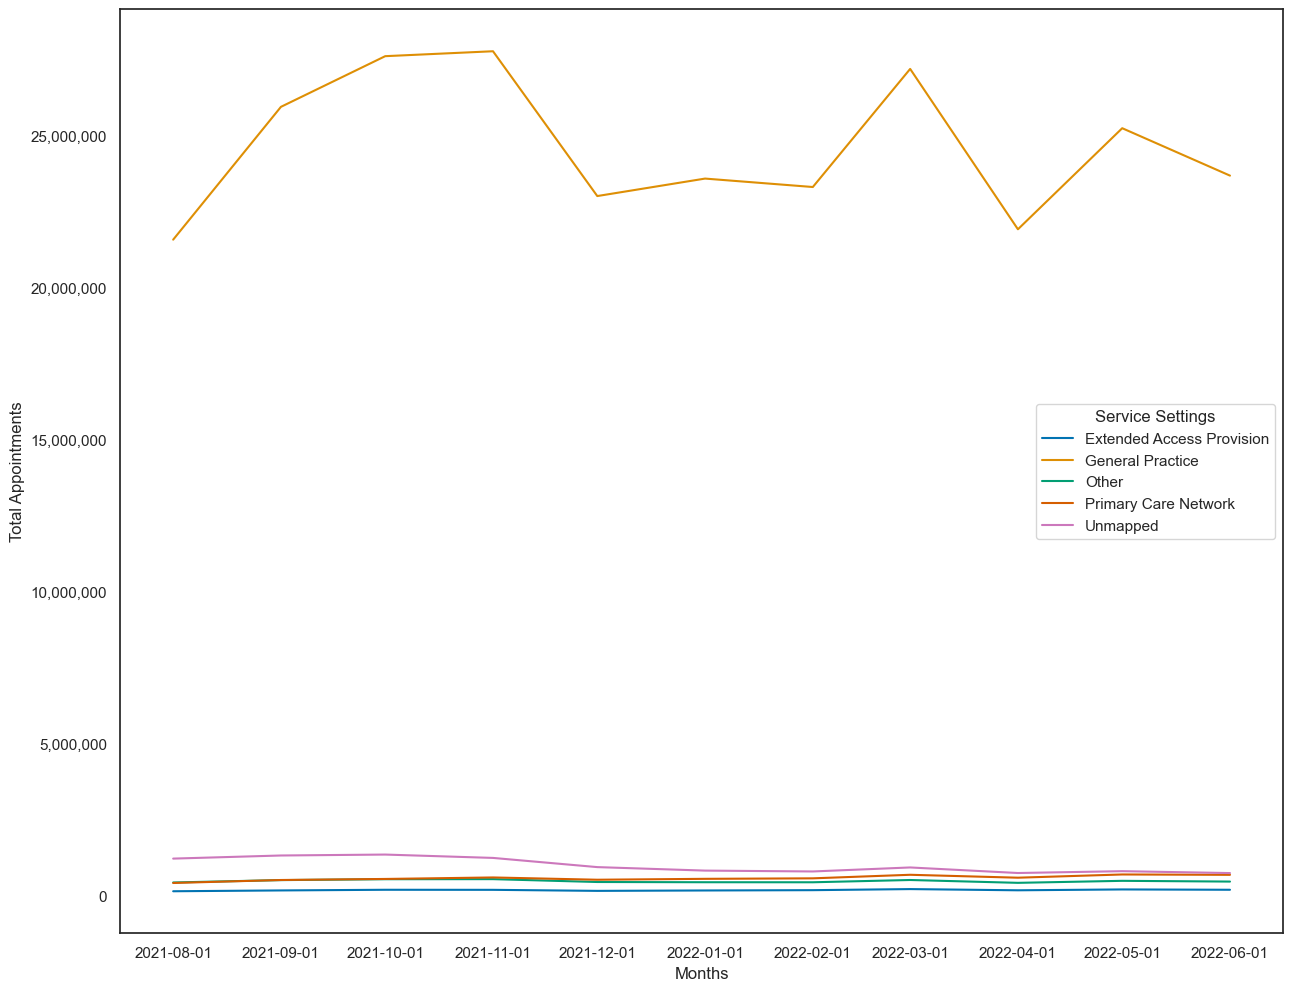

In [54]:
data = pd.DataFrame({
    'x_variable': grouped_data['appointment_month'],
    'y_variable': grouped_data['total_appointments'],
    'Service Settings': grouped_data['service_setting']
})

# Customize x and y axis labels
plt.xlabel('Months')
plt.ylabel('Total Appointments')

# Customize legend labels
plt.legend(title='Service Settings', 
           labels=['Extended Access Provision', 
                   'General Practice', 
                   'Other', 
                   'Primary Care Network', 
                   'Unmapped'
           ]
)

# Create a lineplot with Seaborn
plot = sns.lineplot(
    x='x_variable', y='y_variable', hue='Service Settings',palette='colorblind', data=data, ci=None
)

# Customize y-axis ticks
plot.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Ensure x-axis ticks show all unique values from the 'month' column
plot.set_xticks(grouped_data['appointment_month'].unique())

# Save
plt.savefig('service_setting_by_month.png')

# Show the plot
plt.show()

<h2 style=color:green>Observations</h2>
    
> - Appointments are schedule more for General practices
> - General practice appointments appears to have some sort of seasonality
> - Other service settings seem to be on the decline 


In [55]:
# Creating a new DataFrame 'nc_ct' as a deep copy of 'nc'
nc_ct = nc.copy(deep=True)

# Grouping by 'month' and 'context_type' and calculating the sum of appointments
grouped_data2 = nc_ct.groupby(
    ['appointment_month', 'context_type'])['count_of_appointments'].sum().reset_index(name='total_appointments'
)

#Viewing the new DataFrame.
grouped_data2

,appointment_month,context_type,total_appointments
0,2021-08-01,Care Related Encounter,20255235
1,2021-08-01,Inconsistent Mapping,2363093
2,2021-08-01,Unmapped,1233843
3,2021-09-01,Care Related Encounter,24404251
4,2021-09-01,Inconsistent Mapping,2782135
5,2021-09-01,Unmapped,1336115
6,2021-10-01,Care Related Encounter,26125201
7,2021-10-01,Inconsistent Mapping,2811977
8,2021-10-01,Unmapped,1366656
9,2021-11-01,Care Related Encounter,26282778


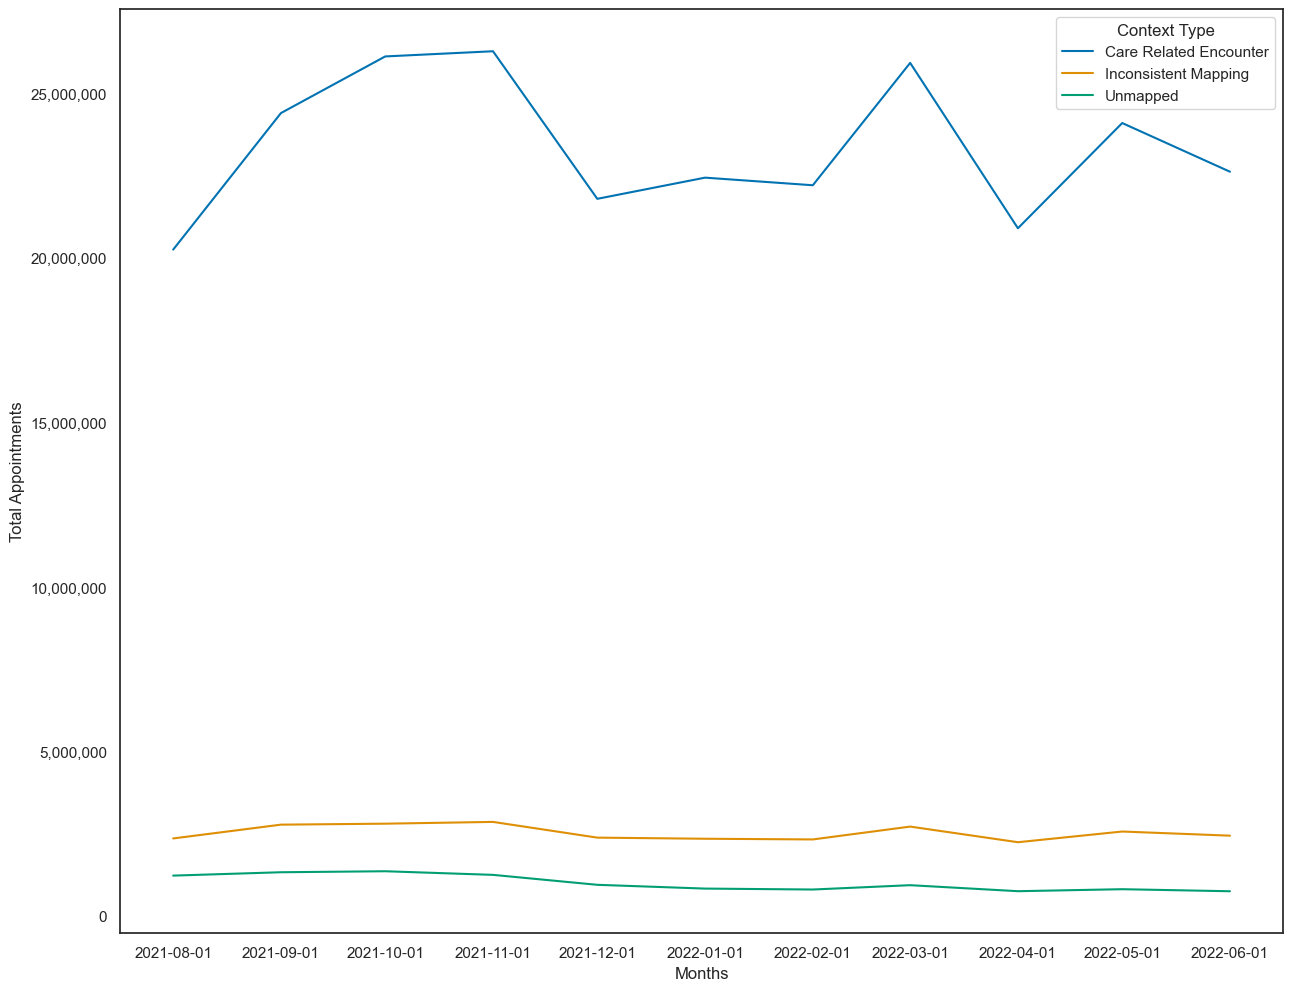

In [56]:
# Create a lineplot.
data = pd.DataFrame({
    'x_variable': grouped_data2['appointment_month'],
    'y_variable': grouped_data2['total_appointments'],
    'Context Type': grouped_data2['context_type']
})

# Customize x and y axis labels
plt.xlabel('Months')
plt.ylabel('Total Appointments')

# Customize legend labels
plt.legend(title='Context Type', labels=['Care Related Encounter', 'Inconsistent Mapping', 'Unmapped'])

# Create a lineplot with Seaborn
plot = sns.lineplot(x='x_variable', y='y_variable',palette='colorblind', hue='Context Type', data=data, ci=None)

# Customize y-axis ticks
plot.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Ensure x-axis ticks show all unique values from the 'month' column
plot.set_xticks(grouped_data2['appointment_month'].unique())

# Save png
plt.savefig('context_type_by_month.png')

# Show the plot
plt.show()

<h2 style=color:green>Observations</h2>
    
> - Appointments are schedule more for Care Related Apponitments
> - Care Related Apponitments seem to have some sort of seasonality
> - Other service settings seem to be on the decline with little slopes or seasonality


In [57]:
# Create a new DataFrame 'nc_ct' as a deep copy of 'nc'
nc_nc = nc.copy(deep=True)

# Group by 'month' and 'context_type' and calculate the sum of appointments
grouped_data3 = nc_nc.groupby(
    ['appointment_month', 'national_category'])['count_of_appointments'].sum().reset_index(name='total_appointments'
)

#View the new DataFrame.
grouped_data3

,appointment_month,national_category,total_appointments
0,2021-08-01,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08-01,Care Home Visit,47583
2,2021-08-01,Clinical Triage,3704207
3,2021-08-01,General Consultation Acute,4280920
4,2021-08-01,General Consultation Routine,7756045
...,...,...,...
193,2022-06-01,Social Prescribing Service,55066
194,2022-06-01,Structured Medication Review,187800
195,2022-06-01,Unmapped,758640
196,2022-06-01,Unplanned Clinical Activity,274491


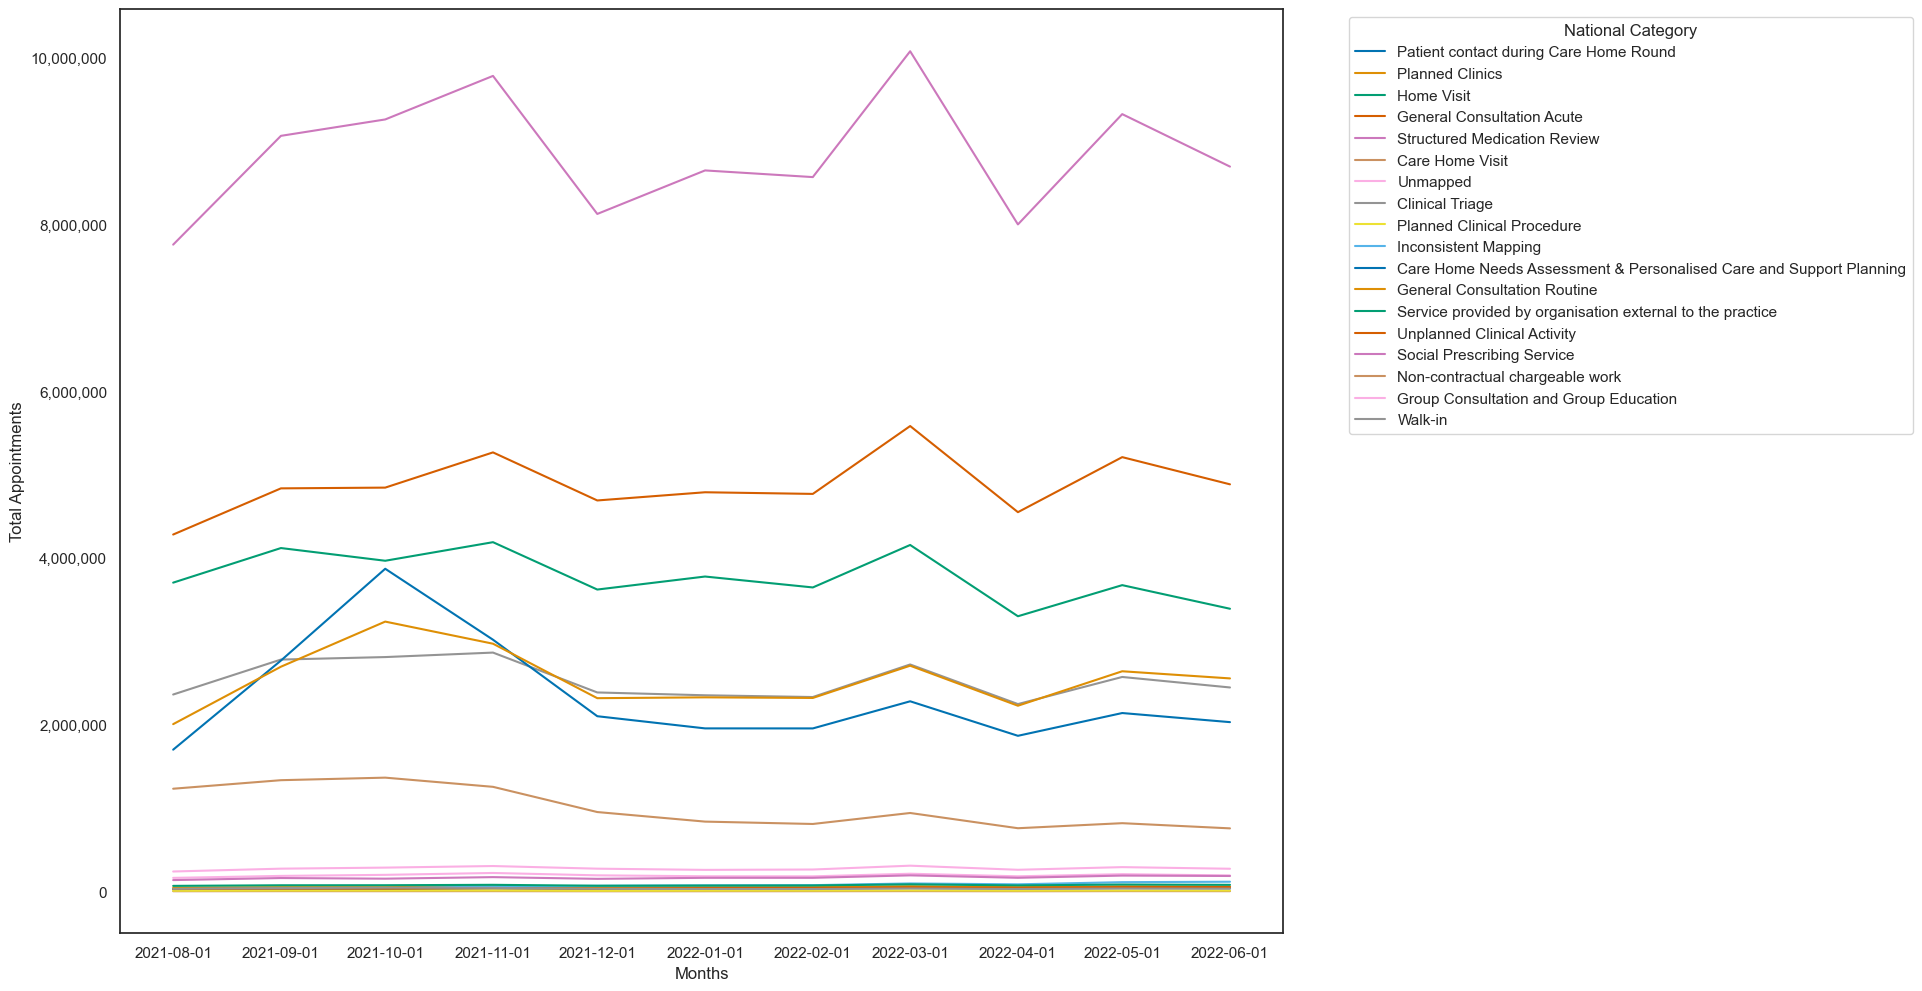

In [58]:
# Create a lineplot with Seaborn
plot = sns.lineplot(
    x='appointment_month', y='total_appointments',palette='colorblind', 
    hue='national_category', data=grouped_data3, ci=None
)

# Customize x and y axis labels
plt.xlabel('Months')
plt.ylabel('Total Appointments')

# Customize legend labels and position it outside the chart
plt.legend(
    title='National Category',
    labels=[
        'Patient contact during Care Home Round',
        'Planned Clinics',
        'Home Visit',
        'General Consultation Acute',
        'Structured Medication Review',
        'Care Home Visit',
        'Unmapped',
        'Clinical Triage',
        'Planned Clinical Procedure',
        'Inconsistent Mapping',
        'Care Home Needs Assessment & Personalised Care and Support Planning',
        'General Consultation Routine',
        'Service provided by organisation external to the practice',
        'Unplanned Clinical Activity',
        'Social Prescribing Service',
        'Non-contractual chargeable work',
        'Group Consultation and Group Education',
        'Walk-in'
    ],
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Customize y-axis ticks
plot.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Ensure x-axis ticks show all unique values from the 'month' column
plot.set_xticks(grouped_data3['appointment_month'].unique())

# Save png
plt.savefig('national_by_month.png')

# Show the plot
plt.show()

<h2 style=color:green>Observations</h2>
    
> - Seasonal trends noticed across majority of the categories 
> - A second group of catigory exhibits flat lines; an indication of consistency in appointment booking
> - This group of categories have low appointment counts


### Objective 2
#### Create three visualisations  indicating seasonal appointments trend.

In [59]:
# Group by 'month' and 'service_setting' and calculate the sum of appointments
grouped_data = nc_ss.groupby(
    ['appointment_date', 'service_setting'])['count_of_appointments'].sum().reset_index(name='total_appointments'
)

# Creating a new DataFrame 'nc_ss_grouped' to store the grouped data with columns:
nc_ss_grouped = pd.DataFrame({
    'appointment_date': grouped_data['appointment_date'],
    'service_setting': grouped_data['service_setting'],
    'total_appointments': grouped_data['total_appointments']
})

# Convert 'appointment_date' to datetime format
nc_ss_grouped['appointment_date'] = pd.to_datetime(nc_ss_grouped['appointment_date'], format='%Y-%m-%d')

# Create a new DataFrame for daily appointments
nc_ss_day = nc_ss_grouped.copy()

nc_ss_day

,appointment_date,service_setting,total_appointments
0,2021-08-01,Extended Access Provision,438
1,2021-08-01,General Practice,3411
2,2021-08-01,Other,401
3,2021-08-01,Primary Care Network,323
4,2021-08-01,Unmapped,1054
...,...,...,...
1665,2022-06-30,Extended Access Provision,9163
1666,2022-06-30,General Practice,1124374
1667,2022-06-30,Other,23115
1668,2022-06-30,Primary Care Network,34774


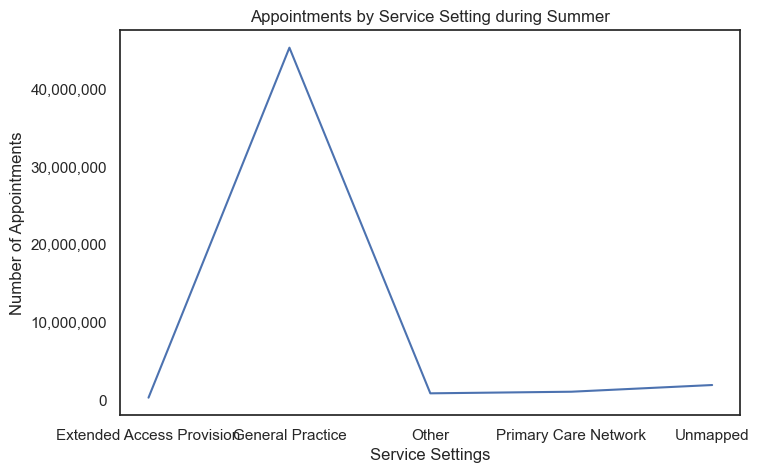

In [60]:
# Filtering data for Summer
summer_data = nc_ss_day[
   
  nc_ss_day['appointment_date'].dt.month.isin([6, 7, 8])
]

# Grouping by month and service_setting, summing the count_of_appointments
grouped_data = summer_data.groupby(['service_setting']).agg({'total_appointments': 'sum'}).reset_index()

# Set the plot size
plt.figure(figsize=(8, 5))

# Creating a lineplot for Summer
plot = sns.lineplot(x='service_setting', y='total_appointments',palette='colorblind', data=grouped_data, ci=None)

# Customising y-axis ticks
plot.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Customising plot
plt.title('Appointments by Service Setting during Summer')
plt.xlabel('Service Settings')
plt.ylabel('Number of Appointments')

# Save png
plt.savefig('summer.png')
plt.show() 

<h2 style=color:green>Observation</h2>

> - General practice high during Summer

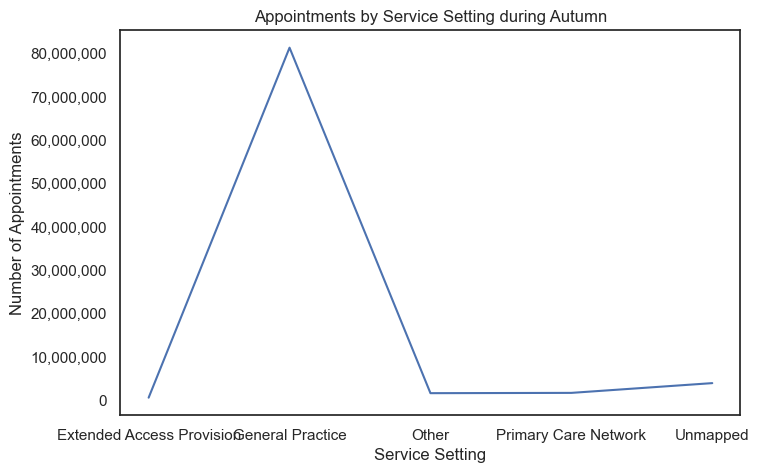

In [61]:
# Set the plot size
plt.figure(figsize=(8, 5))

# Filtering data for Autumn
autumn_data = nc_ss_day[
    nc_ss_day['appointment_date'].dt.month.isin([9, 10, 11])
]

# Grouping by month and service_setting, summing the count_of_appointments
grouped_data = autumn_data.groupby(['service_setting']).agg({'total_appointments': 'sum'}).reset_index()

# Creating a lineplot for Autumn
plot = sns.lineplot(x='service_setting', y='total_appointments', palette='colorblind', data=grouped_data, ci=None)

# Customising y-axis ticks
plot.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Save png
plt.savefig('autumn.png')

# Customising plot
plt.title('Appointments by Service Setting during Autumn')
plt.xlabel('Service Setting')
plt.ylabel('Number of Appointments')
plt.show()


<h2 style=color:green>Observations</h2>
    
> - General practice is highest during Autumn 

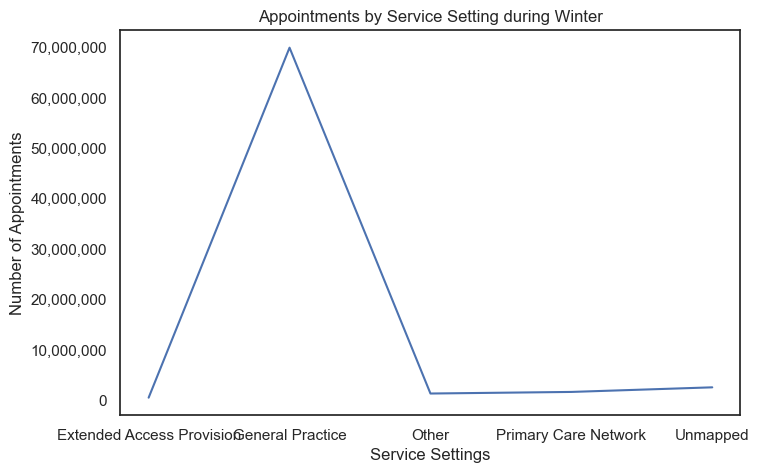

In [62]:
# Filtering data for Winter
winter_data = nc_ss_day[
    nc_ss_day['appointment_date'].dt.month.isin([12, 1, 2])
]

# Grouping by month and service_setting, summing the count_of_appointments
grouped_data = winter_data.groupby(['service_setting']).agg({'total_appointments': 'sum'}).reset_index()

# Set the plot size
plt.figure(figsize=(8, 5))

# Create a lineplot for Winter
plot = sns.lineplot(x='service_setting', y='total_appointments', palette='colorblind', data=grouped_data, ci=None)

# Customizing y-axis ticks
plot.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Customizing plot
plt.title('Appointments by Service Setting during Winter')
plt.xlabel('Service Settings')
plt.ylabel('Number of Appointments')

# Save png
plt.savefig('winter.png')
plt.show()

<h2 style=color:green>Observations</h2>

> - General Practice is highest during winter

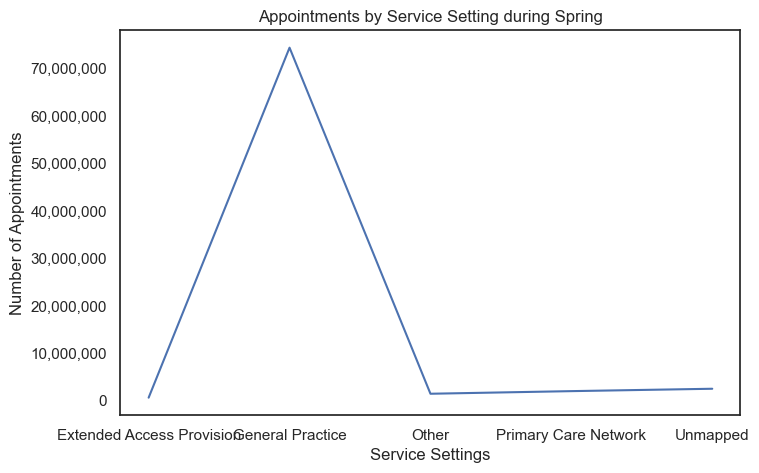

In [63]:
# Filter data for Spring
spring_data = nc_ss_day[
     nc_ss_day['appointment_date'].dt.month.isin([3, 4, 5])
]

# Grouping by month and service_setting, summing the count_of_appointments
grouped_data = spring_data.groupby(['service_setting']).agg({'total_appointments': 'sum'}).reset_index()

# Set the plot size
plt.figure(figsize=(8, 5))

# Creating a lineplot for Spring
plot = sns.lineplot(x='service_setting', y='total_appointments',palette='colorblind', data=grouped_data, ci=None)

# Customising y-axis ticks
plot.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Customising plot
plt.title('Appointments by Service Setting during Spring')
plt.xlabel('Service Settings')
plt.ylabel('Number of Appointments')

plt.savefig('spring.png')
plt.show()

<h2 style=color:green>Observations</h2>

> - General Practice is highest during spring

### Objective 3
#### Create series of barcharts.

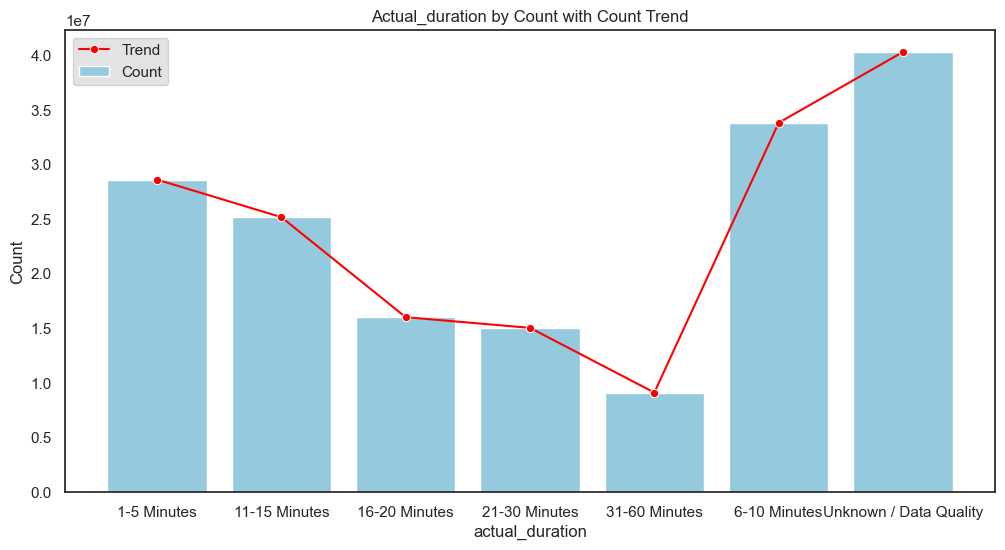

In [64]:
# Grouping the DataFrame by 'actual_duration' and by summing the count_of_appointments.
actual_duration_counts = ad.groupby('actual_duration')['count_of_appointments'].sum().reset_index()

# Plotting the unique 'actual_duration' vs its count with a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='actual_duration', y='count_of_appointments', 
            data=actual_duration_counts, color='skyblue', label='Count'
           )

# Adding a line plot on top of the bar plot
sns.lineplot(x='actual_duration', y='count_of_appointments', 
             data=actual_duration_counts, color='red', marker='o', label='Trend'
            )

# Set the style of ticks.
sns.set_style('ticks', {'axes.facecolor': '#dddddd'})

# Set the style of plot.
plt.title('Actual_duration by Count with Count Trend')
plt.xlabel('actual_duration')
plt.ylabel('Count')
plt.legend()

# Showing plot
plt.show()

<h2 style=color:green>Observations</h2>

> - The high count in "Unknown/Data Quantity" suggests the need for a review and standardization.
> - The count of Actual duration type reduces as the duration increases. Suggesting effort to book shorter appointments.
> - 6-10 minutes differs

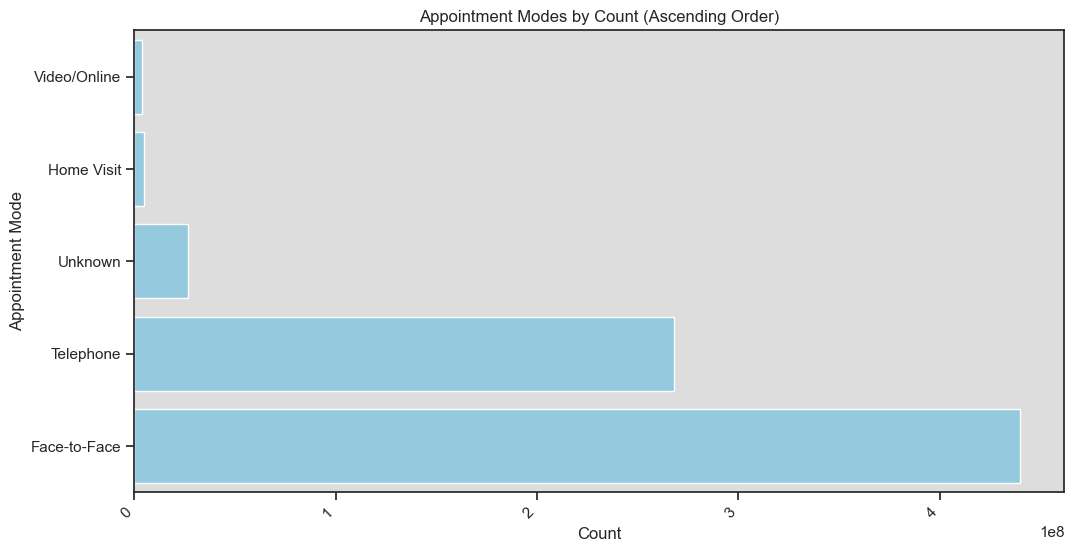

In [65]:
# Grouping the DataFrame by 'appointment_mode' and summing the count_of_appointments
appointment_mode_counts = ar.groupby('appointment_mode')['count_of_appointments'].sum().reset_index()

# Sorting the DataFrame by 'count_of_appointments' in ascending order
appointment_mode_counts = appointment_mode_counts.sort_values(by='count_of_appointments', ascending=True)

# Plotting the unique 'appointment_mode' vs its count with a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='count_of_appointments', y='appointment_mode', data=appointment_mode_counts, color='skyblue')

# Setting the style of ticks.
sns.set_style('ticks', {'axes.facecolor': '#dddddd'})

# Setting the style of the plot.
plt.title('Appointment Modes by Count (Ascending Order)')
plt.xlabel('Count')
plt.ylabel('Appointment Mode')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Showing plot
plt.show()


<h2 style=color:green>Observations</h2>

> - Face to Face has more records
> - The video/Online has less records.

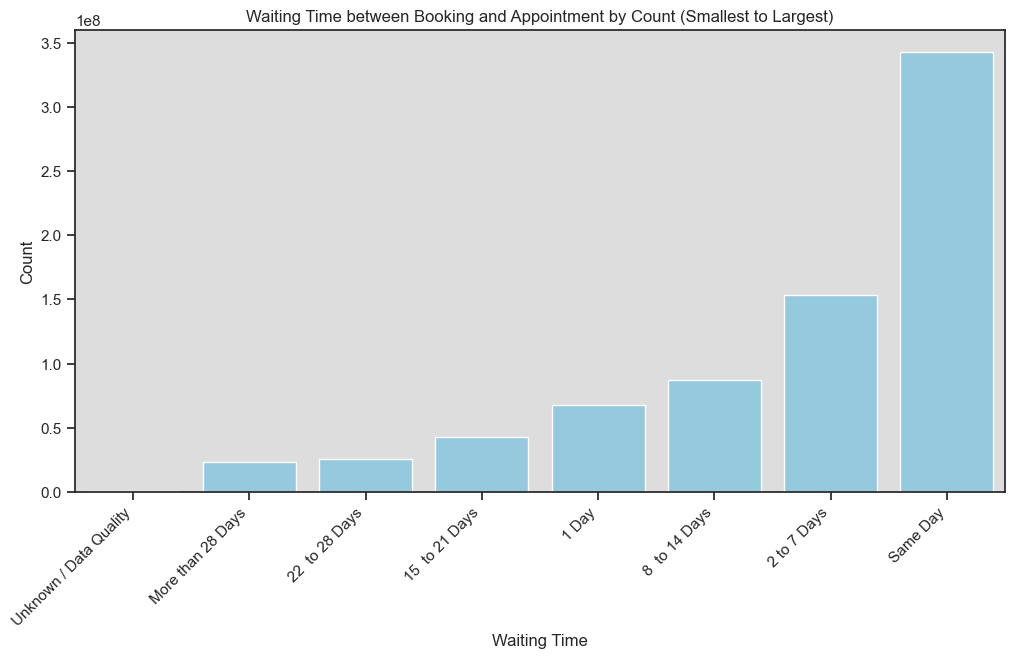

In [66]:

# Grouping the DataFrame by 'time_between_book_and_appointment' and counting occurrences
waiting_time_counts = ar.groupby('time_between_book_and_appointment')['count_of_appointments'].sum().reset_index(name='count')

# Sorting the DataFrame by 'time_between_book_and_appointment' in ascending order
waiting_time_counts = waiting_time_counts.sort_values(by='count', ascending=True)

# Plotting the unique 'time_between_book_and_appointment' vs its count with a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='time_between_book_and_appointment', y='count', data=waiting_time_counts, color='skyblue')

# Setting the style of ticks.
sns.set_style('ticks', {'axes.facecolor': '#dddddd'})

# Setting the style of the plot.
plt.title('Waiting Time between Booking and Appointment by Count (Smallest to Largest)')
plt.xlabel('Waiting Time')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Showing plot
plt.show()


<h2 style=color:green>Observations</h2>

> - Same day has more records
> - More than 28 days has less records.

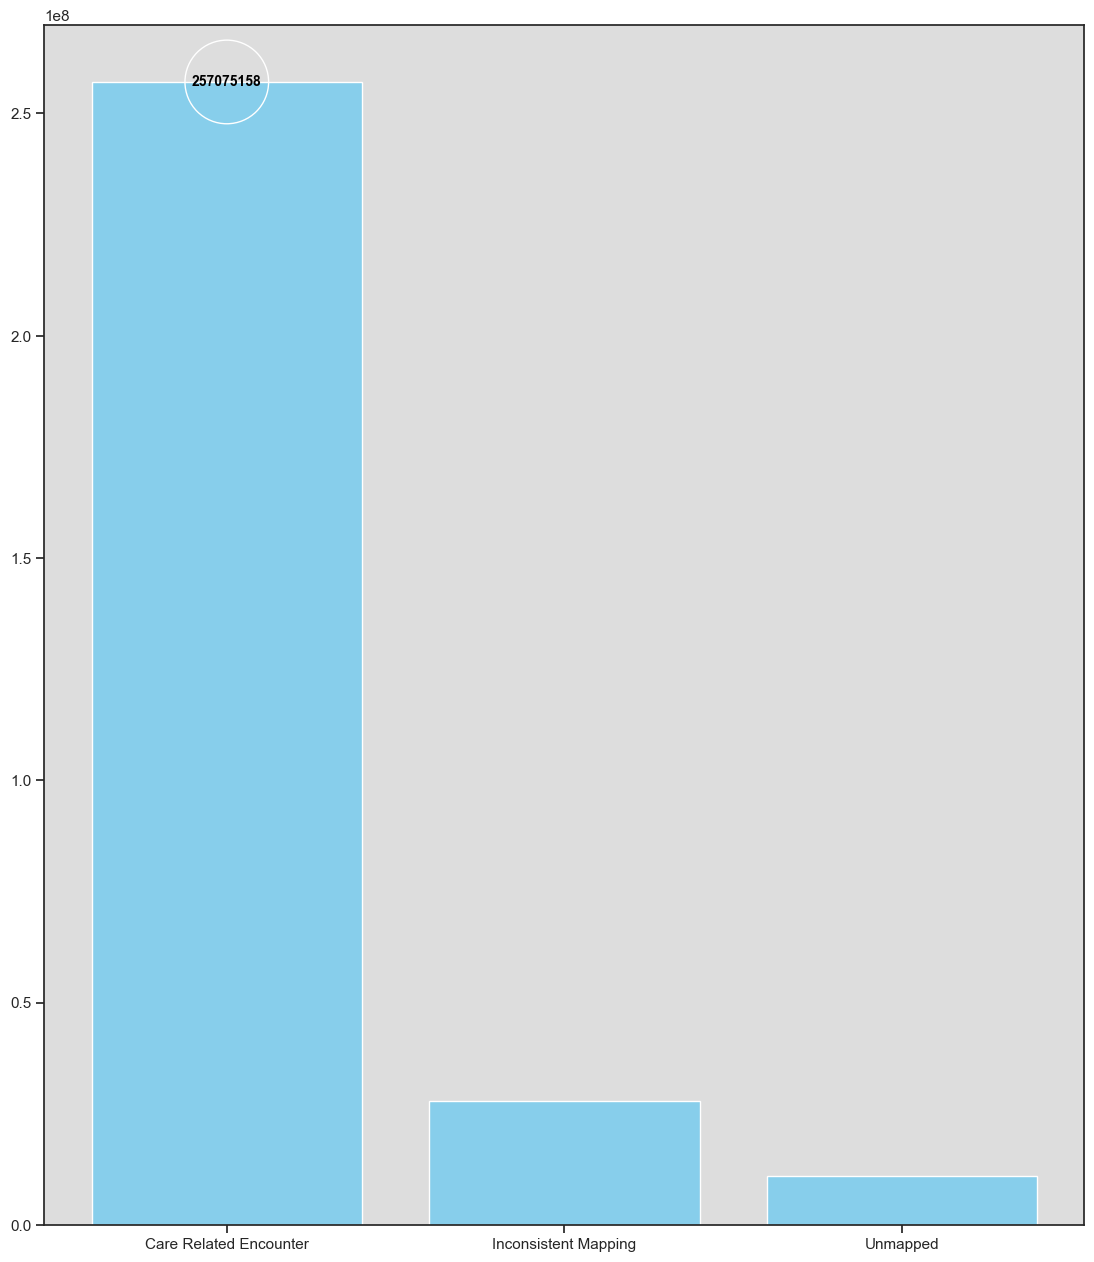

In [67]:
# Creating empty plot and setting plot size.
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

# Set inner padding for the figure
plt.subplots_adjust(left=0.2, right=1.5, top=2.4, bottom=0.0)

# Create barplot.
bars = ax.bar(total_appointments_per_type['context_type'], total_appointments_per_type['count_of_appointments'], color='skyblue')

# Setting axis color
sns.set_style('ticks', {'axes.facecolor': '#dddddd'})

# Annotate the first bar with a circle
first_bar_value = total_appointments_per_type['count_of_appointments'].iloc[0]
ax.annotate(f'{first_bar_value}', xy=(0, first_bar_value), xytext=(0, first_bar_value + 20),
            ha='center', va='center', color='black', fontsize=10, weight='bold',
            bbox={'boxstyle': 'circle, pad=0.5', 'fill': False},

        arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', lw=1.5))

# Veiw chart
plt.show()


<h2 style=color:green>Observations</h2>

> - Care Related Encounter had more appointment.

### Objective 3
#### Create other visualisations types.

<Figure size 1200x600 with 0 Axes>

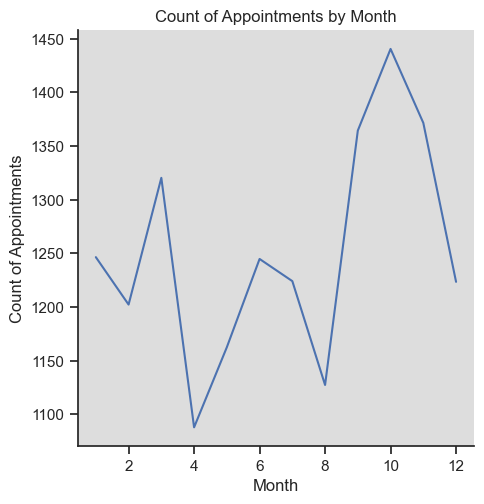

In [68]:
# Creating a relational plot (relplot) with count of appointments by month
plt.figure(figsize=(12, 6))
sns.relplot(x='month', y='count_of_appointments', kind='line', data=ar, ci=None)

# Setting the style of ticks.
sns.set_style('ticks', {'axes.facecolor': '#dddddd'})

# Setting the style of the plot.
plt.title('Count of Appointments by Month')
plt.xlabel('Month')
plt.ylabel('Count of Appointments')

# Showing plot
plt.show()

<h2 style=color:green>Observations</h2>

> - Seasonal trend noticed in the slop of the plot

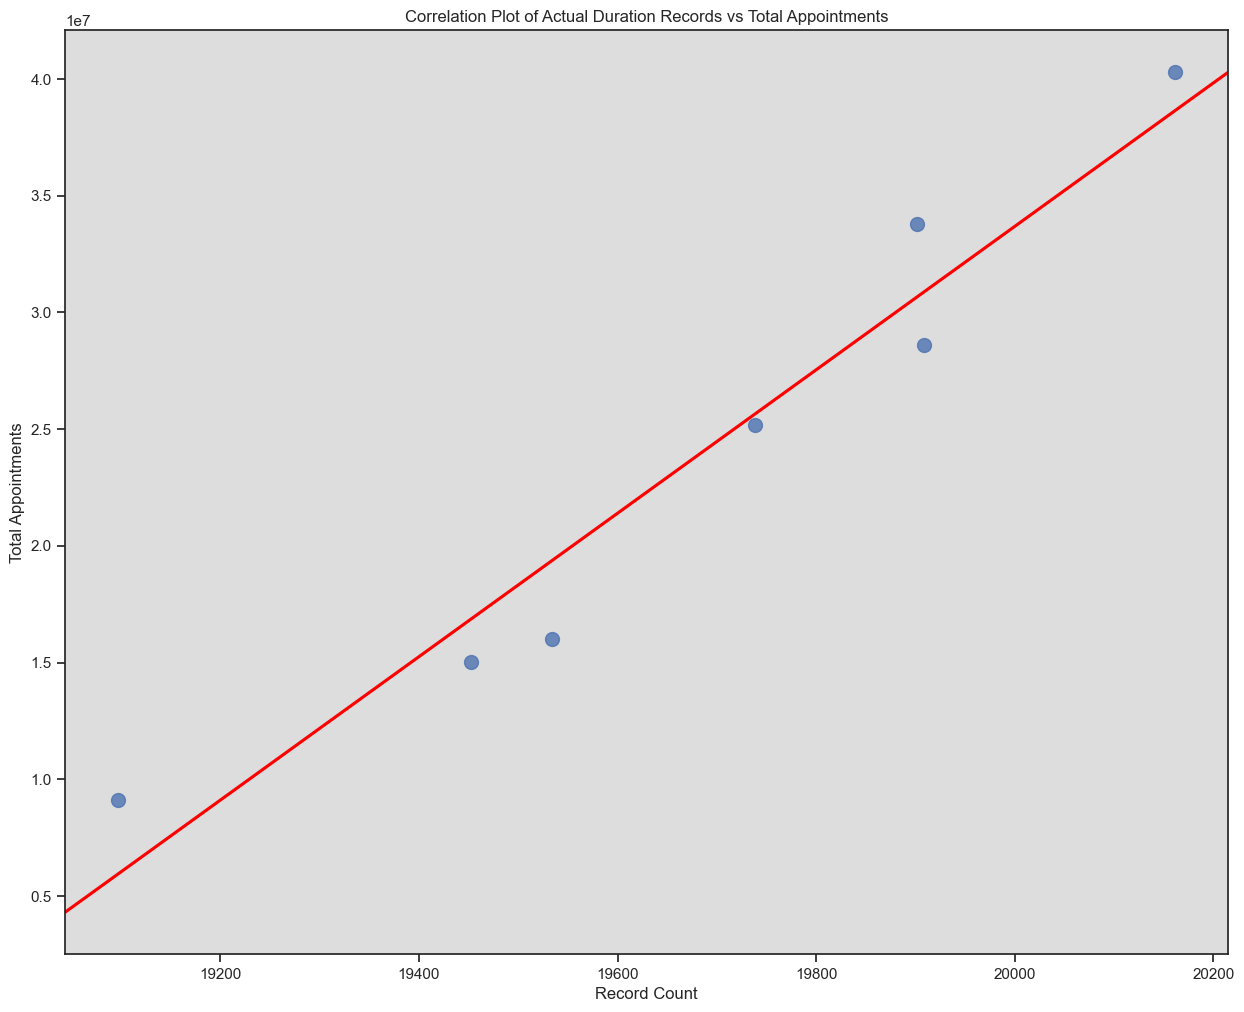

In [69]:
#Generate a correlation analysis between Actual Duration records and total count of appointment

# Group by 'actual_duration' and aggregate the counts
actual_duration_records = ad.groupby('actual_duration')['count_of_appointments'].agg(['count', 'sum']).reset_index()

# Rename the columns
actual_duration_records.columns = ['actual_duration', 'record_count', 'total_appointments']

# Calculate average appointment per record
actual_duration_records['avg_app_per_record'] = round(actual_duration_records['total_appointments'] / actual_duration_records['record_count'])

# Calculate total minutes required fufill all booked apointment using actual_duration upper limit

# Declaring the upper limit variable
actual_duration_records['upper_limit_duration(Minutes)'] = [5, 15, 20, 30, 60, 10, 0]

# Calculating time required to fufill booked apointment
actual_duration_records['minutes_required(Minutes)'] = round(actual_duration_records['upper_limit_duration(Minutes)'] * actual_duration_records['total_appointments'])

# Create a relational plot (correlation plot)
#sns.relplot(x='record_count', y='total_appointments', data=result, kind='scatter', hue='time_between_book_and_appointment', height=6, aspect=1.5)
#sns.regplot(x='record_count', y='total_appointments', data=actual_duration_records, scatter_kws={'s': 100},ci=None, truncate=False)
sns.regplot(x='record_count', y='total_appointments', data=actual_duration_records,
            scatter_kws={'s': 100}, ci=None, truncate=False, line_kws={'color': 'red', 'label': 'Trend Line'})

# Set plot title and labels
plt.title('Correlation Plot of Actual Duration Records vs Total Appointments')
plt.xlabel('Record Count')
plt.ylabel('Total Appointments')

# Show the plot
plt.show()

<h2 style=color:green>Observations</h2>

> - There is a positive relationship. As the record count increases, the appoinments increase.
the general tendency or movement, is clearly from the lower left to the upper right of the plot.

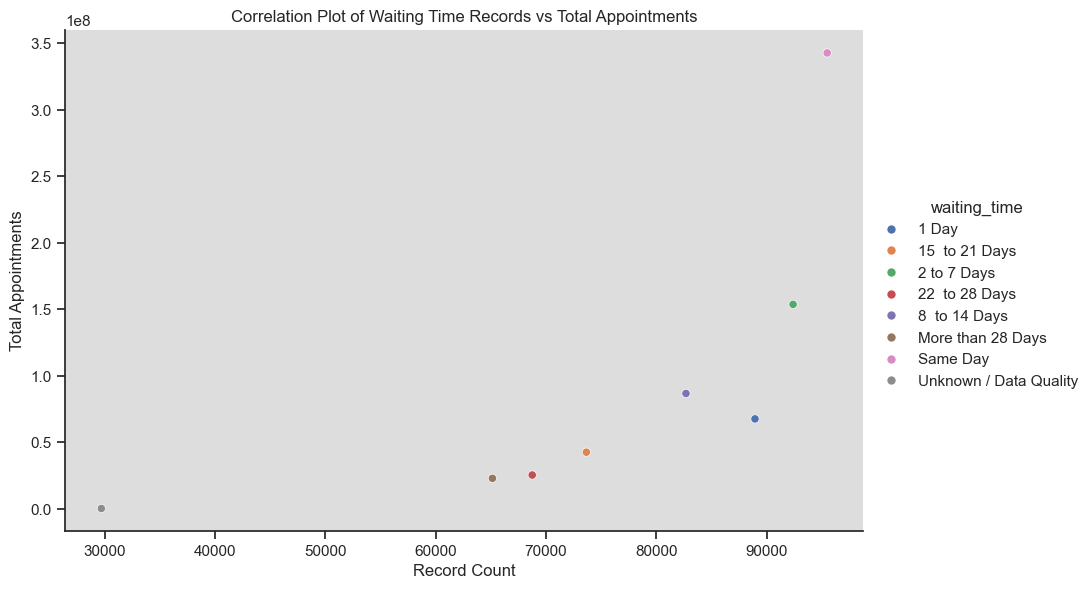

In [70]:
# Generate a relational plot of Waiting Time Records vs Total Appointments

# Group by 'actual_duration' and aggregate the counts
waiting_time_records = ar.groupby('time_between_book_and_appointment')['count_of_appointments'].agg(['count', 'sum']).reset_index()

# Rename the columns
waiting_time_records.columns = ['waiting_time', 'record_count', 'total_appointments']

# Define plot parameters
sns.relplot(x='record_count', y='total_appointments', data=waiting_time_records, kind='scatter', hue='waiting_time', height=6, aspect=1.5)
#sns.regplot(x='record_count', y='total_appointments', data=waiting_time_records, scatter_kws={'s': 100},ci=None, truncate=False)

# Set plot title and labels
plt.title('Correlation Plot of Waiting Time Records vs Total Appointments')
plt.xlabel('Record Count')
plt.ylabel('Total Appointments')

# Show the plot
plt.show()

<h2 style=color:green>Observations</h2>

> - There is a positive relationship.
> - As the appointment increases, there are more 1 Day booking

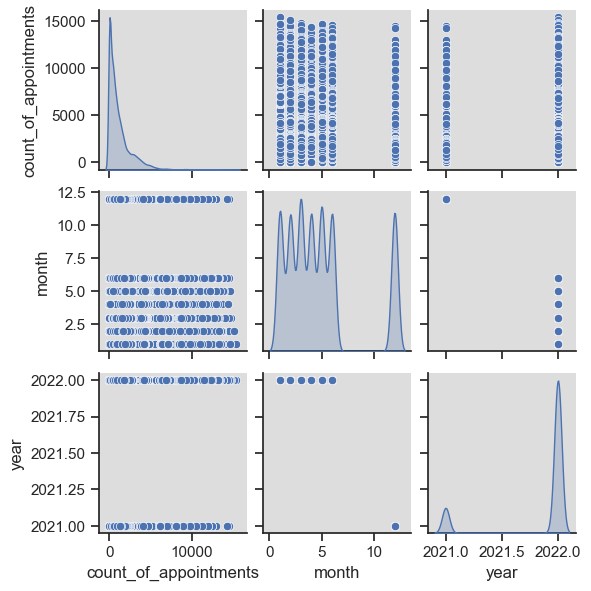

In [71]:
# Plot pairplot for ad subset with KDE.
sns.pairplot(ad, diag_kind='kde', height=2);

<h2 style=color:green>Observations</h2>

> - The count of appointment distribution is skwed to the left
> - Correlations are not visible

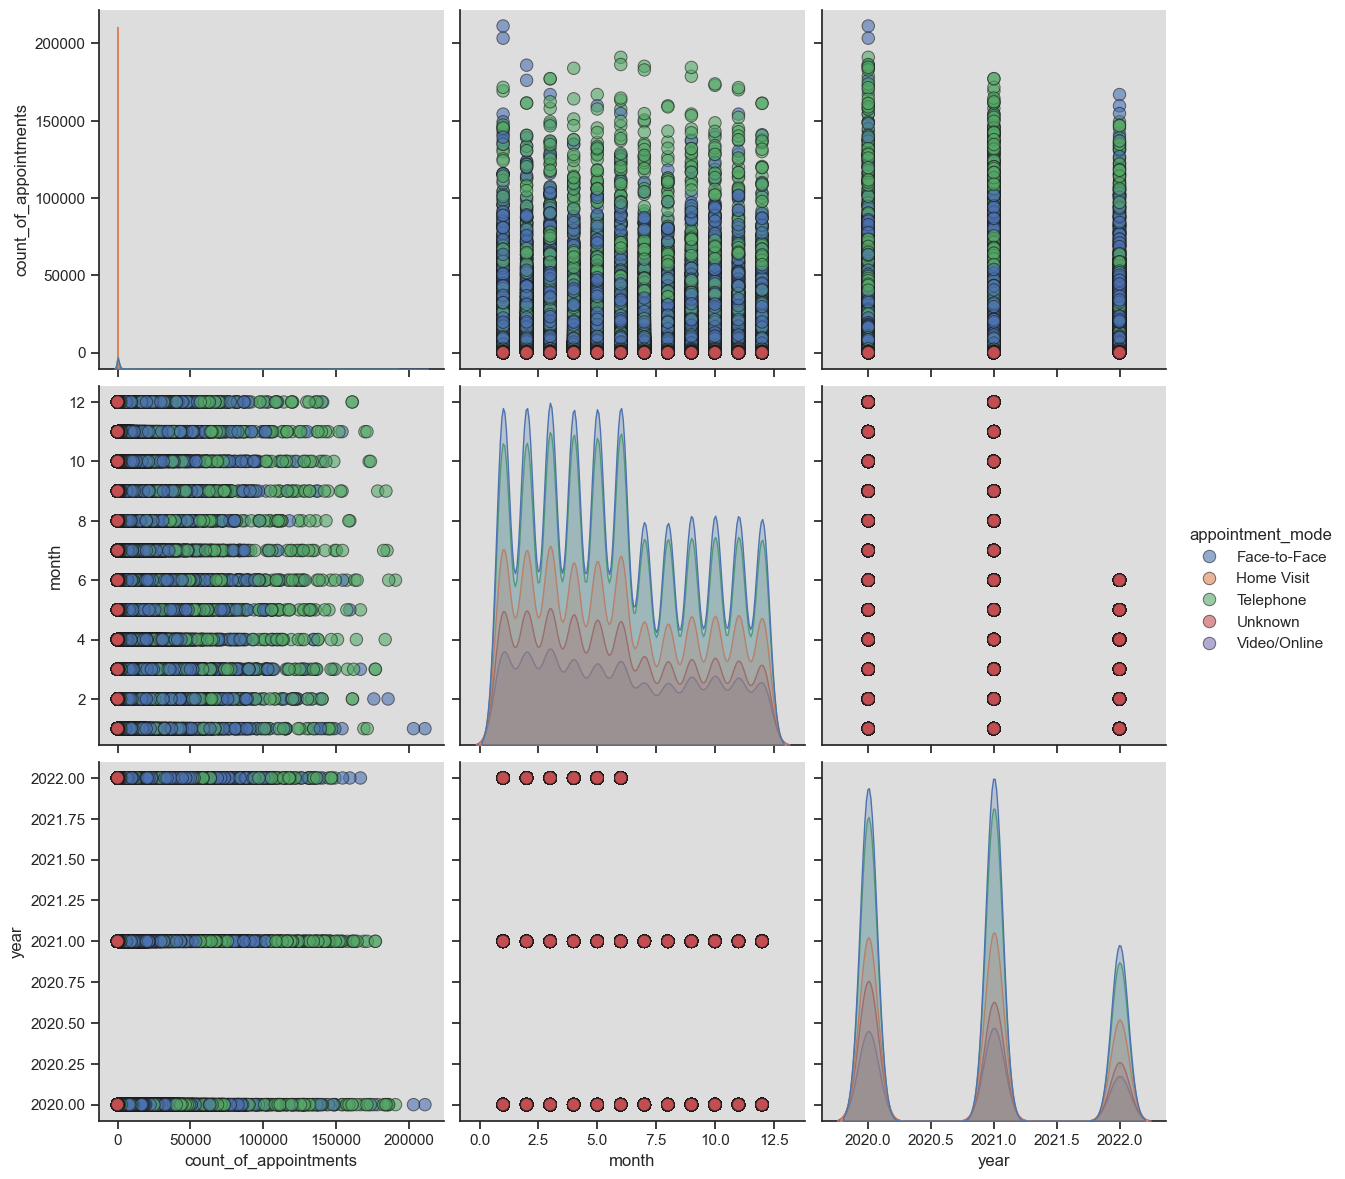

In [72]:
# Plot pairplot for ar subset with KDE.
#sns.pairplot(ar, diag_kind='kde', height=2);
sns.pairplot(
    ar, hue = 'appointment_mode', diag_kind = 'kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 4
)

<h2 style=color:green>Observations</h2>

> - Count of appointment are skweed to the left
> - Possible indications that there are outliers or extreme values on the left side of the data
> - Face to Face and Telephone mode are common.

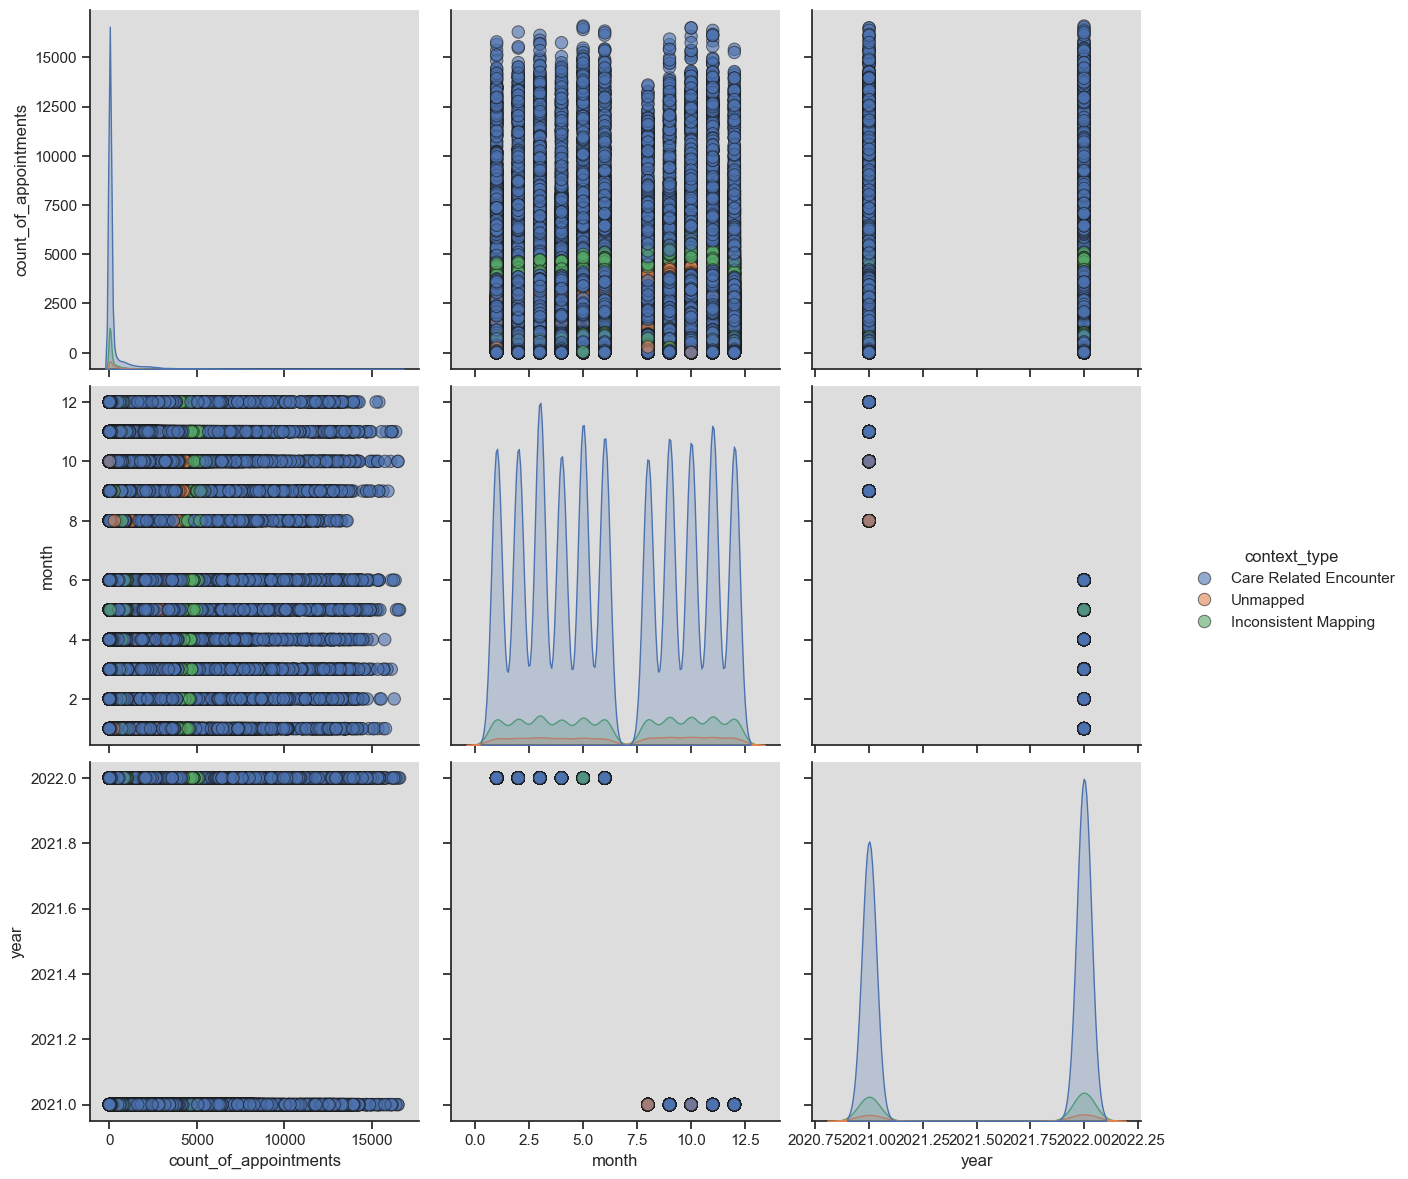

In [73]:
# Plot pairplot for nc subset with KDE.
#sns.pairplot(nc, diag_kind='kde', height=2);
#sns.pairplot(nc, hue = 'context_type', diag_kind = 'kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 4 )

sns.pairplot(
    nc, hue='context_type', diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height=4
)

<h2 style=color:green>Observations</h2>

> - Count of appointment are skweed to the left
> - Possible indications that there are outliers or extreme values on the left side of the data
> - Care Related Encounters are common.

## 5) Assignment activity 5

<h2 style=color:black> 1. Analyse tweets from Twitter with hashtags related to healthcare in the UK.</h2>

In [74]:
# Set the figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display.
pd.options.display.max_colwidth = 200

In [75]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
tweets

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
...,...,...,...,...,...,...,...,...,...,...
1169,1567583004209332227,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…,"{'hashtags': [{'text': 'Innovation', 'indices': [29, 40]}, {'text': 'precisionFabrication', 'indices': [50, 71]}, {'text': 'Microfluidic', 'indices': [92, 105]}], 'symbols': [], 'user_mentions': [...","#Innovation, #precisionFabrication, #Microfluidic","{'iso_language_code': 'en', 'result_type': 'recent'}",1,0,False,False,en
1170,1567582945342267393,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie...","{'hashtags': [{'text': 'SKPoli', 'indices': [232, 239]}, {'text': 'healthcare', 'indices': [240, 251]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/33f7Dz5FrU', 'expanded_u...","#SKPoli, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,1,False,False,en
1171,1567582936014241792,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp...","{'hashtags': [{'text': 'webinar', 'indices': [149, 157]}, {'text': 'ESG', 'indices'

In [76]:
# get a concise summary of the DataFrame
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [77]:
# Display the first few rows of the DataFrame.
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [78]:
# Get summary statistics for numerical columns
tweets.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [79]:
#Find missing values 
tweets.isnull().sum()

tweet_id                     0
tweet_full_text              0
tweet_entities               0
tweet_entities_hashtags    167
tweet_metadata               0
tweet_retweet_count          0
tweet_favorite_count         0
tweet_favorited              0
tweet_retweeted              0
tweet_lang                   0
dtype: int64

In [80]:
#list the columns
tweets.columns

Index(['tweet_id', 'tweet_full_text', 'tweet_entities',
       'tweet_entities_hashtags', 'tweet_metadata', 'tweet_retweet_count',
       'tweet_favorite_count', 'tweet_favorited', 'tweet_retweeted',
       'tweet_lang'],
      dtype='object')

# <h2 style=color:green>Observations</h2>

> - RangeIndex: 1174 entries
> - Total 10 columns
> - Considering the tweet_retweet_count and tweet_favorite_count, mean= 8.629472 and 0.37138 , max= 303 and 42
> - tweet_entities_hashtags has 167 missing values

# Would it be useful to only look at retweeted and favorite tweet messages?

Some of the reasons why we look at retweeted and favorite messages in the context of this assignment are 

> * Engagement Metrics: Monitoring retweets and favourites provides insights into the popularity and reach of tweets. 
It helps us understand which content resonates most with the  audience. High engagement metrics indicate that the 
message is being well-received and shared within the Twitter community.

> * Audience Feedback: Retweets and favourites can be a form of feedback from the audience. Users often retweet 
content they find valuable or interesting, and favourites can signify approval or agreement. Analysing these 
interactions will help in gauging the sentiments and opinions of the audience.

> Other Columns within the DataFrame and usefulness to these observations include

> 1. tweet_id - This will be useful if we are analysing tweets based on ID
> 2. tweet_full_text - This will be useful if we are looking at the most popular tweet, 
and observing what the Twitter community is most happy about. 
> 3. tweet_entities - This may not be relevant in the context of this assignment for now. It consists of hashtag objects.
> 4. tweet_entities_hashtags - This is relevant to this scope, Hashtags help categorize content and make it discoverable within 
specific topics or themes. It helps to track the performance of specific campaigns and makes it easy to aggregate content 
related to a specific topic. 
> 5. tweet_metadata - The types are all recent, hence there is no further analysis required on this.

> 6. tweet_retweet_count - This is an aggregation of the retweeted and relevant to our analysis. 

> 7. tweet_favorite_count - This is an aggregation of the favoruited and relevant to our analysis. 

> 8. tweet_lang - This is not relevant to our analysis at this point in time as it only indicates the tweet language.

In [81]:
#Arrange tweets by retweet count

# Create a new DataFrame with selected columns
maximum_retweet = tweets[['tweet_retweet_count', 'tweet_entities_hashtags']]

# Sort the new DataFrame by 'tweet_retweet_count' in descending order
maximum_retweet = maximum_retweet.sort_values(by='tweet_retweet_count', ascending=False)

# Reset the index if needed
maximum_retweet = maximum_retweet.reset_index(drop=True)

# Display the new DataFrame
maximum_retweet

,tweet_retweet_count,tweet_entities_hashtags
0,303,NaN
1,208,NaN
2,208,NaN
3,208,NaN
4,208,NaN
...,...,...
1169,0,"#healthcare, #rehab"
1170,0,#healthcare
1171,0,"#Hillsboro, #Healthcare"
1172,0,"#healthcare, #Highway407, #onpoli"


In [82]:
# Exploring 'tweet_retweet_count'
retweet_count_distribution = tweets['tweet_retweet_count'].value_counts().sort_index()
print("Tweet Retweet Count Distribution (Ascending Order):")
print(retweet_count_distribution)

# Exploring 'tweet_favorite_count'
favorite_count_distribution = tweets['tweet_favorite_count'].value_counts().sort_index()
print("\nTweet Favorite Count Distribution (Ascending Order):")
print(favorite_count_distribution)

Tweet Retweet Count Distribution (Ascending Order):
tweet_retweet_count
0      526
1      215
2      114
3       70
4       27
5       35
6       12
7       18
8       15
9       13
10       5
11       6
12      16
13       1
14       1
15       1
16       2
19       1
20       1
23       2
24       2
35      10
37       6
39       1
40       1
41       3
44       4
48       1
49       1
53       5
54       1
57       1
62       3
63       4
68       3
72       2
73      14
76       3
78       2
79       1
85       3
107      1
150      4
169      1
207      3
208     12
303      1
Name: count, dtype: int64

Tweet Favorite Count Distribution (Ascending Order):
tweet_favorite_count
0     1027
1       91
2       16
3       13
4        7
5        5
6        2
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
17       1
18       1
20       1
28       1
42       1
Name: count, dtype: int64


<h2 style=color:green>Observations</h2>

> - There are 526 tweets without retweet_count
> - 3 tweets had 207 retweet_count
> - 12 tweets had 208 retweet_count 
> - 1 tweet had 303 retweet_count
> - There are 1027 tweets without favorite_count
> - 1 tweet had 42 favorite_count
> - 1 tweet had 28 favorite_count
> - 1 tweet had 20 favorite_count


In [83]:
# Display the top 3 most retweeted text

# Filtering rows where 'tweet_retweet_count' is equal to 207, 208, or 303
specific_retweet_count_tweets = tweets[
    (tweets['tweet_retweet_count'] == 207)]
specific_retweet_count_tweets2 = tweets[
    (tweets['tweet_retweet_count'] == 208)]
specific_retweet_count_tweets3 = tweets[
    (tweets['tweet_retweet_count'] == 303)]

# Displaying the 'tweet_full_text' for the filtered rows
selected_full_text = specific_retweet_count_tweets['tweet_full_text']
selected_full_text2 = specific_retweet_count_tweets2['tweet_full_text']
selected_full_text3 = specific_retweet_count_tweets3['tweet_full_text']

print("Tweet Full Text with Retweet Count 207:")
print(selected_full_text.unique())

print("Tweet Full Text with Retweet Count 208:")
print(selected_full_text2.unique())

print("Tweet Full Text with Retweet Count 303:")
print(selected_full_text3.unique())


Tweet Full Text with Retweet Count 207:
['RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…']
Tweet Full Text with Retweet Count 208:
['RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…']
Tweet Full Text with Retweet Count 303:
['RT @UltimaLionsDen: Temitope is looking to boost efficiency in the Health industry with his app- \nWe-Care Africa. \n\nWas his pitch in good s…']


<h2 style=color:green>Observations</h2>

> - Most popular Retweets is about the use of superstar as brand ambassador in the healthcare industry, use of application to \
boost efficiency in the Health industry
> - Where boosting efficiency in the Health industry ranks number 1


In [84]:
# Display the top 3 most favourited text

# Filtering rows where 'tweet_favorite_count' is in the range from 20 to 48
specific_favorite_count_tweets = tweets[
    (tweets['tweet_favorite_count'] >= 20) & (tweets['tweet_favorite_count'] <= 48)
]

# Displaying the 'tweet_full_text' for the filtered rows
selected_full_text = specific_favorite_count_tweets['tweet_full_text']
print("Tweet Full Text with Favorite Count between 20 and 48:")
print(selected_full_text)

Tweet Full Text with Favorite Count between 20 and 48:
9                                                                                                                          You ready for $JCO @_JennyCo ❤️\n\n#Healthcare data powered by @Conste11ation $DAG 🔥
442                                                                                                                      How health insurance works 😂 \n\n#comedy #adulting #healthcare https://t.co/ciksdeoAkb
1156    Lipid-Lowering Drugs\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStudents #medstudenttwitter #lipid \n\nCredit: ...
Name: tweet_full_text, dtype: object


<h2 style=color:green>Observations</h2>

> - Healthcare powered by data is loved by twitters
> - People like the 'How health insurance works' joke
> - People like drugs that reduce the amount of cholesterol the body makes.

In [85]:
# Filter rows where 'tweet_retweet_count' is greater than 70
high_retweet_count_tweets = tweets[tweets['tweet_retweet_count'] > 70]

# Displaying the 'tweet_entities_hashtags' for the filtered rows
selected_hashtags = high_retweet_count_tweets['tweet_entities_hashtags']
print("Tweet Entities Hashtags with Retweet Count > 70:")
print(selected_hashtags)

Tweet Entities Hashtags with Retweet Count > 70:
27                                                                                                       NaN
38                                                                                                       NaN
65                                                                                               #healthcare
68                                                                                                       NaN
86                                                                                                       NaN
100                                                                                              #healthcare
101                                                                                              #healthcare
111                                                                                       #data, #healthcare
126                                                                            

<h2 style=color:green>Observations</h2>

> Popular topics include Applications, AI, healthcare, digitalhealth, Healthtech, Health, DataScience, Bigdata\
pulmonary, pulmtwitter, pulmonology, respiratory, internalmedicine, and TipsForNewDocs

In [86]:
# Filter rows where 'tweet_favorite_count' is greater than 10
high_tweet_favorite_count = tweets[tweets['tweet_favorite_count'] > 10]

# Displaying the 'tweet_entities_hashtags' for the filtered rows
selected_hashtags2 = high_tweet_favorite_count['tweet_entities_hashtags']
print("Tweet Entities Hashtags with favorite_count > 10:")
print(selected_hashtags2)

Tweet Entities Hashtags with favorite_count > 10:
9                                                                                                                                                                        #Healthcare
84                                                                                                                                                             #healthcare, #cdnpoli
119                                                                                                                                                                      #healthcare
342                                #WomenInMedicine, #SheLeadsHealthcare, #InvestInHer, #InvestInHer, #healthcare, #leadership, #racialequity, #genderequity, #MedTwitter, #HeForShe
442                                                                                                                                                  #comedy, #adulting, #healthcare
758                                          

<h2 style=color:green>Observations</h2>

> - Less liked tweets also include topics like TipsForNewDocs, MedEd, MedTwitter, medicine, medical, medicare,\
health, healthcare, FOAMed, ClinicalPearl, clinicaltips, MedStudents, medstudenttwitter and lipid

In [87]:
# Split the hashtags and create a new DataFrame
new_df = selected_hashtags.str.split(', ', expand=True).stack().reset_index(level=1, drop=True).reset_index(name='tweet_entities_hashtags')

# Display the new DataFrame
print("New DataFrame with Hashtags in Separate Rows:")
print(new_df)


New DataFrame with Hashtags in Separate Rows:
    index tweet_entities_hashtags
0      65             #healthcare
1     100             #healthcare
2     101             #healthcare
3     111                   #data
4     111             #healthcare
..    ...                     ...
62   1130         #TipsForNewDocs
63   1130                  #MedEd
64   1130             #MedTwitter
65   1130               #medicine
66   1130                #medical

[67 rows x 2 columns]


In [88]:
# Split the hashtags and create a new DataFrame
new_df2 = selected_hashtags2.str.split(', ', expand=True).stack().reset_index(level=1, drop=True).reset_index(name='tweet_entities_hashtags')

# Display the new DataFrame
print("New DataFrame with Hashtags in Separate Rows:")
print(new_df2)

New DataFrame with Hashtags in Separate Rows:
    index tweet_entities_hashtags
0       9             #Healthcare
1      84             #healthcare
2      84                #cdnpoli
3     119             #healthcare
4     342        #WomenInMedicine
5     342     #SheLeadsHealthcare
6     342            #InvestInHer
7     342            #InvestInHer
8     342             #healthcare
9     342             #leadership
10    342           #racialequity
11    342           #genderequity
12    342             #MedTwitter
13    342               #HeForShe
14    442                 #comedy
15    442               #adulting
16    442             #healthcare
17    758                 #ConV2X
18    758             #blockchain
19    758                    #DLT
20    758             #healthcare
21    758             #innovation
22   1098             #HealthCare
23   1122         #TipsForNewDocs
24   1122                  #MedEd
25   1122             #MedTwitter
26   1122               #medicine
27

In [89]:
# Display unique hashtags and their counts (case-insensitive)
unique_hashtags_count = new_df['tweet_entities_hashtags'].str.lower().value_counts()

#printing result
print("Unique Hashtags and Their Counts (Case-Insensitive):")
print(unique_hashtags_count)

Unique Hashtags and Their Counts (Case-Insensitive):
tweet_entities_hashtags
#healthcare               16
#ai                        5
#digitalhealth             5
#healthtech                4
#wearable                  4
#bigdata                   4
#datascience               4
#health                    4
#applications              4
#data                      3
#pulmonary                 2
#tipsfornewdocs            2
#pulmtwitter               1
#internalmedicine          1
#respiratory               1
#pulmonology               1
#digitaltransformation     1
#python                    1
#meded                     1
#medtwitter                1
#medicine                  1
#medical                   1
Name: count, dtype: int64


<h2 style=color:green>Observations</h2>

> - The most popular tag is healthcare, ai and digitalhealth

In [90]:
# Display unique hashtags and their counts (case-insensitive)
unique_hashtags_count2 = new_df2['tweet_entities_hashtags'].str.lower().value_counts()

# Viewing result
print("Unique Hashtags and Their Counts (Case-Insensitive):")
print(unique_hashtags_count2)

Unique Hashtags and Their Counts (Case-Insensitive):
tweet_entities_hashtags
#healthcare            9
#medtwitter            3
#tipsfornewdocs        2
#medstudenttwitter     2
#medstudents           2
#clinicaltips          2
#clinicalpearl         2
#foamed                2
#health                2
#medicare              2
#medical               2
#medicine              2
#meded                 2
#lipid                 2
#investinher           2
#cdnpoli               1
#innovation            1
#blockchain            1
#conv2x                1
#adulting              1
#comedy                1
#heforshe              1
#genderequity          1
#racialequity          1
#leadership            1
#sheleadshealthcare    1
#womeninmedicine       1
#dlt                   1
Name: count, dtype: int64


<h2 style=color:green>Observations</h2>

> - The most popular tags are healthcare, medtwitter and tipsfornewdocs

In [91]:
# Create a new DataFrame containing only the text.
Tweet_texts = pd.DataFrame(tweets['tweet_full_text'])

# Viewing the DataFrame.
print("Tweet_texts DataFrame:")
Tweet_texts


Tweet_texts DataFrame:


,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."
...,...
1169,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…
1170,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie..."
1171,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp..."
1172,Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYymC


In [92]:
# Extract words starting with '@' from 'tweet_full_text'
at_mentions = [word[1:] for text in Tweet_texts['tweet_full_text'] for word in text.split() if word.startswith('@')]

# Creating a DataFrame with the unique words and their counts
at_mentions_df = pd.DataFrame(at_mentions, columns=['at_mentions'])
at_mentions_counts = at_mentions_df['at_mentions'].value_counts().reset_index()
at_mentions_counts.columns = ['at_mentions', 'count']

# Displaying the DataFrame
print("DataFrame with Unique '@' Mentions and Counts:")
print(at_mentions_counts)


DataFrame with Unique '@' Mentions and Counts:
        at_mentions  count
0          _timos_:     30
1        imedverse:     20
2            iamsrk     15
3     khaleejtimes:     15
4    modrnhealthcr:     14
..              ...    ...
565     WalmartNews      1
566   JAMA_current:      1
567    CobbCourier:      1
568  flairforstyle:      1
569     nitish_0210      1

[570 rows x 2 columns]


<h2 style=color:green>Observations</h2>

> - The most mentions are involved in Strategy & Competitive Marketing | Digital & Social Pharma | \
Life Sciences Investment | Cell & Gene Therapy | Vaccines, Biomedical Science and commedy

In [93]:
# Loop through the messages, and create a list of values containing the # symbol.

# Creating a variable 'tags' and assign an empty list to it
tags = []

# Using a for loop to extract hashtags from 'tweet_full_text'
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase and append to the 'tags' list
            tags.append(z.lower())

# Creating a Pandas Series to count the values in the list
tags_series = pd.Series(tags)

# Veiwing the result
tags_series

0              #healthcare
1           #premisehealth
2                  #hiring
3              #healthcare
4                  🚨#new:🚨
               ...        
4328    #mediqueststaffing
4329             #hospital
4330                #shift
4331       (#newportbeach)
4332                  #job
Length: 4333, dtype: object

In [94]:
# Display unique hashtags and their counts
unique_hashtags_count3 = tags_series.value_counts()

# View result
print("Unique Hashtags and Their Counts:")
print(unique_hashtags_count3.head(30))


Unique Hashtags and Their Counts:
#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science             

In [95]:
# Display the first 30 records.
print("First 30 records of the 'tags' series:")
print(tags_series.head(30))

First 30 records of the 'tags' series:
0                                    #healthcare
1                                 #premisehealth
2                                        #hiring
3                                    #healthcare
4                                        🚨#new:🚨
5                                look!\n\n#blogs
6                         #digitaltransformation
7                                 #cybersecurity
8                                    #accounting
9                                       #finance
10                                   #healthcare
11    https://t.co/jrgqeqdme4\n.\n#firstcoastcna
12                                      #cnaexam
13                           #cnaexampreparation
14                                 #jacksonville
15                                  #cnatraining
16                                        #nurse
17                                      #nursing
18                                    #nurselife
19                            

In [96]:
# Convert the series to a DataFrame in preparation for visualisation.
data = tags_series.value_counts().reset_index()

# Rename the columns.
data.columns = ['word', 'count']

In [97]:
# Fix the count datatype.
#Ensuring the count data type is an integer
data['count'] = data['count'].astype(int)

#Sense-check the DataFrame
print("Sense-check of the DataFrame:")
print(data.head())

Sense-check of the DataFrame:
          word  count
0  #healthcare    716
1      #health     80
2    #medicine     41
3          #ai     40
4         #job     38


<h2 style=color:green>Observations</h2>

> - Healthcare has the most count, followed by health and medicine.

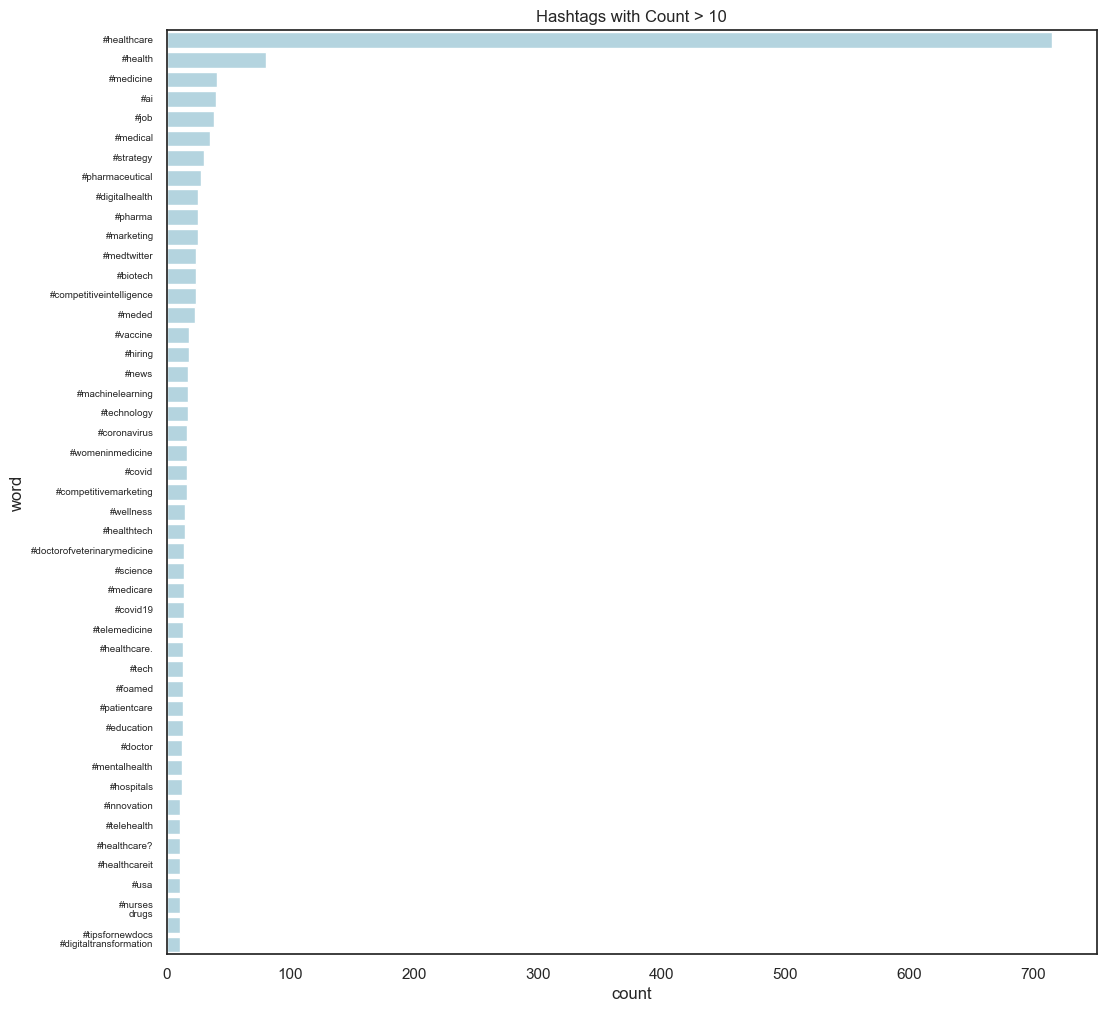

In [98]:
# Display records where the count is larger than 10.

#set plot attributes
plt.figure(figsize=(12, 12))
plot = sns.barplot(x='count', y='word', data=data[data['count'] > 10],  color = 'lightblue')

# Rotate y-axis labels for better readability, adjust spacing, and reduce font size
plot.set_yticklabels(plot.get_yticklabels(), rotation=0, ha='right', va='center', fontsize= 7,)
plt.yticks(range(len(data[data['count'] > 10]['word'])), data[data['count'] > 10]['word'])

#Complete plot title
plt.title('Hashtags with Count > 10')

plt.savefig('twitter.png')
#Complete chart arribute Display chart
plt.show()

## 6) Assignment activity 6
In the final module you will answer additional questions from the NHS as well as additional questions and observations you identified. Make sure to revisit previous sections that may provide useful insights to the questions posed in Module 6 where required.

### Investigate the main concerns posed by the NHS. 

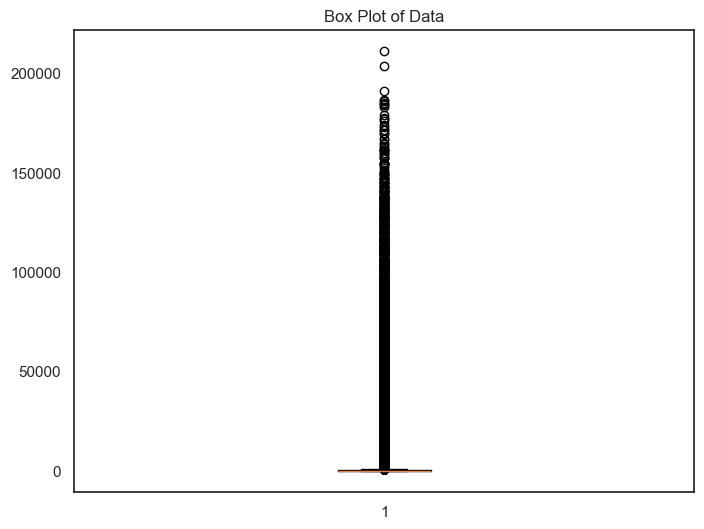

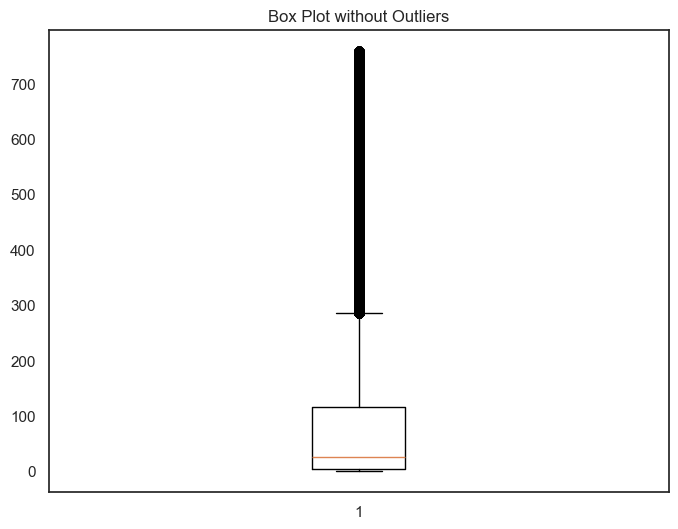

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,month,year
7,E54000034,2020-01-01,Attended,GP,Home Visit,1 Day,151,1,2020
8,E54000034,2020-01-01,Attended,GP,Home Visit,15 to 21 Days,12,1,2020
9,E54000034,2020-01-01,Attended,GP,Home Visit,2 to 7 Days,141,1,2020
10,E54000034,2020-01-01,Attended,GP,Home Visit,22 to 28 Days,4,1,2020
11,E54000034,2020-01-01,Attended,GP,Home Visit,8 to 14 Days,16,1,2020


<Figure size 1500x1200 with 0 Axes>

In [99]:
# Load the appointments_regional.csv file.

# Determining and removing outliers from the ar DataFrame using the box plot

# Visualizing the data using a box plot to identify potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(ar['count_of_appointments'])
plt.title('Box Plot of Data')
plt.show()

# Calculating the IQR (Interquartile Range)
Q1 = ar['count_of_appointments'].quantile(0.25)
Q3 = ar['count_of_appointments'].quantile(0.75)
IQR = Q3 - Q1

# Defining the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifing and removing outliers
outliers = ar[(ar['count_of_appointments'] < lower_bound) | (ar['count_of_appointments'] > upper_bound)]
ar_no_outliers = ar[(ar['count_of_appointments'] >= lower_bound) & (ar['count_of_appointments'] <= upper_bound)]

# Visualizing the data without outliers
plt.figure(figsize=(8, 6))
plt.boxplot(ar_no_outliers['count_of_appointments'])
plt.title('Box Plot without Outliers')
plt.show()

# Save 
plt.savefig('outliers.png')

# Viewing the DataFrame.
ar_no_outliers.head()

In [100]:
#Sense Check data
ar_no_outliers.describe()
print(ar_no_outliers.info())

<class 'pandas.core.frame.DataFrame'>
Index: 499473 entries, 7 to 596820
Data columns (total 9 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   icb_ons_code                       499473 non-null  object        
 1   appointment_month                  499473 non-null  datetime64[ns]
 2   appointment_status                 499473 non-null  object        
 3   hcp_type                           499473 non-null  object        
 4   appointment_mode                   499473 non-null  object        
 5   time_between_book_and_appointment  499473 non-null  object        
 6   count_of_appointments              499473 non-null  int64         
 7   month                              499473 non-null  int32         
 8   year                               499473 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(5)
memory usage: 34.3+ MB
None


In [101]:
# Print the min and max dates.

# Calculate the date range
date_range_start = ar_no_outliers['appointment_month'].min()
date_range_end = ar_no_outliers['appointment_month'].max()

# Display the date range
print(f"Date Range: {date_range_start} to {date_range_end}")

Date Range: 2020-01-01 00:00:00 to 2022-06-01 00:00:00


In [102]:
# Filter the data set to only look at data from 2021-08 onwards.
ar_2021_08_onwards = ar_no_outliers.loc[ar_no_outliers['appointment_month'] >= '2021-08-01'] 


# Get the data set end date
end_date = ar_2021_08_onwards.appointment_month.max()

# View 
print(f'The data end date is: {end_date}')
ar_2021_08_onwards.head()

The data end date is: 2022-06-01 00:00:00


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,month,year
3657,E54000034,2021-08-01,Attended,GP,Face-to-Face,More than 28 Days,445,8,2021
3659,E54000034,2021-08-01,Attended,GP,Face-to-Face,Unknown / Data Quality,15,8,2021
3660,E54000034,2021-08-01,Attended,GP,Home Visit,1 Day,169,8,2021
3661,E54000034,2021-08-01,Attended,GP,Home Visit,15 to 21 Days,3,8,2021
3662,E54000034,2021-08-01,Attended,GP,Home Visit,2 to 7 Days,178,8,2021


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [103]:
# Create an aggregated data set to review the different features.


# Aggregate 'appointment_date' by year
ar_yearly = ar_2021_08_onwards.groupby('year')['count_of_appointments'].sum().reset_index(name='yearly_count')

# Aggregate 'appointment_date' by month
ar_monthly = ar_2021_08_onwards.groupby('appointment_month')['count_of_appointments'].sum().reset_index(name='montly_count')

# Aggregate total appointment count
total_appointment_count = ar_monthly['montly_count'].sum()

# Aggregate 'appointment_status' by count of appointments
ar_appointment_status = (
    ar_2021_08_onwards.groupby('appointment_status')['count_of_appointments'].sum().reset_index(name='status_count')
)

# Aggregate 'hcp_type' by count of appointments
ar_hcp_type = ar_2021_08_onwards.groupby('hcp_type')['count_of_appointments'].sum().reset_index(name='type_count')

# Aggregate 'appointment_mode' by count of appointments
ar_appointment_mode = (
    ar_2021_08_onwards.groupby('appointment_mode')['count_of_appointments'].sum().reset_index(name='mode_count'))

# Aggregate 'time_between_book_and_appointment' by count of appointments
ar_time_between_book = ( 
    ar_2021_08_onwards.groupby('time_between_book_and_appointment')['count_of_appointments']
    .sum().reset_index(name='waiting_time_count')
)


# View the DataFrame.
print("Aggregated 'appointment_date' by year:")
print(ar_yearly.sort_values(by='yearly_count', ascending=False))

print("Aggregated 'appointment_date' by month:")
print(ar_monthly.sort_values(by='montly_count', ascending=False))

print(f'Total appointment bookings is: {total_appointment_count} ')

print("\nAggregated 'appointment_status' by uniqueness:")
print(ar_appointment_status.sort_values(by='status_count', ascending=False))

print("\nAggregated 'hcp_type' by uniqueness:")
print(ar_hcp_type.sort_values(by='type_count', ascending=False))

print("\nAggregated 'appointment_mode' by uniqueness:")
print(ar_appointment_mode.sort_values(by='mode_count', ascending=False))

print("\nAggregated 'time_between_book_and_appointment' by uniqueness:")
print(ar_time_between_book.sort_values(by='waiting_time_count', ascending=False))


Aggregated 'appointment_date' by year:
   year  yearly_count
1  2022       9981261
0  2021       8337606
Aggregated 'appointment_date' by month:
   appointment_month  montly_count
3         2021-11-01       1736169
2         2021-10-01       1706576
7         2022-03-01       1705603
4         2021-12-01       1684583
9         2022-05-01       1683480
10        2022-06-01       1679079
1         2021-09-01       1666516
5         2022-01-01       1655392
8         2022-04-01       1650127
6         2022-02-01       1607580
0         2021-08-01       1543762
Total appointment bookings is: 18318867 

Aggregated 'appointment_status' by uniqueness:
  appointment_status  status_count
0           Attended       6724710
2            Unknown       6501195
1                DNA       5092962

Aggregated 'hcp_type' by uniqueness:
               hcp_type  type_count
1  Other Practice staff     8311778
0                    GP     7360843
2               Unknown     2646246

Aggregated 'appointment

<h2 style=color:Green> Observation</h2>

> - Data considered Start from August 2021 to June 2022
> - The Data for the month of July is missing.
> - The total appointment booking record is 18,318,867
> - Peak appointment booking was recorded in November (1,736,169).
> - The lowest appointment booking was recorded in August (1,543,762).
> - Alomost 50% of the appointment booked were not attended
> - More appointments booked are to see other Practice staff
representing the higest HCP types.
> - Face to Face mode of appointment is most popular.
> - Telephone appointment ranks second indicating patients interest.
in technology for delivery of health services.
> - Most appoints are booked for Sameday & 1 Day combined
> - As the waiting time increases, less appoitments are book, 
indicating patients will rather have thier appointments as quickly as possible or the system is efficent. 

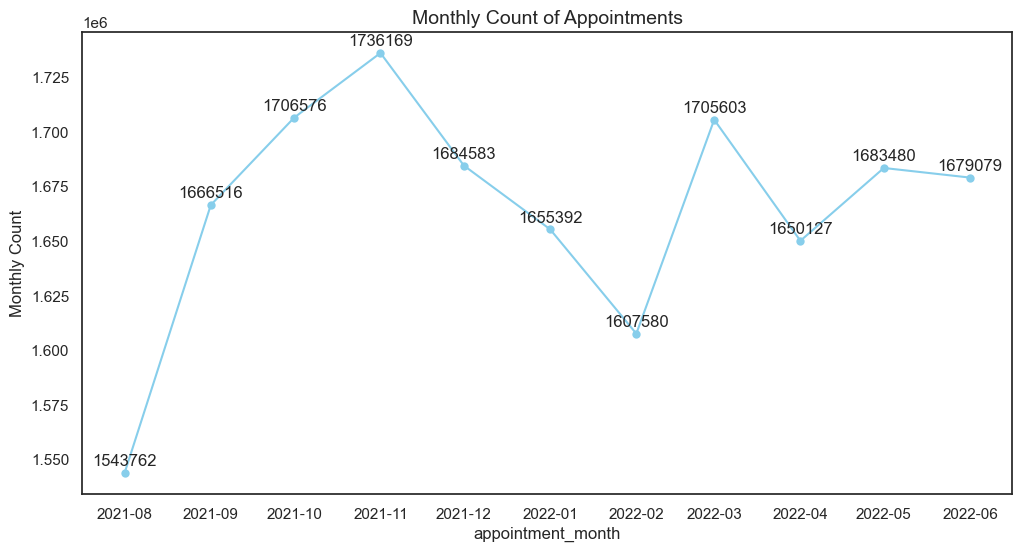

<Figure size 1500x1200 with 0 Axes>

In [104]:
# Plot the Monthly Count of Appointments trend

plt.figure(figsize=(12, 6))
plot = sns.lineplot(
    x= 'appointment_month', y='montly_count', data=ar_monthly, color='skyblue', marker='o', markeredgecolor='none'
)

# Annotate the count value at each point on the line
for i, txt in enumerate(ar_monthly['montly_count']):
    plot.annotate(txt, (ar_monthly['appointment_month'][i], ar_monthly['montly_count'][i]), 
                  textcoords="offset points", xytext=(0, 5), ha='center')

# Setting plot title and labels
plt.title('Monthly Count of Appointments', fontsize=14)
plt.xlabel('appointment_month', fontsize=12)
plt.ylabel('Monthly Count', fontsize=12)

# Show the plot
plt.show()

# Save
plt.savefig('monthly_count_of_appointments.png')

<h2 style=color:green>Observation</h2>

> - Appointment bookings show an upward trend from August to November.
> - However, there is a decline observed between November and February.
> - A subsequent increase is noted from February to March.
> - The trend continues to rise into April, followed by a plateau between May and June

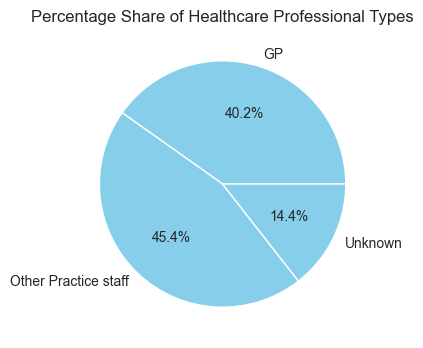

<Figure size 1500x1200 with 0 Axes>

In [105]:
# Plot the Percentage Share of Healthcare Professional Types

labels = ar_hcp_type['hcp_type']
sizes = ar_hcp_type['type_count']

# Plotting a pie chart with sky blue color
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue' for _ in sizes], textprops={'fontsize': 10})
plt.title('Percentage Share of Healthcare Professional Types', fontsize=12)

# Show the plot
plt.show()

# Save
plt.savefig('percentage_share_of_HCP.png')

<h2 style=color:green>Observation</h2>

> - other practice staff have approximately 5% bookings more than the GP.

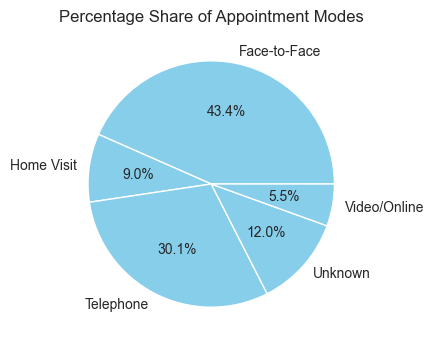

<Figure size 1500x1200 with 0 Axes>

In [106]:
# Plot the Percentage Share of Appointment Modes

labels = ar_appointment_mode['appointment_mode']
sizes = ar_appointment_mode['mode_count']

# Plotting a pie chart with sky blue color
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue' for _ in sizes], textprops={'fontsize': 10})
plt.title('Percentage Share of Appointment Modes', fontsize=12)

# Show the plot
plt.show()

# Save
plt.savefig('percentage_share_of_appointment_modes.png')

<h2 style=color:green>Observation</h2>

> - 43.4% of appointment booked are in the Face to face mode.
> - Telemedicine followed through bookings by telephone at 30.1%
> - However bookings were lowest in video/online appointment

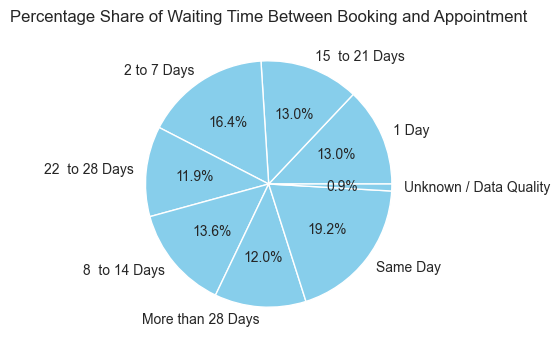

<Figure size 1500x1200 with 0 Axes>

In [107]:
# Plot the appointment_status by percentage

labels = ar_time_between_book['time_between_book_and_appointment']
sizes = ar_time_between_book['waiting_time_count']

# Plotting a pie chart with sky blue color
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue' for _ in sizes], textprops={'fontsize': 10})
plt.title('Percentage Share of Waiting Time Between Booking and Appointment', fontsize=12)

# Show the plot
plt.show()

# Save
plt.savefig('percentage_share_of_waiting_time.png')

<h2 style=color:green>Observation</h2>

> - Approximately one-third (32%) of patients can secure appointments on the same day or within 1 day.
> - About 16.4% of patients can expect to schedule appointments within the first week.
> - A majority, comprising 50.5% of patients, may experience wait times exceeding one week.

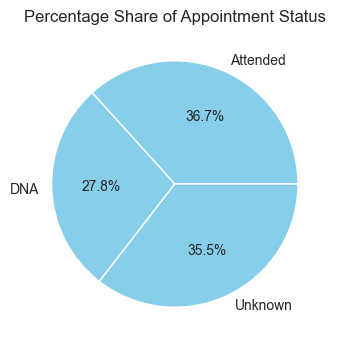

<Figure size 1500x1200 with 0 Axes>

In [108]:
# Plot the appointment_status by percentage
labels = ar_appointment_status['appointment_status']
sizes = ar_appointment_status['status_count']

# Plotting a pie chart with sky blue color
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue' for _ in sizes], textprops={'fontsize': 10})
plt.title('Percentage Share of Appointment Status', fontsize=12)

# Show the plot
plt.show()

# Save
plt.savefig('percentage_share_of_appointmen_status.png')

<h2 style=color:green>Observation</h2>

> - 36.7% of appointments were attended
> - 27.8% of appointments were not attended.
> - 35.5% of appointments status are unknown
> - The attendance rate of 36.7% suggests room for improvement in appointment attendance. 
Identifying and addressing the reasons for the unknown status could enhance data completeness 
and provide a more comprehensive understanding of appointment outcomes.

The stat DataFrame for hcp:                hcp_type  attended_appointments  type_count  \
2               Unknown                1704880     2646246   
0                    GP                2371235     7360843   
1  Other Practice staff                2648595     8311778   

   percentage_attendance  
2              64.426361  
0              32.214177  
1              31.865565  


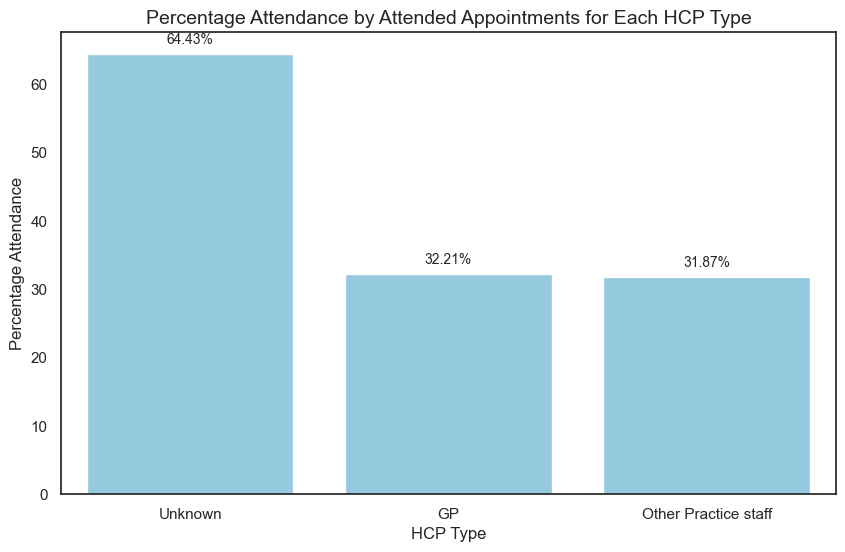

<Figure size 1500x1200 with 0 Axes>

In [109]:
# Filtering the DataFrame to include only 'Attended' appointments
attended_appointments_group = ar_2021_08_onwards[ar_2021_08_onwards['appointment_status'] == 'Attended']

# Aggregate atttended hcp
Attendance_by_hcp_type = (attended_appointments_group.groupby('hcp_type')['count_of_appointments']
                  .sum().reset_index(name='attended_appointments')
)

# Create a new dataframe for hcp
hcp_stat = pd.merge(Attendance_by_hcp_type, ar_hcp_type )


# Calculate percentage attendance
hcp_stat['percentage_attendance'] = (hcp_stat['attended_appointments'] / hcp_stat['type_count']) * 100

# Sort data in descending order
hcp_stat = hcp_stat.sort_values(by='percentage_attendance', ascending = False)

# Plotting a bar chart
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='hcp_type', y='percentage_attendance', data=hcp_stat, color='skyblue')

# Annotate each bar with its percentage value
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', xytext=(0, 10), 
                      textcoords='offset points', fontsize=10
                     )

# Setting plot title and labels
plt.title('Percentage Attendance by Attended Appointments for Each HCP Type', fontsize=14)
plt.xlabel('HCP Type', fontsize=12)
plt.ylabel('Percentage Attendance', fontsize=12)

#View DataFrame
print(f'The stat DataFrame for hcp: {hcp_stat}')

# Show the plot
plt.show()

# Save
plt.savefig('hcp_stat.png')

<h2 style=color:green>Observation</h2>

> - The unknown HCP type exhibits a relatively high percentage attendance at 64.43%, 
indicating a strong likelihood of patients attending appointments when the HCP type is unknown.
> - GPs and Other Practice Staff exhibit comparable percentage attendance, suggesting a 
commonality in attendance patterns.
> - Further exploration into the factors influencing attendance for GPs and Other Practice Staff 
may provide insights for targeted improvements in appointment attendance.
> - Data capture needs to be improved. A centralised database model should be adopted.

The stat DataFrame for Appointment Mode:   appointment_mode  attended_appointments  mode_count  percentage_attendance
4     Video/Online                 882765     1010152              87.389324
1       Home Visit                1181382     1644082              71.856635
3          Unknown                1353520     2194952              61.665130
2        Telephone                2053877     5519568              37.210829
0     Face-to-Face                1253166     7950113              15.762870


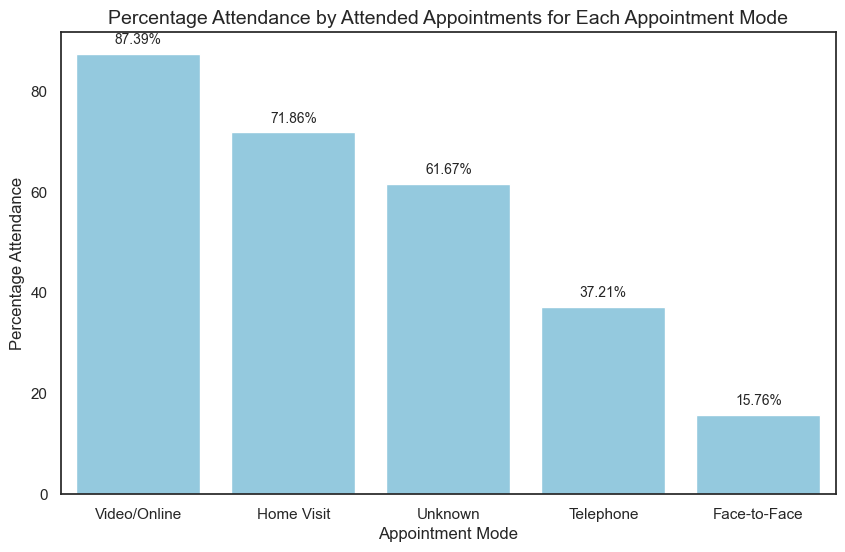

<Figure size 1500x1200 with 0 Axes>

In [110]:
# Aggregate atttended appointment_mode
Attendance_by_appointment_mode = (attended_appointments_group.groupby('appointment_mode')['count_of_appointments']
                  .sum().reset_index(name='attended_appointments')
)

# Create a new dataframe for appointment_mode
appointment_mode_stat = pd.merge(Attendance_by_appointment_mode, ar_appointment_mode )

#Calculate percentage attendance
appointment_mode_stat['percentage_attendance'] = (appointment_mode_stat['attended_appointments'] / 
                                                  appointment_mode_stat['mode_count']) * 100

# Sort data in descending order
appointment_mode_stat = appointment_mode_stat.sort_values(by='percentage_attendance', ascending = False)

# Plotting a bar chart
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    x='appointment_mode', y='percentage_attendance', data=appointment_mode_stat, color='skyblue'
                      )

# Annotate each bar with its percentage value
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Setting plot title and labels
plt.title('Percentage Attendance by Attended Appointments for Each Appointment Mode', fontsize=14)
plt.xlabel('Appointment Mode', fontsize=12)
plt.ylabel('Percentage Attendance', fontsize=12)

#View DataFrame
print(f'The stat DataFrame for Appointment Mode: {appointment_mode_stat}')

# Show the plot
plt.show()

# Save
plt.savefig('mode_stat.png')

<h2 style=color:green>Observation</h2>

> - Video/Online appointments demonstrate the highest percentage attendance at 87.39%, indicating a high likelihood of patients attending virtual or online appointments.
> - The unknown appointment mode exhibits a percentage attendance of 61.67%, indicating a relatively high likelihood of attendance even when the appointment mode is unknown.
> - Telephone appointments show a lower percentage attendance at 37.21%
> - Face-to-face appointments have the lowest percentage attendance

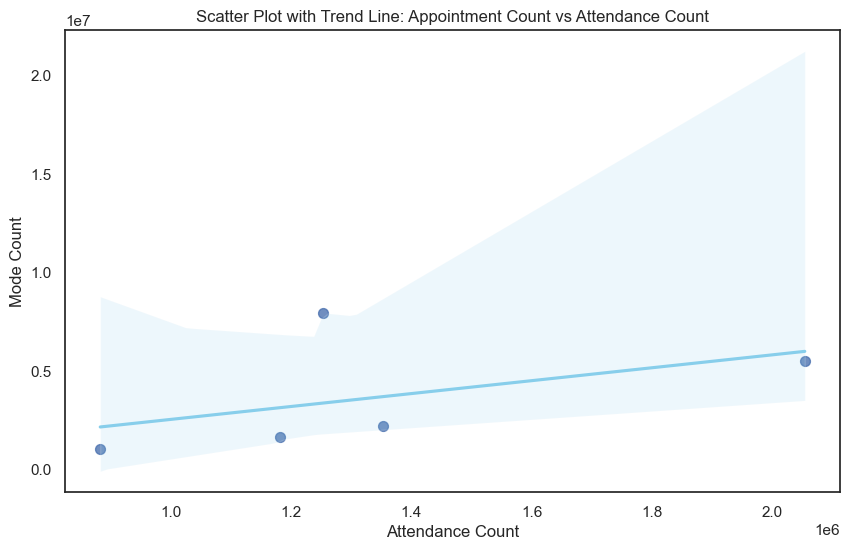

<Figure size 1500x1200 with 0 Axes>

In [111]:
# Determine the correlation between mode of attendend appointment and count of apoointment mode

#Create a new Dataframe for attendance_count and mode_count 
mode_appointment_attendance = pd.DataFrame({
    'attendance_count': appointment_mode_stat['attended_appointments'],
    'mode_count': ar_appointment_mode['mode_count']
})

# Scatter plot with trend line
plt.figure(figsize=(10, 6))
scatter_plot = sns.regplot(x='attendance_count', y='mode_count', data=mode_appointment_attendance, scatter_kws={'s': 50}, line_kws={'color': 'skyblue'})

# Set plot title and labels
plt.title('Scatter Plot with Trend Line: Appointment Count vs Attendance Count')
plt.xlabel('Attendance Count')
plt.ylabel('Mode Count')

# Show the plot
plt.show()

# Save
plt.savefig('modecount_attendance_corr.png')

<h2 style=color:green>Observation</h2>

> - A positive correlation exist between attendance count and mode count.
> - Attendance likely to increase if mode count increases.
> - Consideration should be given to increasing Video/online appointment bookings.

The stat DataFrame for Wating Time:   time_between_book_and_appointment  attended_appointments  \
7            Unknown / Data Quality                 123587   
5                 More than 28 Days                1004670   
3                    22  to 28 Days                 969161   
0                             1 Day                 961152   
1                    15  to 21 Days                 898093   
6                          Same Day                1140944   
2                       2 to 7 Days                 894225   
4                     8  to 14 Days                 732878   

   waiting_time_count  percentage_attendance  
7              166388              74.276390  
5             2198097              45.706354  
3             2170878              44.643734  
0             2374211              40.483007  
1             2388499              37.600727  
6             3517031              32.440544  
2             3007855              29.729658  
4             2495908        

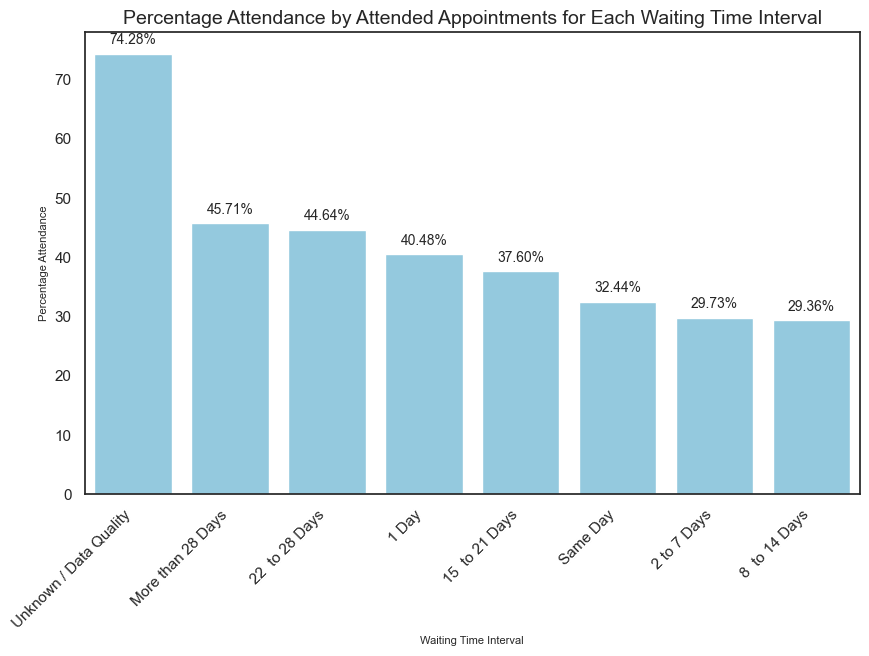

<Figure size 1500x1200 with 0 Axes>

In [112]:
# Aggregate atttended time_between_book_and_appointment
Attendance_by_waiting_time = (
    attended_appointments_group.groupby('time_between_book_and_appointment')['count_of_appointments']
                  .sum().reset_index(name='attended_appointments')
)

# Create a new dataframe for 'time_between_book_and_appointment
Waiting_time_stat = pd.merge(Attendance_by_waiting_time, ar_time_between_book )


# Calculate percentage attendance
Waiting_time_stat['percentage_attendance'] = (Waiting_time_stat['attended_appointments'] / 
                                              Waiting_time_stat['waiting_time_count']) * 100

# Sort data in descending order
Waiting_time_stat = Waiting_time_stat.sort_values(by='percentage_attendance', ascending = False)

# Plotting a bar chart
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    x='time_between_book_and_appointment', y='percentage_attendance', data=Waiting_time_stat, color='skyblue'
)

# Annotate each bar with its percentage value
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', xytext=(0, 10), 
                      textcoords='offset points', fontsize=10
                     )

# Setting plot title and labels
plt.title('Percentage Attendance by Attended Appointments for Each Waiting Time Interval', fontsize=14)
plt.xlabel('Waiting Time Interval', fontsize=8)
plt.ylabel('Percentage Attendance', fontsize=8)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

#View DataFrame
print(f'The stat DataFrame for Wating Time: {Waiting_time_stat}')

# Show the plot
plt.show()

# Save
plt.savefig('waiting_stat.png')

<h2 style=color:green>Observation</h2>

> - The category with unknown/data quality information exhibits a high percentage attendance at 74.28%. This could indicate that even with uncertain data quality, a significant portion of patients attends appointments.
> - There is a general trend of decreasing attendance as waiting times reduces, with the highest attendance observed for the category with unknown or data quality information.

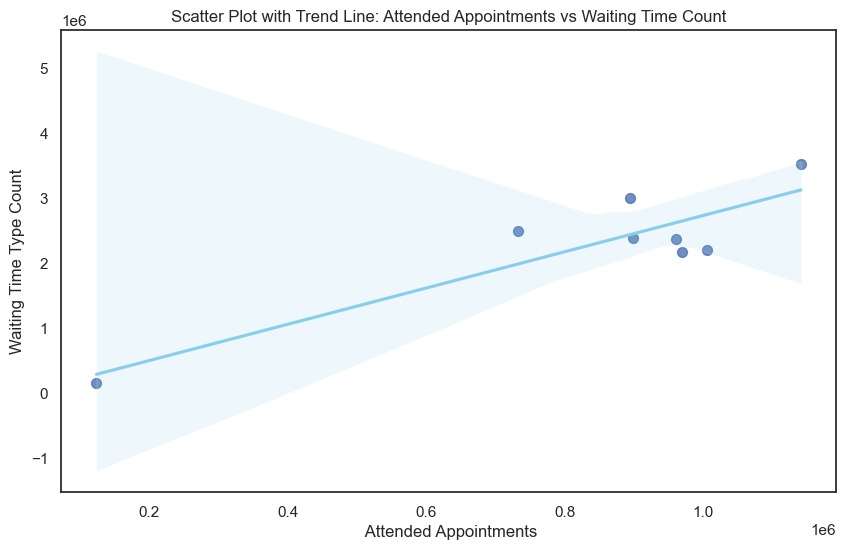

<Figure size 1500x1200 with 0 Axes>

In [113]:
# Scatter plot with trend line
plt.figure(figsize=(10, 6))
scatter_plot = sns.regplot(x='attended_appointments', y='waiting_time_count', data=Waiting_time_stat, scatter_kws={'s': 50}, line_kws={'color': 'skyblue'})

# Set plot title and labels
plt.title('Scatter Plot with Trend Line: Attended Appointments vs Waiting Time Count')
plt.xlabel(' Attended Appointments')
plt.ylabel('Waiting Time Type Count')

# Show the plot
plt.show()

# Save
plt.savefig('waitingcount_attendance_corr.png')

<h2 style=color:green>Observation</h2>

> - There is a positve corellation between waiting time type count and attended appointment
> - Previous evidence indicate the appointments with longer waiting periods had more attendance.
> - Patience with less urgent care should be moved to the longer waiting list. 

In [114]:
# Determine the total number of appointments per month.
monthly_appointments = (
    ar_2021_08_onwards.groupby('appointment_month')['count_of_appointments']
    .sum().reset_index(name='monthly_aggregate')
)

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
monthly_appointments['daily_aggregate'] = round(monthly_appointments['monthly_aggregate'] / 30)

# View the DataFrame.
monthly_appointments

,appointment_month,monthly_aggregate,daily_aggregate
0,2021-08-01,1543762,51459.0
1,2021-09-01,1666516,55551.0
2,2021-10-01,1706576,56886.0
3,2021-11-01,1736169,57872.0
4,2021-12-01,1684583,56153.0
5,2022-01-01,1655392,55180.0
6,2022-02-01,1607580,53586.0
7,2022-03-01,1705603,56853.0
8,2022-04-01,1650127,55004.0
9,2022-05-01,1683480,56116.0


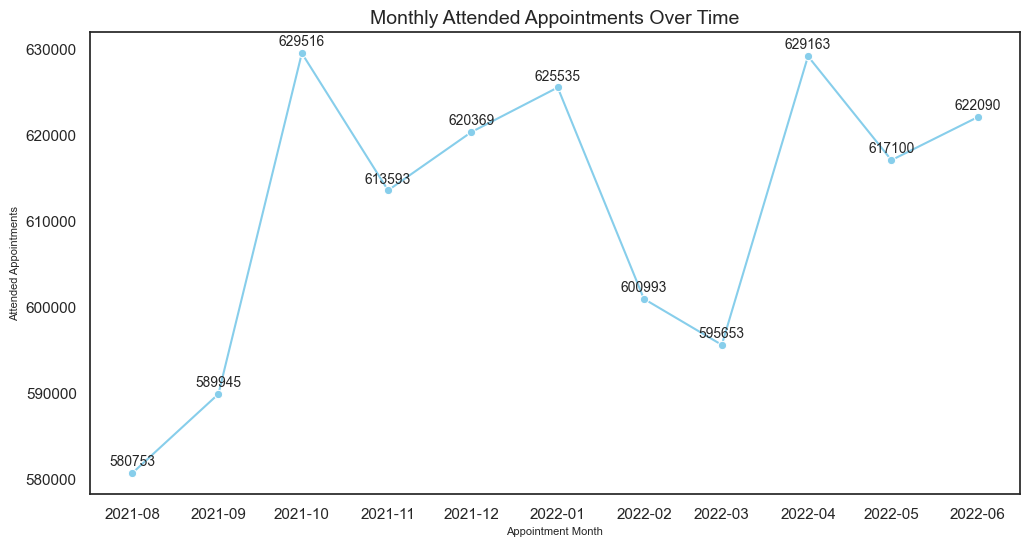

In [115]:
# Plot sum of count of monthly visits.
# Determining the sum of count of monthly visit
# Filtering the DataFrame to include only 'Attended' appointments
attended_visits = ar_2021_08_onwards[ar_2021_08_onwards['appointment_status'] == 'Attended']

# Aggregate the visits by month
monthly_visits = (attended_visits.groupby('appointment_month')['count_of_appointments']
                  .sum().reset_index(name='attended_appointments')
)

# Plotting a line plot
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(x='appointment_month', y='attended_appointments', 
                         data=monthly_visits, color='skyblue', marker='o')

# Annotate each point on the line with its value
for i, txt in enumerate(monthly_visits['attended_appointments']):
    line_plot.annotate(txt, (monthly_visits['appointment_month'][i], monthly_visits['attended_appointments'][i]), 
                       textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)

# Setting plot title and labels
plt.title('Monthly Attended Appointments Over Time', fontsize=14)
plt.xlabel('Appointment Month', fontsize=8)
plt.ylabel('Attended Appointments', fontsize=8)


#save 
plt.savefig('monthly_attendance.png')

# Show the plot
plt.show()

<h2 style=color:green>Observation</h2>

> - The monthly aggregate of appointments shows a general trend of fluctuation. The counts vary across months but do not exhibit a consistent upward or downward trend.
> - There may be a seasonal pattern in the data, with certain months experiencing higher or lower appointment counts. This could be influenced by factors such as holidays, seasons, or other external events.
> - To better understand the trends, it would be useful to consider external factors such as public holidays, special events, or any organizational changes that might impact appointment scheduling and attendance.

> - Attendance is seem low in the summer.

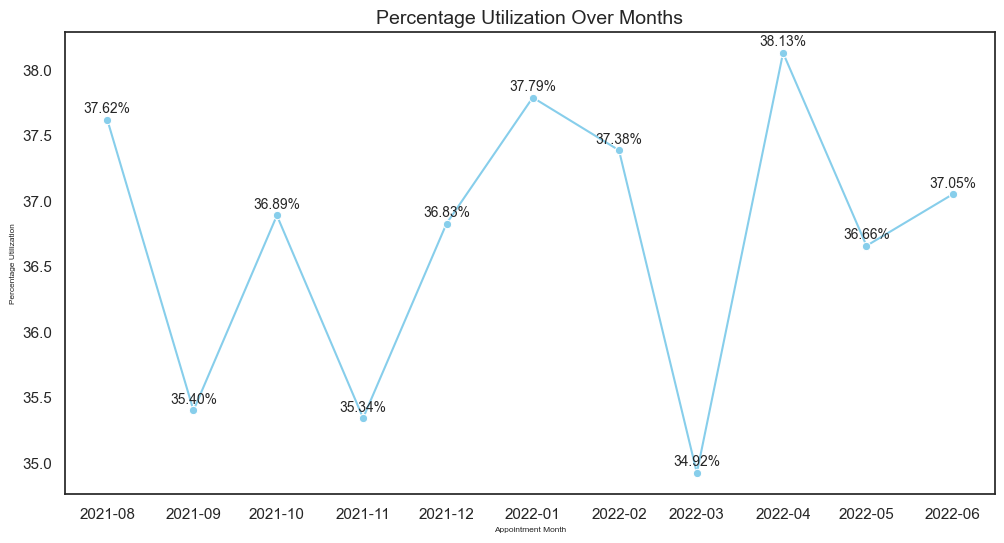

In [116]:
# Plot monthly capacity utilisation.

# Create a new dataframe for monthly attendance stats
monthly_attendance_stat = pd.merge(monthly_visits, ar_monthly)

# Calculate percentage utilization
monthly_attendance_stat['percentage_utilization'] = (monthly_attendance_stat['attended_appointments'] / 
                                                     monthly_attendance_stat['montly_count']) * 100

# Plotting a line chart
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(
    x='appointment_month', 
    y='percentage_utilization', 
    data=monthly_attendance_stat, 
    color='skyblue', marker='o'
)

# Annotate each point on the line with its percentage value
for i, txt in enumerate(monthly_attendance_stat['percentage_utilization']):
    line_plot.annotate(f'{txt:.2f}%', 
                       (monthly_attendance_stat['appointment_month'][i], 
                        monthly_attendance_stat['percentage_utilization'][i]), 
                       textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10
                      )

# Setting plot title and labels
plt.title('Percentage Utilization Over Months', fontsize=14)
plt.xlabel('Appointment Month', fontsize=6)
plt.ylabel('Percentage Utilization', fontsize=6)

#save 
plt.savefig('monthly_utilization_stat.png')

# Show the plot
plt.show()

<h2 style=color:green>Observation</h2>

> - Capacity utilization is below 40%

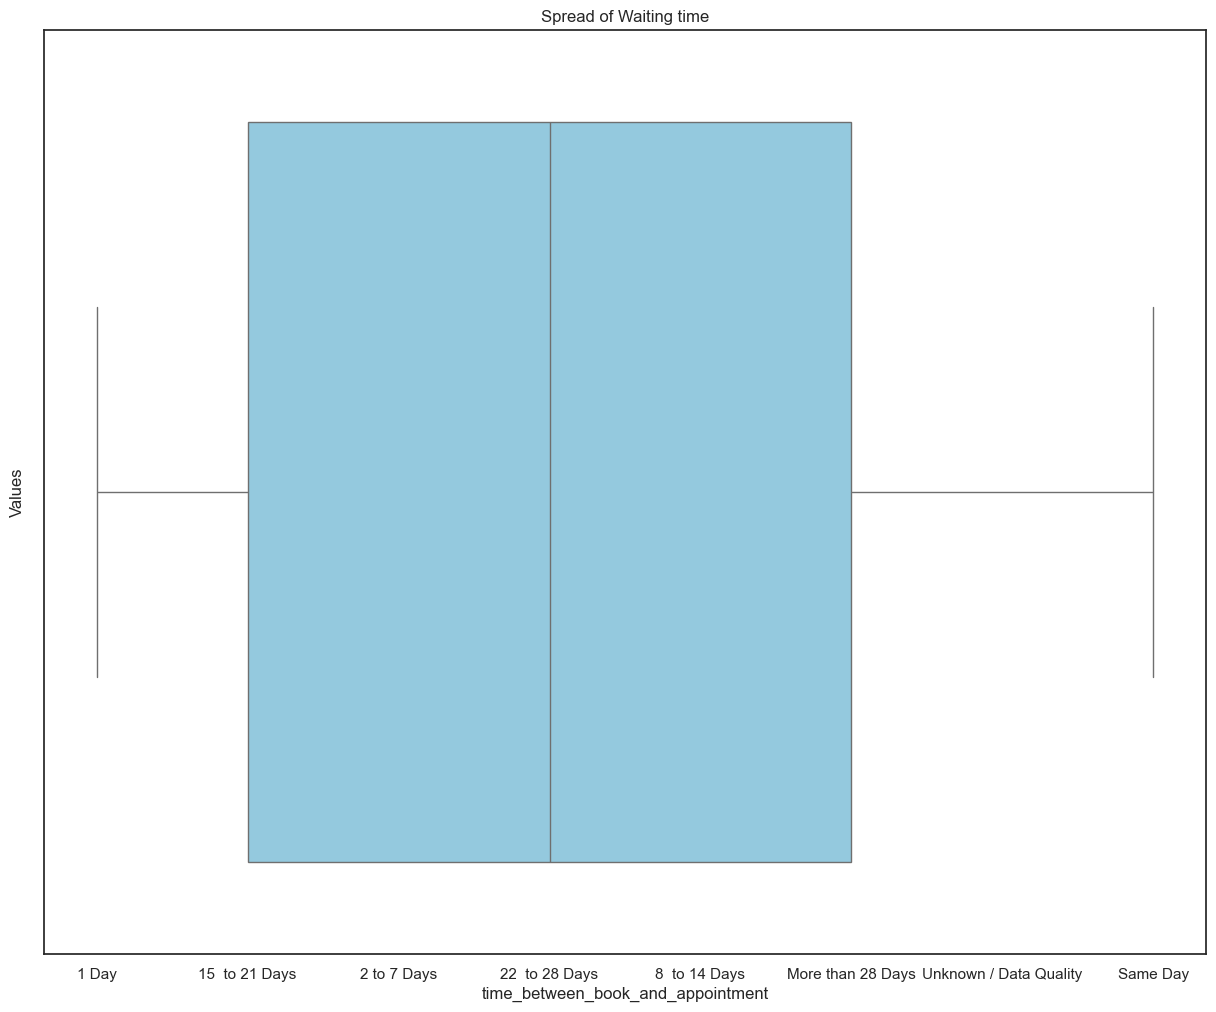

In [117]:
# Create a boxplot to investigate the spread of time_between_book_and_appointment.
sns.boxplot(x='time_between_book_and_appointment', data=ar_no_outliers, color='skyblue')

# Set plot title and labels
plt.title('Spread of Waiting time')
plt.xlabel('time_between_book_and_appointment')
plt.ylabel('Values')

#save
plt.savefig('waiting_spread.png')

# Show the plot
plt.show()

<h2 style=color:green>Observation</h2>

> - One day and same day waiting time are within the upper and lower bound limit.
> - Core of our data indicator exist between appointment bookings over 1 day.

**Question 2:** How do the healthcare professional types differ over time?

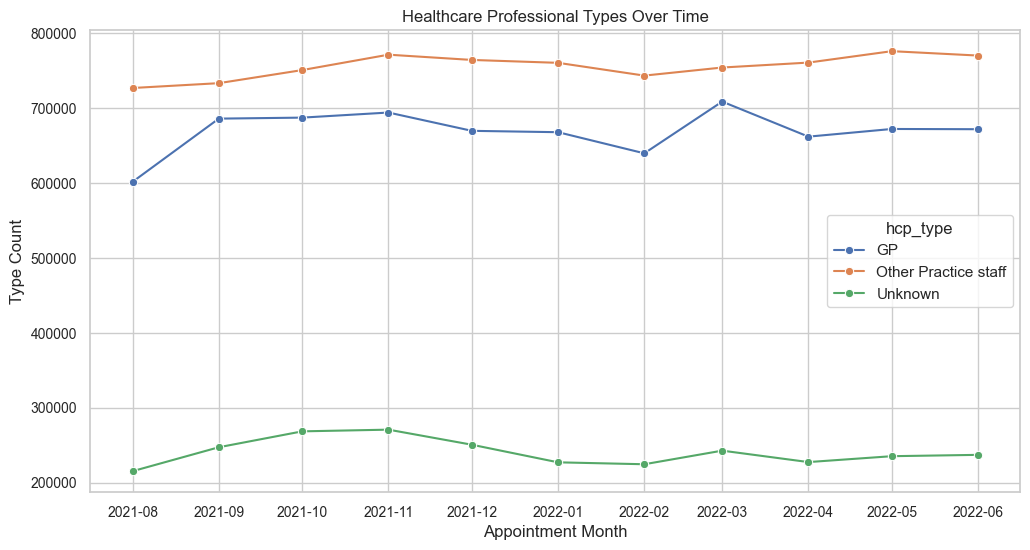

In [118]:

# Grouping by 'appointment_month' and 'hcp_type' and calculating the count
hcp_type_counts = ar_2021_08_onwards.groupby(
    ['appointment_month', 'hcp_type'])['count_of_appointments'].sum().reset_index(name='type_count')

# Setting Seaborn style to white background
sns.set_style("whitegrid")

# Setting plot parameters
plt.figure(figsize=(12, 6))
sns.lineplot(x='appointment_month', y='type_count', hue='hcp_type', data=hcp_type_counts, marker='o')

# Setting plot title and labels
plt.title('Healthcare Professional Types Over Time')
plt.xlabel('Appointment Month')
plt.ylabel('Type Count')

# Reduce the font size of x-axis and y-axis ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Save
plt.savefig('professinal.png')

# Showing the plot
plt.show()

<h2 style=color:green>Observation</h2>

> - Despite the higest count of appointments recorded within the Other Practice Staff health care practice, the practise count has remian relatively stable
> - More variation is recorded within the GP practice type. This is likely due to the low attendance rate recorded. 
> - The Unknown HCP type count is low.

**Question 3:** Are there significant changes in whether or not visits are attended?

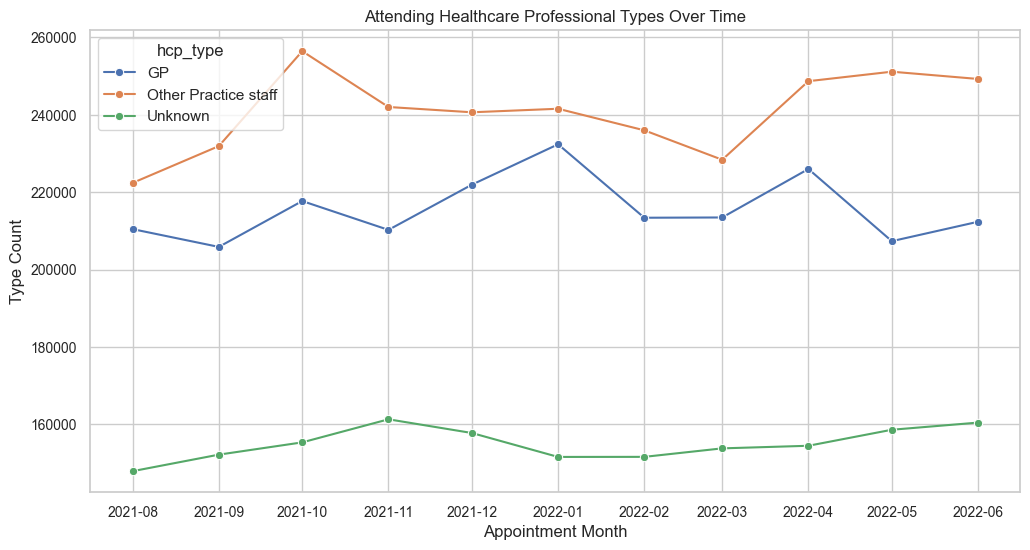

In [119]:
# Create a lineplot to answer the question.

attended_hcp_type_counts = ar_2021_08_onwards[ar_2021_08_onwards['appointment_status'] == 'Attended'].groupby(
    ['appointment_month', 'appointment_status','hcp_type']
)['count_of_appointments'].sum().reset_index(name='type_count')

# Setting Seaborn style to white background
sns.set_style("whitegrid")

# Setting plot parameters
plt.figure(figsize=(12, 6))
sns.lineplot(x='appointment_month', y='type_count', hue='hcp_type', data=attended_hcp_type_counts, marker='o')

# Setting plot title and labels
plt.title('Attending Healthcare Professional Types Over Time')
plt.xlabel('Appointment Month')
plt.ylabel('Type Count')

# Reduce the font size of x-axis and y-axis ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Save
plt.savefig('attending_professinal.png')

# Showing the plot
plt.show()


<h2 style=color:green>Observation</h2>

> - The Healtcare practices trend is affected by appointment attendance.

**Question 4:** Are there changes in terms of appointment type and the busiest months?

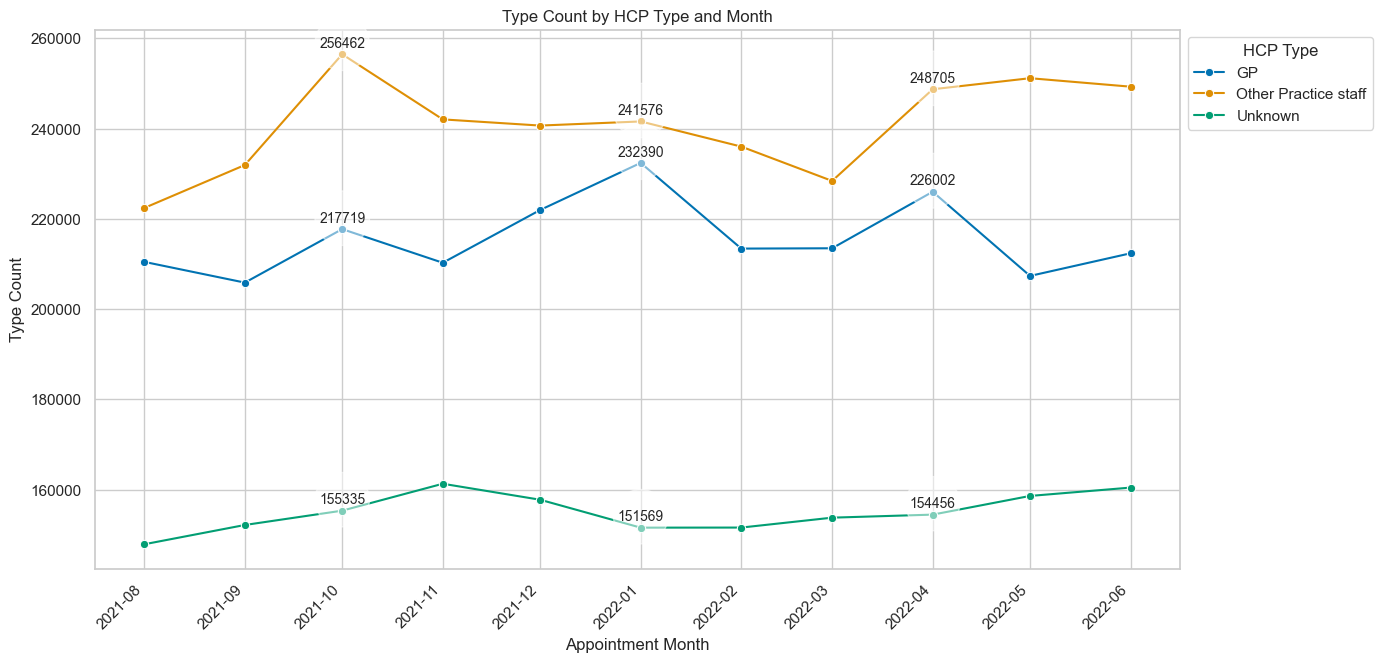

In [120]:
# Annotating busiest months based on attended appointments.

# Convert 'appointment_month' to datetime
attended_hcp_type_counts['appointment_month'] = pd.to_datetime(attended_hcp_type_counts['appointment_month'])

# Set Seaborn style to white background
sns.set_style("whitegrid")

# Create a line plot
plt.figure(figsize=(14, 7))
line_plot = sns.lineplot(x='appointment_month', y='type_count', data=attended_hcp_type_counts, hue='hcp_type', marker='o', palette='colorblind')

# Annotate specific points on the line plot
points_to_annotate = ['2021-10', '2022-01', '2022-04']
for point in points_to_annotate:
    subset = attended_hcp_type_counts[attended_hcp_type_counts['appointment_month'].dt.strftime('%Y-%m') == point]
    for _, row in subset.iterrows():
        x_value = row['appointment_month']
        y_value = row['type_count']
        line_plot.annotate(f"{y_value}", (x_value, y_value), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10,
                           bbox=dict(boxstyle='circle', alpha=0.5, fc='white'))

# Set plot title and labels
plt.title('Type Count by HCP Type and Month')
plt.xlabel('Appointment Month')
plt.ylabel('Type Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='HCP Type', loc='upper left', bbox_to_anchor=(1, 1))

# Save
plt.savefig('busy_months_attending_professinal.png')

# Show the plot
plt.show()

<h2 style=color:green>Observation</h2>

> - The busiest months are September - October,  December_ January and March-April based on number of attended appointment
> - Within the busy months, the number of GP and the Un-known HCP type rose.
> - While the Other practice staff type not only recorded a high number within the busiest months, the number was also high from April to June

**Question 5:** Are there any trends in time between booking an appointment?

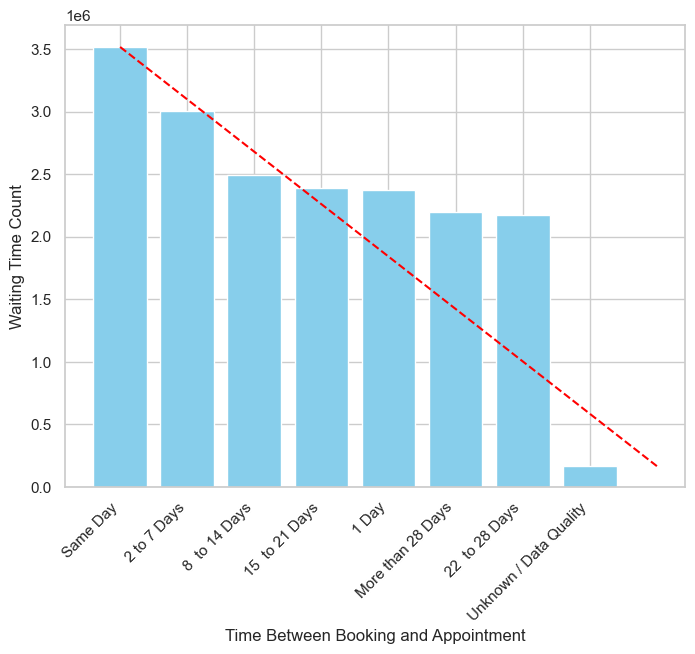

In [121]:
# Create an empty plot and set plot size.
fig, ax = plt.subplots(figsize=(8, 6))

# Sort the DataFrame
ar_time_between_book = ar_time_between_book.sort_values(by='waiting_time_count', ascending=False)

# Create a barplot.
bars = ax.bar(ar_time_between_book['time_between_book_and_appointment'], 
              ar_time_between_book['waiting_time_count'], color='skyblue')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ar_time_between_book['time_between_book_and_appointment'], rotation=45, ha='right')

# Label the axes
ax.set_xlabel('Time Between Booking and Appointment')
ax.set_ylabel('Waiting Time Count')

# Include a trend line (for example, a line connecting the first and last points)
trend_line = plt.Line2D([0, len(ar_time_between_book)], 
                       [ar_time_between_book['waiting_time_count'].iloc[0], 
                        ar_time_between_book['waiting_time_count'].iloc[-1]], 
                       color='red', linestyle='dashed')
ax.add_line(trend_line)

# Save the plot
plt.savefig('time_between_book_and_appointment.png')

# Display the plot
plt.show()

<h2 style=color:green>Observation</h2>
    
> - There an indication that as the waiting time increase the appointments reduces, indicating an effort by NHS to schedule more same day appointment.
> - Both Sameday and 1 day are on the upper and lower bound of the data set.

**Question 6:** How does the spread of service settings compare?

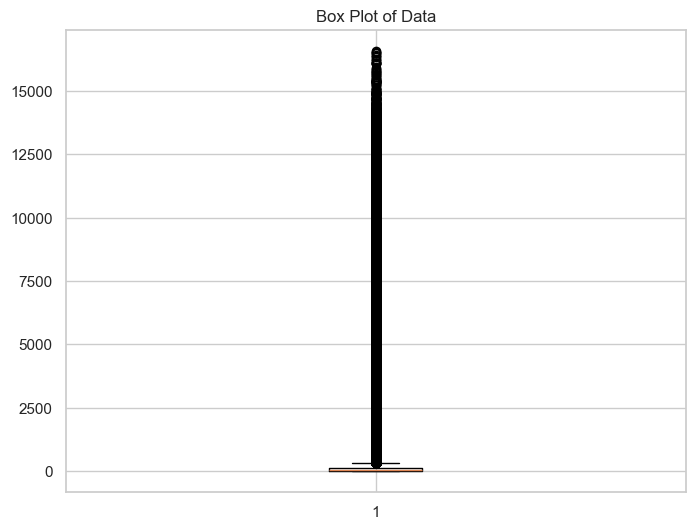

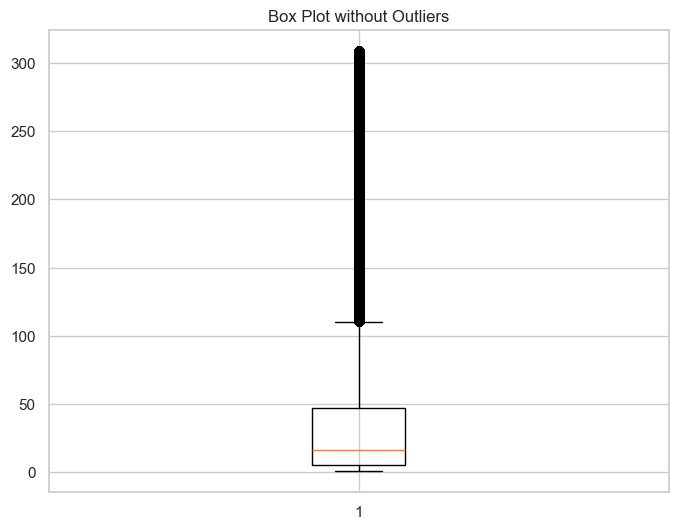

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month,month,year
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08-01,8,2021
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08-01,8,2021
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08-01,8,2021
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08-01,8,2021
5,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Care Home Visit,11,2021-08-01,8,2021


In [122]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.

# Determining and removing outliers from the ar DataFrame using a chart

# Visualizing the data using a box plot to identify potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(nc['count_of_appointments'])
plt.title('Box Plot of Data')
plt.show()

# Calculating the IQR (Interquartile Range)
Q1 = nc['count_of_appointments'].quantile(0.25)
Q3 = nc['count_of_appointments'].quantile(0.75)
IQR = Q3 - Q1

# Defining the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifing and removing outliers
outliers = nc[(nc['count_of_appointments'] < lower_bound) | (ar['count_of_appointments'] > upper_bound)]
nc_no_outliers = nc[(nc['count_of_appointments'] >= lower_bound) & (nc['count_of_appointments'] <= upper_bound)]

# Visualizing the data without outliers
plt.figure(figsize=(8, 6))
plt.boxplot(nc_no_outliers['count_of_appointments'])
plt.title('Box Plot without Outliers')
plt.show()


# Viewing the DataFrame.
nc_no_outliers.head()

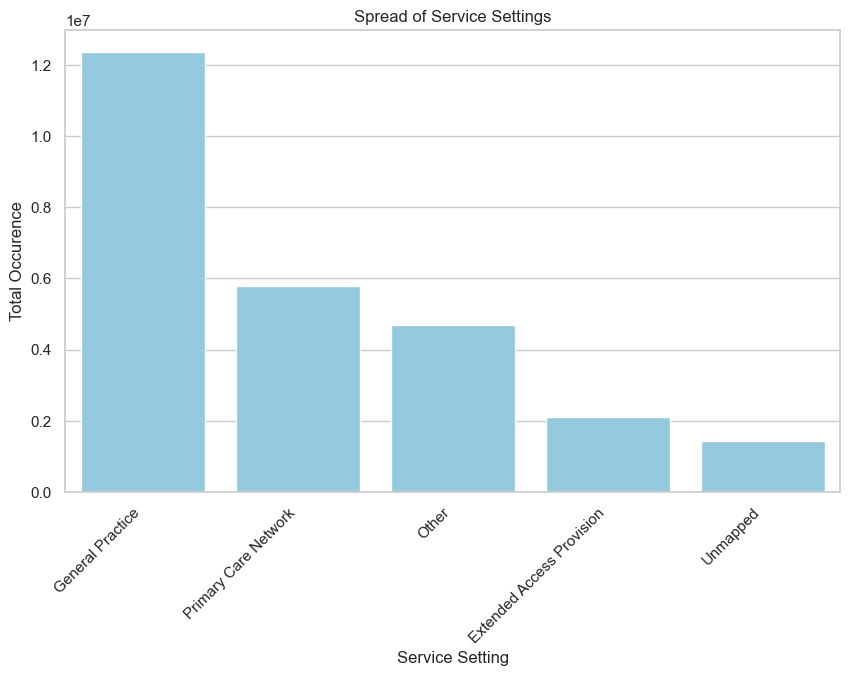

In [123]:
# We can use Seaborn's countplot to visualize the spread of service settings

# Define Dataset
service_setting_spread = (
    nc_no_outliers.groupby('service_setting')['count_of_appointments'].sum().reset_index(name='total_occurence')
)

#Sorting the data descending
service_setting_spread = service_setting_spread.sort_values(by = 'total_occurence', ascending =False)

# Assuming you have a DataFrame named 'df' with the given columns
plt.figure(figsize=(10, 6))

# Create a barplot to visualize the spread of service settings based on the count of appointments
sns.barplot(x='service_setting', y='total_occurence', data=service_setting_spread, color='skyblue')

plt.title('Spread of Service Settings')
plt.xlabel('Service Setting')
plt.ylabel('Total Occurence')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save
plt.savefig('spread_of_service_ettings.png')

plt.show()

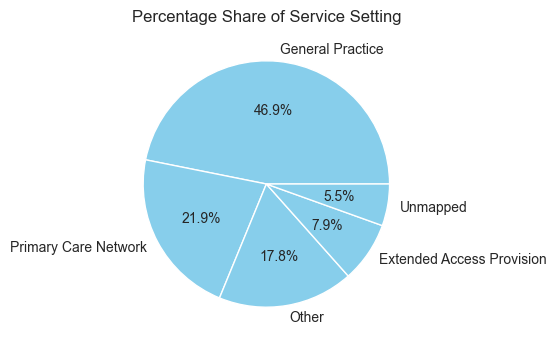

<Figure size 1500x1200 with 0 Axes>

In [124]:

# Plot the service_setting by percentage
labels = service_setting_spread['service_setting']
sizes = service_setting_spread['total_occurence']

# Plotting a pie chart with sky blue color
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue' for _ in sizes], textprops={'fontsize': 10})
plt.title('Percentage Share of Service Setting', fontsize=12)

# Show the plot
plt.show()

# Save
plt.savefig('percentage_share_of_service_setting.png')

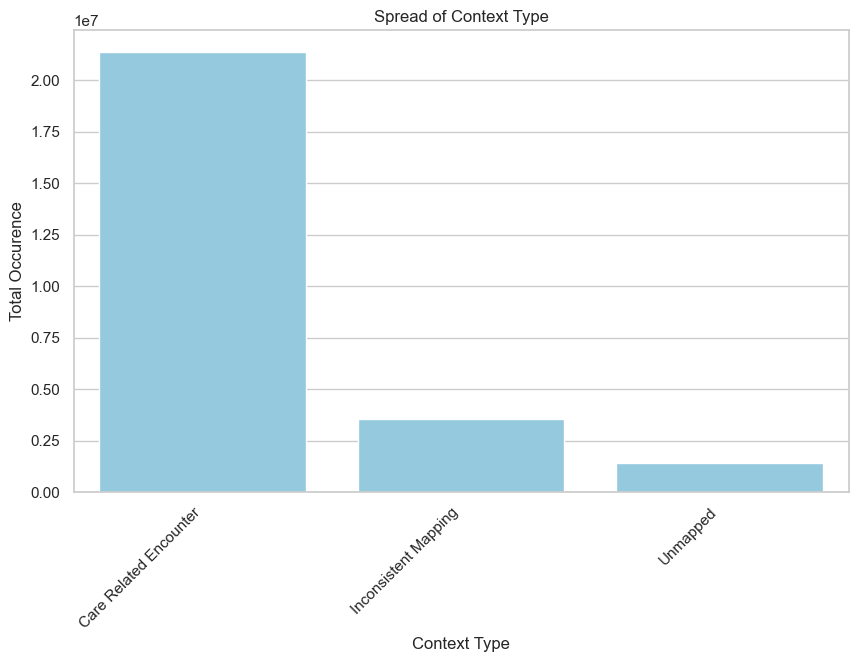

In [125]:
# We can use Seaborn's countplot to visualize the spread of Context Type

# Define Dataset
context_type_spread = (
    nc_no_outliers.groupby('context_type')['count_of_appointments'].sum().reset_index(name='total_occurence')
)

#Sorting the data descending
context_type_spread = context_type_spread.sort_values(by = 'total_occurence', ascending =False)

# Set plot parameters
plt.figure(figsize=(10, 6))

# Create a barplot to visualize the spread of service settings based on the count of appointments
sns.barplot(x='context_type', y='total_occurence', data=context_type_spread, color='skyblue')

plt.title('Spread of Context Type')
plt.xlabel('Context Type')
plt.ylabel('Total Occurence')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save
plt.savefig('spread_of_context_type.png')

plt.show()

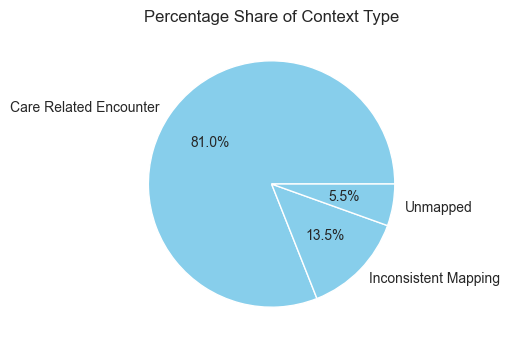

<Figure size 1500x1200 with 0 Axes>

In [126]:
# Plot the context_type by percentage
labels = context_type_spread['context_type']
sizes = context_type_spread['total_occurence']

# Plotting a pie chart with sky blue color
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue' for _ in sizes], textprops={'fontsize': 10})
plt.title('Percentage Share of Context Type', fontsize=12)

# Show the plot
plt.show()

# Save
plt.savefig('percentage_share_of_context_type.png')

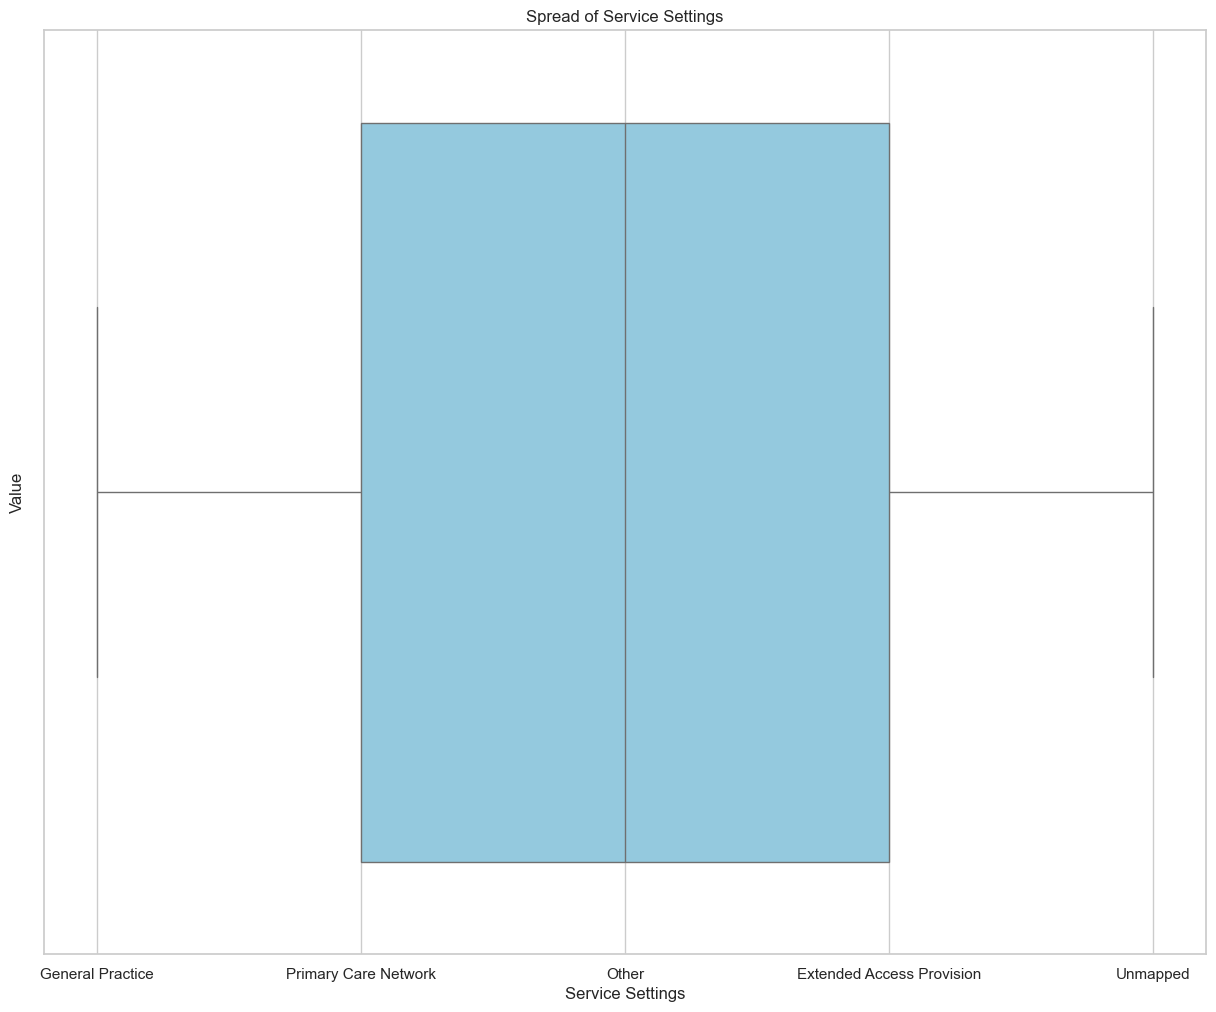

In [127]:
# Create a boxplot to investigate the spread of service settings.
sns.boxplot(x='service_setting', data=service_setting_spread, color='skyblue')

# Set plot title and labels
plt.title('Spread of Service Settings')
plt.xlabel('Service Settings')
plt.ylabel('Value')

#Save
plt.savefig('spread_of_service_settings.png')
# Show the plot
plt.show()

<h2 Style=color:green>Observation</h2>

> - Primary Care Network, other and extended Access Provision number fall between the interquartile range 
> - General Practice and Ummapped Fall within the upper and lower limits.

### Provide a summary of your findings and recommendations based on the analysis.

<h2 style=color:green>Summary</h2>

<h3>Total Appointment Booking:</h3>

> - Total appointment booking records: 18,318,867.
> - Peak booking in November, lowest in August.
> - Approximately 50% of appointments are schedule to happen after 24hrs showing inadequacy in staffing

<h3>Appointment Attendance:</h3>

> - Approx 50% of appointments booked were not attended.
> - Face-to-face appointments have the lowest attendance at 15.67%.
> - Video/online appointments had a high attendance rate of 87.3%.

<h3>Waiting Time:</h3>

> - As waiting time increases, fewer appointments were booked.
> - There is a positive correlation between waiting time and attended appointments.

<h3>Monthly Trends:</h3>

> - Fluctuating monthly aggregate with no consistent upward or downward trend.
> - Busiest months: September-October, December-January, and March-April based on attended appointments.

<h3>Health Care Professional (HCP) Types:</h3>

> - Other Practise staff has the highest HCP type count.
> - Unknown HCP type count is low.
> - GP and Other Practise Staff show more variation.

<h3>Appointment Modes:</h3>

> - Face-to-face mode is the most popular, followed by telephone.
> - Video/online mode has the lowest booking count.

<h3>Service Settings:</h3>

> - Primary Care Network, Other, and Extended Access Provision fall between the interquartile range.
> - General Practice and Unmapped fall within the upper and lower limits.

<h3>Utilization:</h3>

> - Capacity utilization is below 40%.
> - One day and same day waiting times are within upper and lower bounds.

<h3> Twitter Analysis</h3>

> - A total of 1174 entries were analyzed.
> - 167 entries lacked hashtag information in the tweet entities.
> - 526 tweets did not have recorded retweet counts.
> - Notable retweet counts include 3 tweets with 207 retweets, 12 tweets with 208 retweets, and 1 tweet with 303 retweets.
> - 1027 tweets did not have recorded favorite counts.
> - Individual tweets garnered varied favorite counts, with one tweet receiving 42 favorites, another with 28 favorites, and one more with 20 favorites.
> - The most popular retweets were health-related content presented by a comedic healthcare influencer, particularly focusing on health insurance.
> - Topics emphasizing efficiency in the health industry ranked first in popularity.
> - Twitter users expressed a strong interest in healthcare powered by data.
> - Drug-related discussions, specifically those addressing cholesterol reduction, garnered significant attention.
> - Prominent topics included Applications, AI, healthcare, digital health, Healthtech, Health, DataScience, and Bigdata.
> - Healthcare, AI, and digital health emerged as the most popular tags.
> - Top mentions were associated with Strategy & Competitive Marketing, Digital & Social Pharma, Life Sciences Investment, Cell & Gene Therapy, Vaccines, Biomedical Science, and comedy.
> - Among categories, healthcare received the highest count of tags, followed by health and medicine.

<h2 style=color:green>Recommendation</h2>

<h3>Appointment Attendance Improvement:</h3>

> - Investigate reasons for low attendance in face-to-face appointments.
> - Analyse and replicate factors contributing to high attendance in video/online appointments.

<h3>Waiting Time Management:</h3>

> - NHS should increase resources to reduce waiting time
> - Optimize the scheduling system to reduce waiting times.
> - Consider providing more same-day and one-day appointments to meet patient demand.

<h3>Monthly Trends Analysis:</h3>

> - Understand factors contributing to fluctuations in monthly aggregate.
> - Identify strategies to balance appointment counts across months.

<h3>HCP Type Variation:</h3>

> - Ensure resource allocation aligns with demand for different HCP types.

<h3>Service Setting Optimization:</h3>

> - Align capacity with demand for General Practice.

<h3>Capacity Utilization:</h3>

> - Evaluate reasons for low capacity utilization and make adjustments as needed.
> - Consider redistributing resources based on demand patterns.

<h3>Data Quality:</h3>

> -Address issues related to unknown or data quality information affecting attendance.
> - Improve data collection and reporting mechanisms.
> - Consider standardisation of the Datsbase across NHS

<h3>Seasonal Adjustments:</h3>

> - Consider seasonal adjustments in resource allocation based on busy months.

<h3>Twitter</h3>

> - Utilize Twitter as a platform to gather public opinions on NHS services.
> - Leverage social media to enhance transparency and responsiveness.
> - Employ brand ambassadors within the health sector to advocate and promote NHS services.
> - Capitalize on influential figures to positively impact public perception.
> - Analyze Twitter data to identify public interest in digital healthcare.
> - Incorporate digital healthcare features into the NHS booking system to meet evolving preferences.
> - Strategically increase the use of the "NHS" tag on Twitter.
> - Aim to position "NHS" within the top 10 tags or trending topics related to health in the UK.
> - Boost visibility and engagement through targeted and consistent tagging practices.
